In [1]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import *
from datetime import datetime

spark = SparkSession.builder. \
    config("spark.driver.memory", "2g"). \
    config("spark.executor.memory", "8g"). \
    config("spark.executor.cores", "4"). \
    config("spark.executor.instances", "1").appName("test").getOrCreate()



# group_on_both_results_dec_sev

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/07/20 14:38:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# open_pos = spark.read.csv("/Users/prapul/Downloads/BR_Rec_NBB_Daily_Open_Positions_Balances_FID_512033_0 - BR_Rec_NBB_Daily_Open_Positions_Balances_FID_512033_0.csv", header = True, inferSchema = True)
# open_trn = spark.read.csv("/Users/prapul/Downloads/BR_Rec_NBB_Daily_Open_Transactions_FID_512036_0 - BR_Rec_NBB_Daily_Open_Transactions_FID_512036_0.csv", header = True, inferSchema = True)


# ld = spark.read.csv("/Users/prapul/Documents/Exported Tables/listing_days.csv", header = True, inferSchema = True)
# ll = spark.read.csv("/Users/prapul/Documents/Exported Tables/listings.csv", header = True, inferSchema = True)
counties = spark.read.csv("/Users/prapul/Documents/counties.csv",  header = True, inferSchema = True, escape = "\"")

In [4]:
# listing file -- id <==> listing_id in listing_days


# for seasonalities we can get the projection based on the date time
# for zip code log data is not useful we can use that data to get the average adr and occ for that particular zip code

# for cointies we can use log data to forecast the future occ and adr based on the updated data


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [9]:
import json

In [6]:
ld.count()

11931423

In [10]:
ld.printSchema()

root
 |-- id: long (nullable = true)
 |-- available: boolean (nullable = true)
 |-- max_nights: integer (nullable = true)
 |-- min_nights: integer (nullable = true)
 |-- price_cents: integer (nullable = true)
 |-- day_id: integer (nullable = true)
 |-- listing_id: long (nullable = true)
 |-- created_at: string (nullable = true)
 |-- updated_at: string (nullable = true)



In [13]:
ld.select("listing_id").distinct().count()

34874

In [25]:
ld.filter(F.col("listing_id") == 16147380).sort(F.col("created_at")).show(1112, False)

+----------+---------+----------+----------+-----------+--------+----------+--------------------------+-----------------------+
|id        |available|max_nights|min_nights|price_cents|day_id  |listing_id|created_at                |updated_at             |
+----------+---------+----------+----------+-----------+--------+----------+--------------------------+-----------------------+
|6195698797|false    |60        |30        |4500       |20220325|16147380  |2022-01-14 01:07:25.275621|2022-03-25 05:56:12.844|
|6195698745|true     |60        |30        |4500       |20220201|16147380  |2022-01-14 01:07:25.275621|2022-01-28 04:29:24.028|
|6195698746|true     |60        |30        |4500       |20220202|16147380  |2022-01-14 01:07:25.275621|2022-01-28 04:29:24.028|
|6195698742|false    |60        |30        |4500       |20220129|16147380  |2022-01-14 01:07:25.275621|2022-01-28 04:29:24.028|
|6195698784|false    |60        |30        |4500       |20220312|16147380  |2022-01-14 01:07:25.275621|2

In [20]:
%matplotlib inline

# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Geographical analysis
import geopandas as gpf #libspatialindex nees to be installed first
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# import shapefile as shp
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import requests
import descartes

# accessibility analysis
import time
from pandana.loaders import osm
from pandana.loaders import pandash5

# modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot preference
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

print('Libraries imported.')

Libraries imported.


In [5]:
#!pwd to check the working directory
raw_df = pd.read_csv('/Users/prapul/Documents/Exported Tables/listings.csv')
# print(f"The dataset contains {len(raw_df)} Airbnb listings")
# pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
# pd.set_option('display.max_rows', 100)
# raw_df.head(3)

ParserError: Error tokenizing data. C error: Expected 31 fields in line 30331, saw 43


In [4]:
raw_df

NameError: name 'raw_df' is not defined

In [10]:
ll.count()

35449

In [13]:
WITH historical_listing_count_by_county AS (
WITH json_log_data AS (
SELECT log_data::json->'h' AS json_hash FROM counties
)
SELECT
json_array_elements(json_hash)::json->'c'->>'airbnb_listing_count' AS count,
json_array_elements(json_hash)::json->>'ts' AS change_timestamp
FROM json_log_data
)
SELECT * FROM historical_listing_count_by_county WHERE count IS NOT NULL

SyntaxError: invalid syntax (1616113302.py, line 1)

In [18]:
counties.count()

39

In [7]:
log_data_collect = [i[0] for i in counties.select("log_data").collect()]

In [160]:
counties_list[0]

[{'name': 'COLUMBIA',
  'updated_at': '2021-08-23T18:18:11.180916',
  'airbnb_average_occ': 85,
  'airbnb_listing_count': 5,
  'airbnb_last_updated_at': '2021-08-23T18:18:11.166372',
  'airbnb_average_adr_cents': 19900},
 {'name': 'COLUMBIA',
  'updated_at': '2021-08-24 02:00:37.732639',
  'airbnb_average_occ': 85,
  'airbnb_listing_count': 5,
  'airbnb_last_updated_at': '2021-08-24 02:00:37.713872',
  'airbnb_average_adr_cents': 19900},
 {'name': 'COLUMBIA',
  'updated_at': '2021-08-31 02:00:26.838635',
  'airbnb_average_occ': 77,
  'airbnb_listing_count': 5,
  'airbnb_last_updated_at': '2021-08-31 02:00:26.833371',
  'airbnb_average_adr_cents': 19900},
 {'name': 'COLUMBIA',
  'updated_at': '2021-09-07 02:00:33.415012',
  'airbnb_average_occ': 65,
  'airbnb_listing_count': 4,
  'airbnb_last_updated_at': '2021-09-07 02:00:33.409033',
  'airbnb_average_adr_cents': 23350},
 {'name': 'COLUMBIA',
  'updated_at': '2021-09-14 02:00:16.367885',
  'airbnb_average_occ': 57,
  'airbnb_listing_co

In [10]:
counties_list = [extract_counties_log_date(json.loads(i)) for i in log_data_collect]


In [5]:
required_keys = ["name", "updated_at", "airbnb_average_occ", "airbnb_listing_count", "airbnb_last_updated_at", "airbnb_average_adr_cents"]
def extract_counties_log_date(json1_data):
    counties_temp_dict = {}
    counties_list = []
    for history_log in json1_data["h"]:
        record = history_log["c"]
        keys_in_record = record.keys()
    #     finding the missing keys so that the data can take the last know value
        missing_keys = list(set(required_keys) - set(keys_in_record))

        [record.update({key: last_record[key]})for key in missing_keys]
        last_record = {}

        last_record.update({"name": record["name"]})
        last_record.update({"updated_at": record["updated_at"]})
        last_record.update({"airbnb_average_occ":  record["airbnb_average_occ"]})
        last_record.update({"airbnb_listing_count": record["airbnb_listing_count"]})
        last_record.update({"airbnb_last_updated_at": record["airbnb_last_updated_at"]})
        last_record.update({"airbnb_average_adr_cents": record["airbnb_average_adr_cents"]})

        counties_list.append(last_record)
    return counties_list

    
    
    

In [14]:
final_counties_json = [j for i in counties_list for j in i]
tempdf = spark.read.json(spark.sparkContext.parallelize([json.dumps(final_counties_json)]))
tempdf = tempdf.withColumn("updated_at_only_date", F.date_format('airbnb_last_updated_at', "yyyy-MM-dd").cast(DateType()))


In [15]:
#converting to pandas for visualization
tempdf_pd = tempdf.toPandas()
tempdf_pd = tempdf_pd.set_index('updated_at_only_date')



1677

/Users/prapul/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


name
ADAMS           AxesSubplot(0.125,0.125;0.775x0.755)
ASOTIN          AxesSubplot(0.125,0.125;0.775x0.755)
BENTON          AxesSubplot(0.125,0.125;0.775x0.755)
CHELAN          AxesSubplot(0.125,0.125;0.775x0.755)
CLALLAM         AxesSubplot(0.125,0.125;0.775x0.755)
CLARK           AxesSubplot(0.125,0.125;0.775x0.755)
COLUMBIA        AxesSubplot(0.125,0.125;0.775x0.755)
COWLITZ         AxesSubplot(0.125,0.125;0.775x0.755)
DOUGLAS         AxesSubplot(0.125,0.125;0.775x0.755)
FERRY           AxesSubplot(0.125,0.125;0.775x0.755)
FRANKLIN        AxesSubplot(0.125,0.125;0.775x0.755)
GARFIELD        AxesSubplot(0.125,0.125;0.775x0.755)
GRANT           AxesSubplot(0.125,0.125;0.775x0.755)
GRAYS HARBOR    AxesSubplot(0.125,0.125;0.775x0.755)
ISLAND          AxesSubplot(0.125,0.125;0.775x0.755)
JEFFERSON       AxesSubplot(0.125,0.125;0.775x0.755)
KING            AxesSubplot(0.125,0.125;0.775x0.755)
KITSAP          AxesSubplot(0.125,0.125;0.775x0.755)
KITTITAS        AxesSubplot(0.125,0.125;0

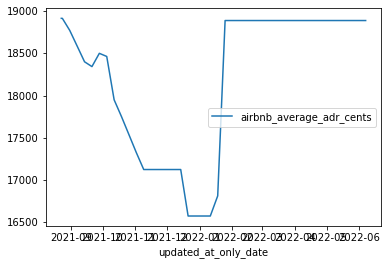

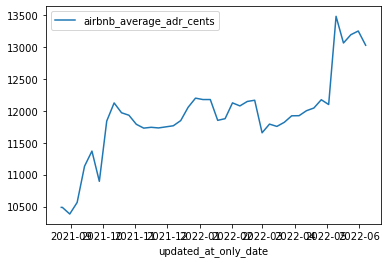

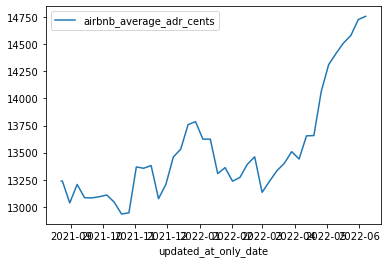

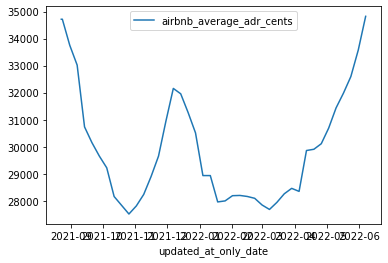

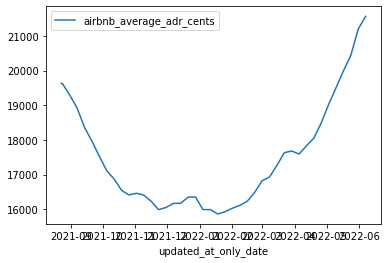

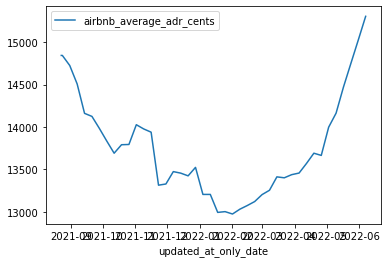

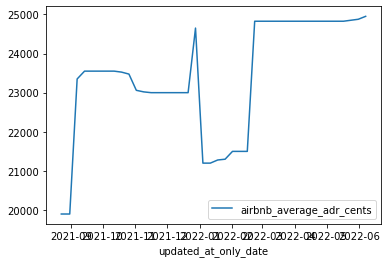

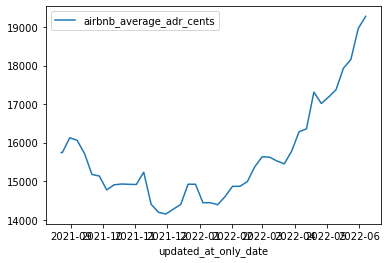

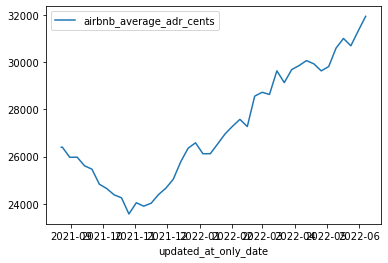

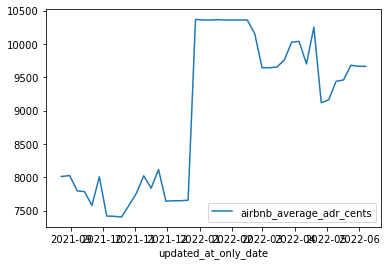

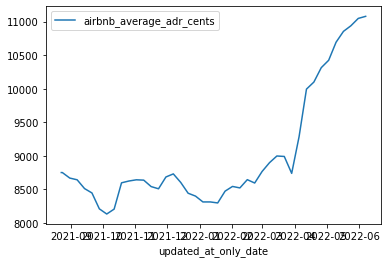

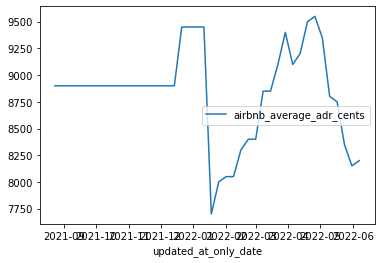

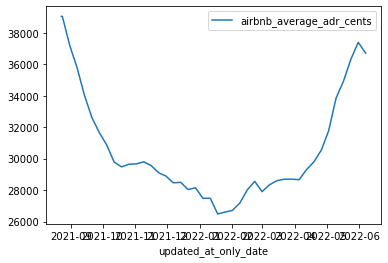

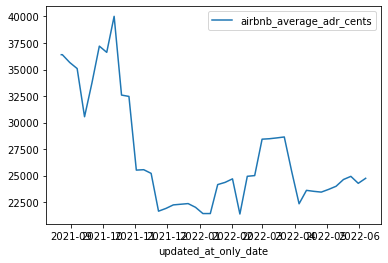

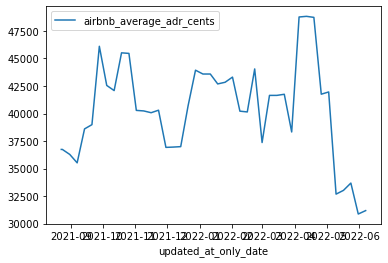

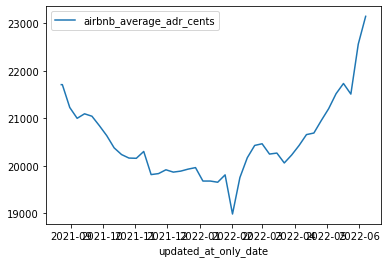

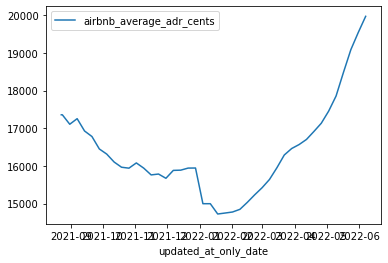

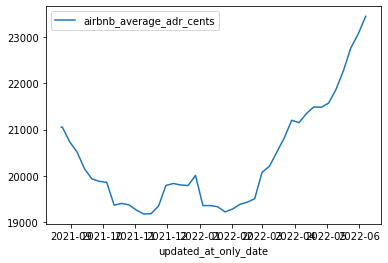

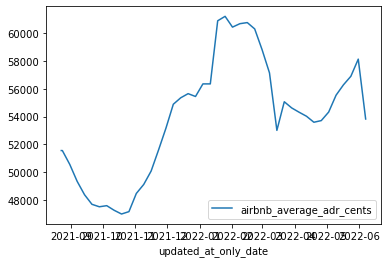

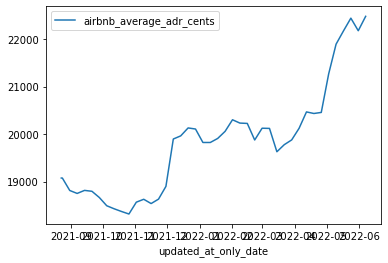

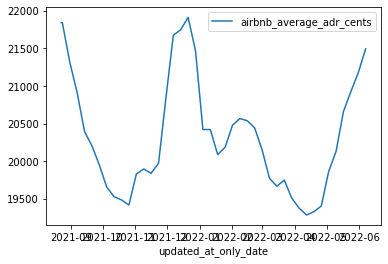

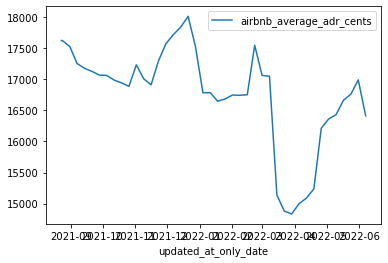

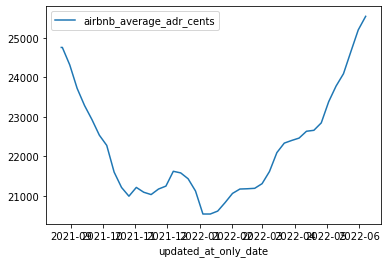

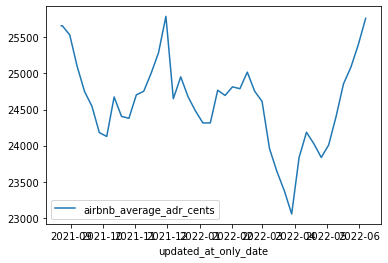

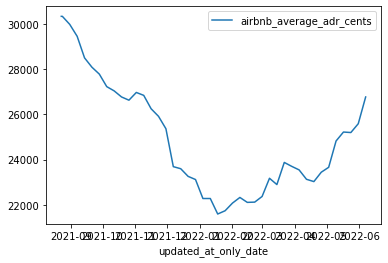

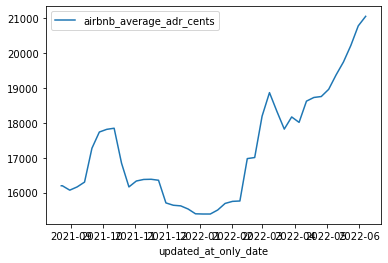

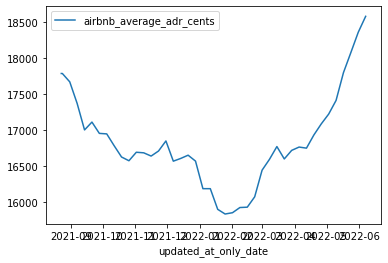

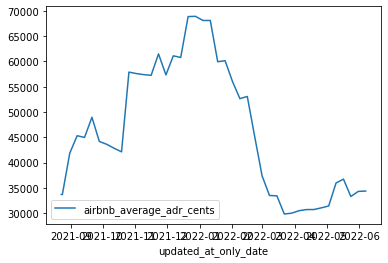

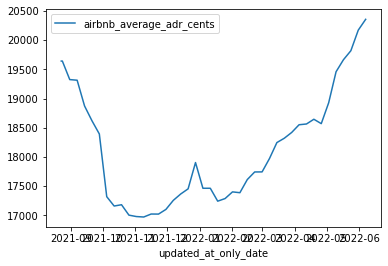

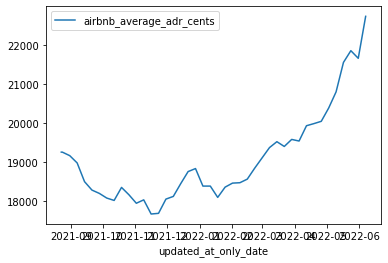

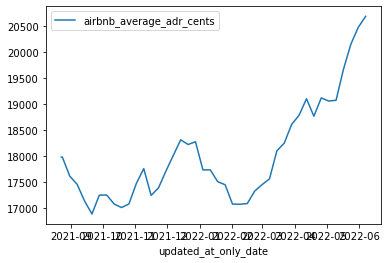

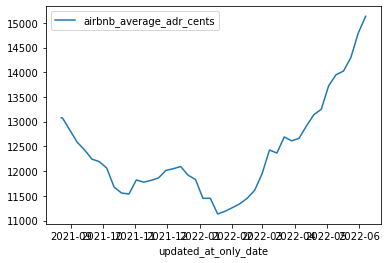

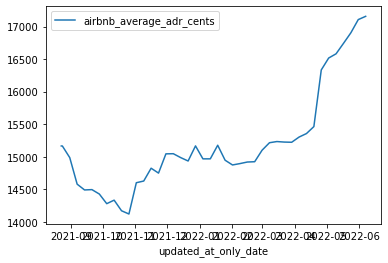

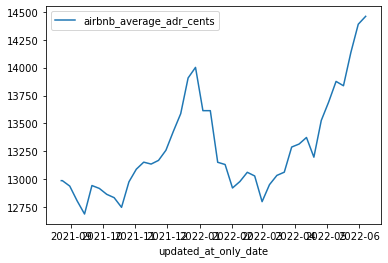

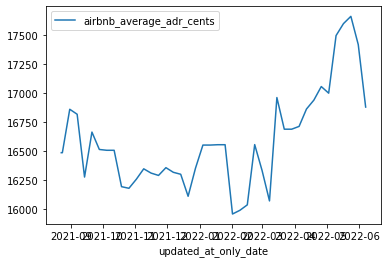

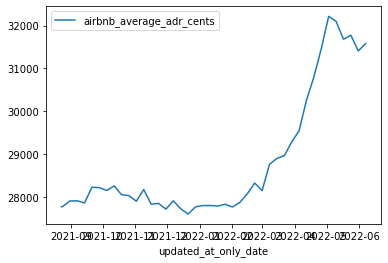

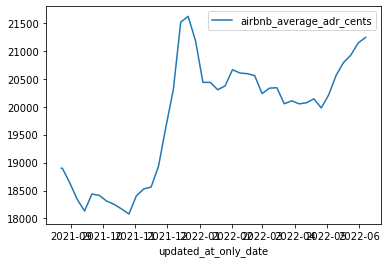

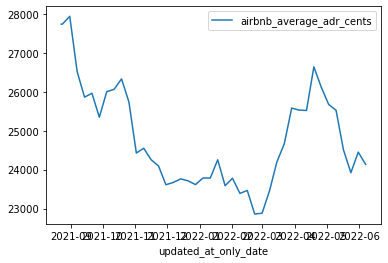

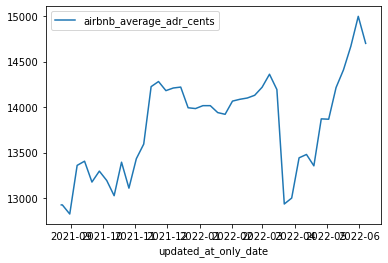

In [17]:
tempdf_pd.groupby('name')[['airbnb_average_adr_cents']].plot()


<AxesSubplot:xlabel='updated_at_only_date'>

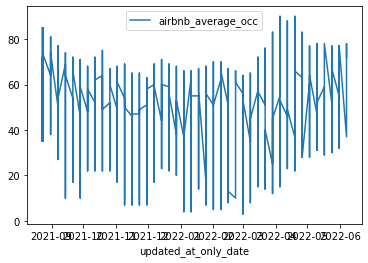

In [18]:
tempdf_pd[['airbnb_average_occ']].plot()

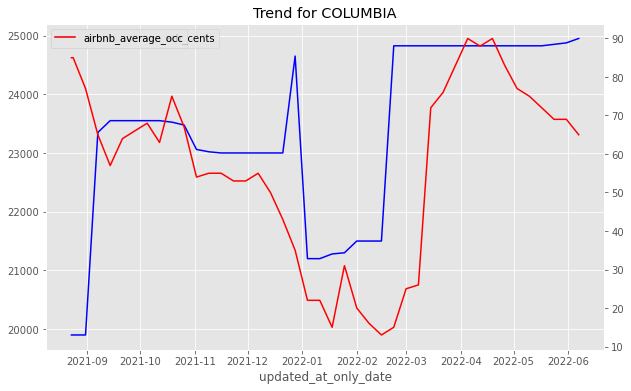

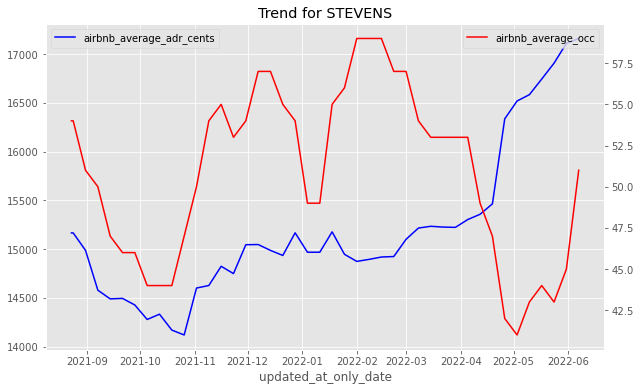

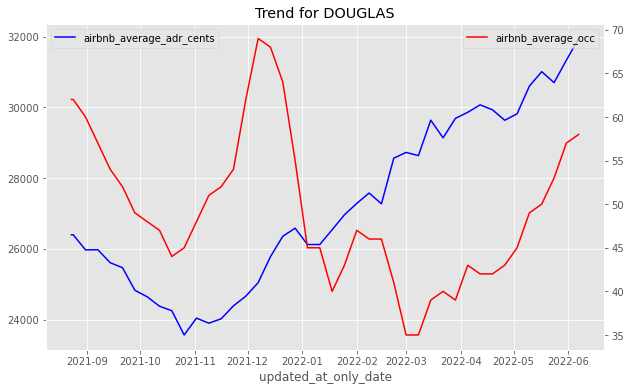

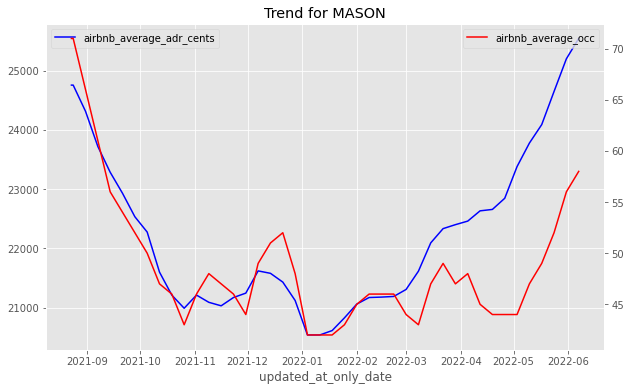

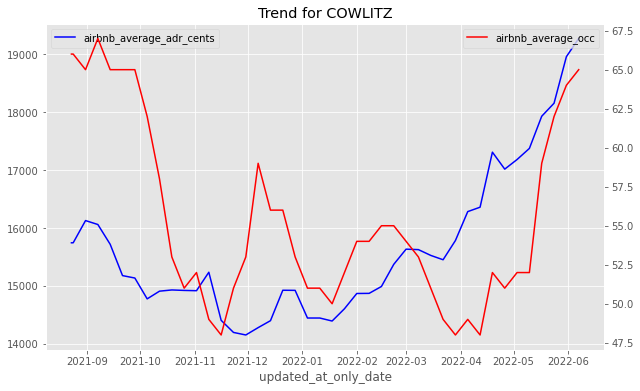

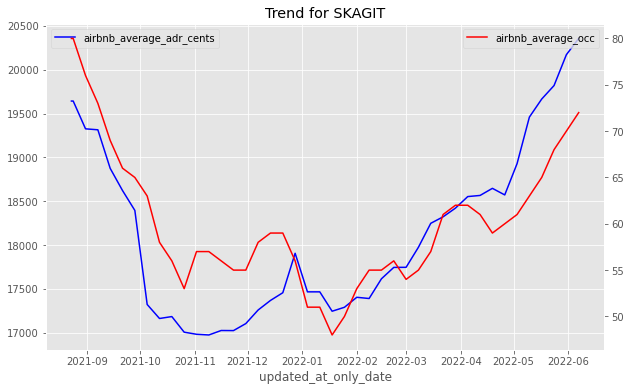

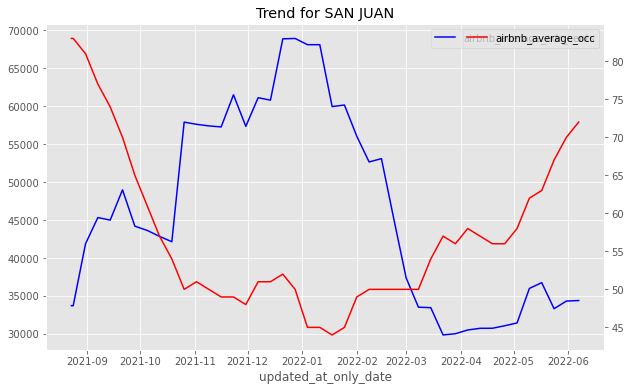

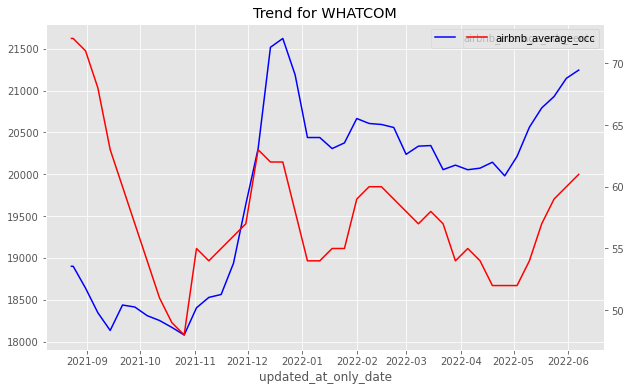

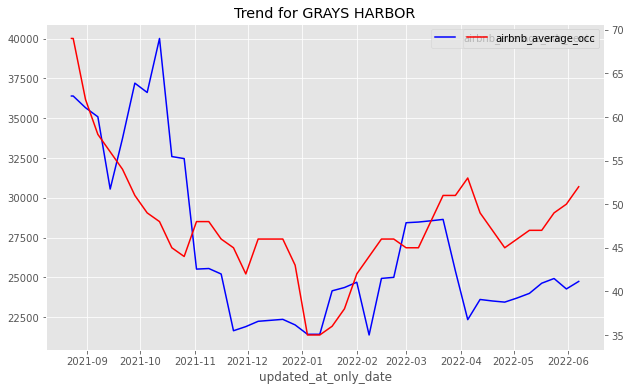

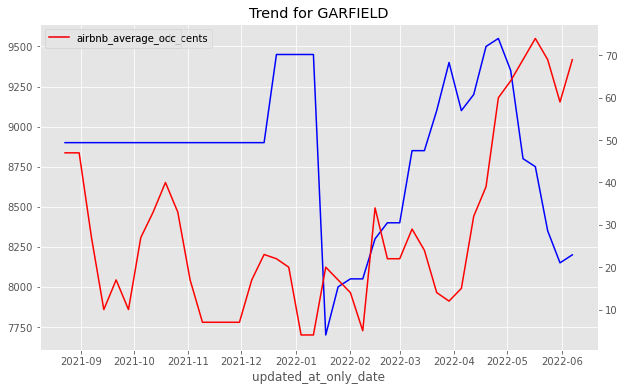

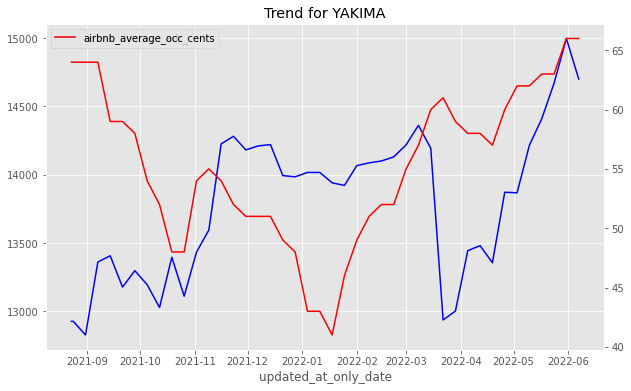

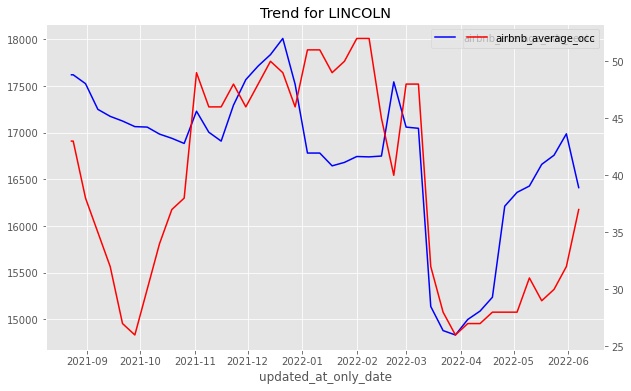

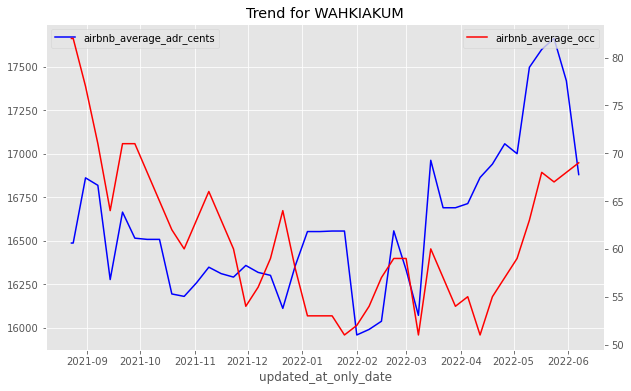

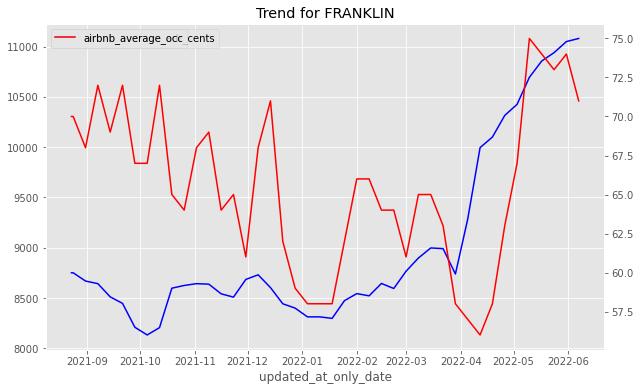

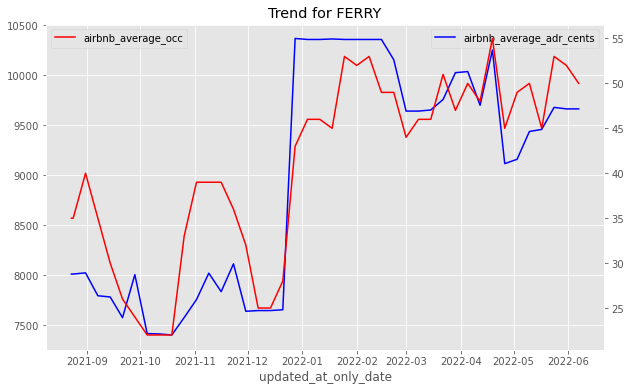

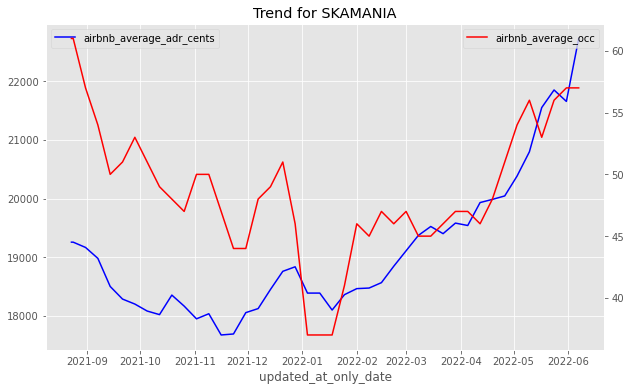

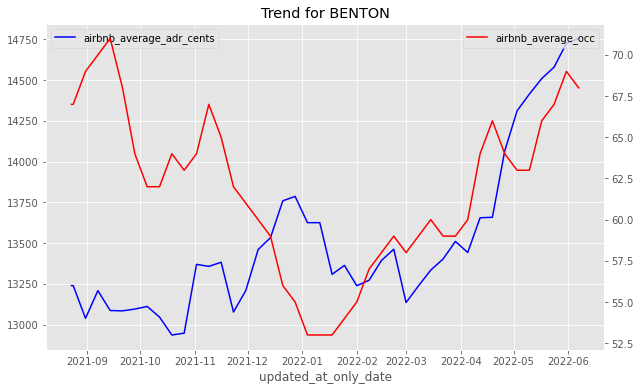

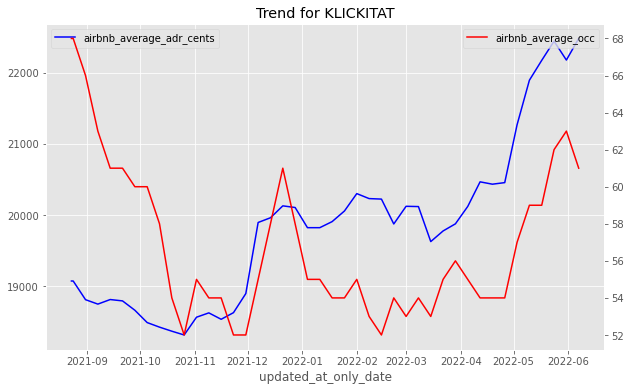

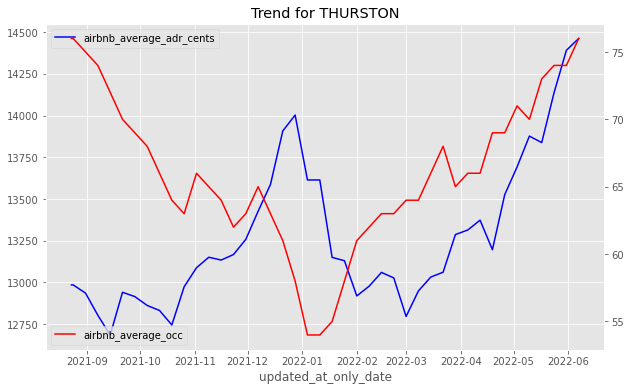

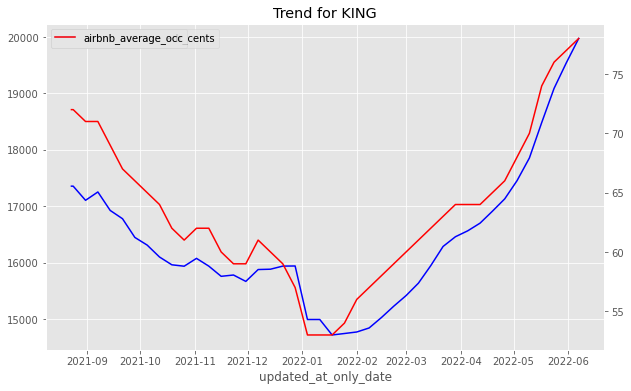

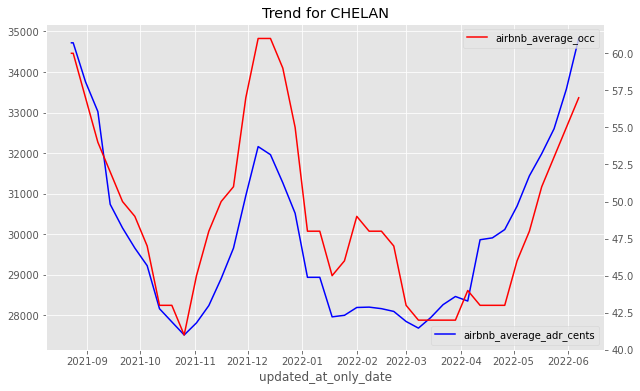

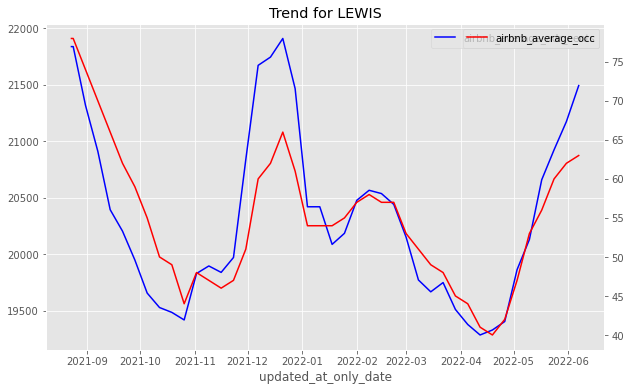

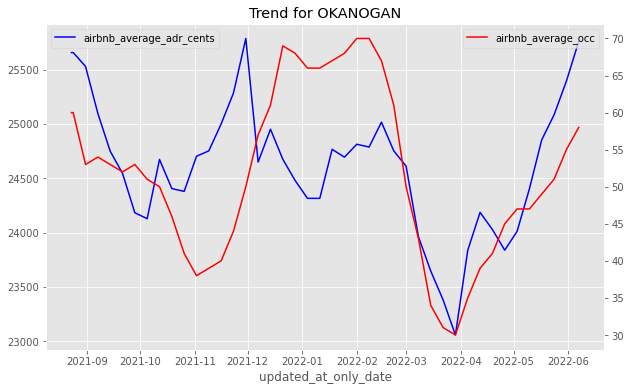

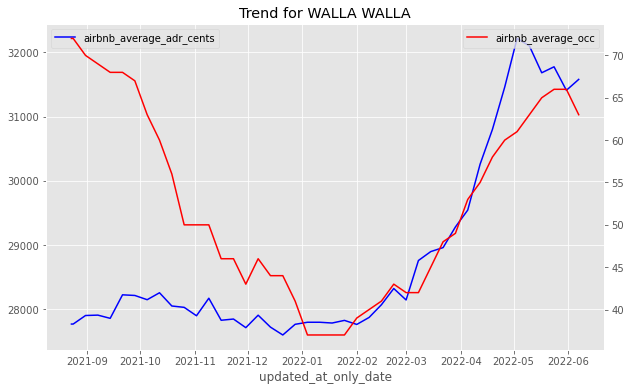

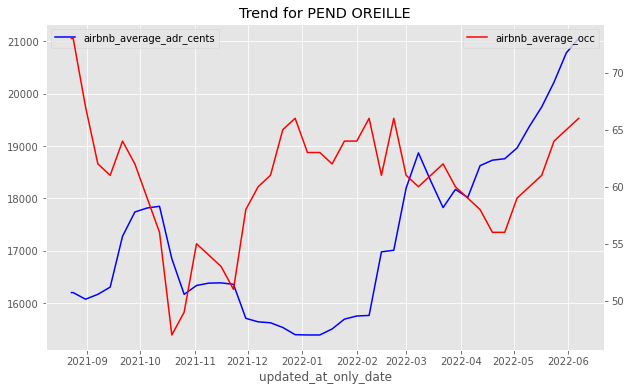

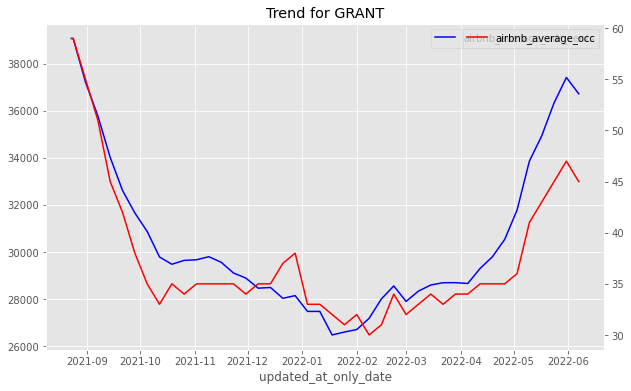

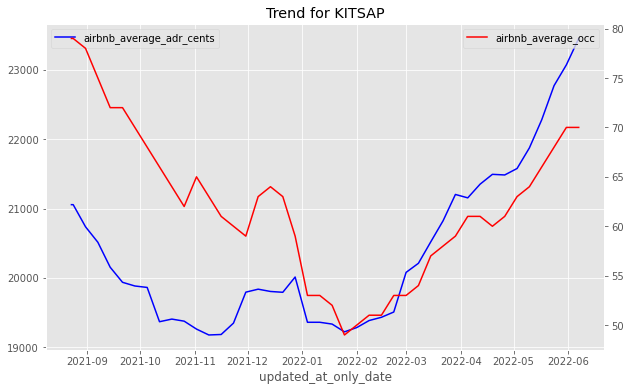

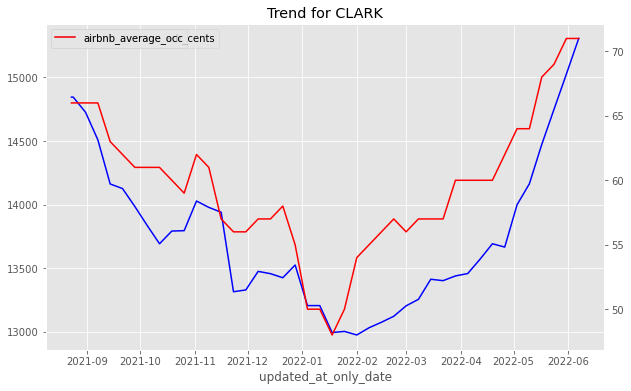

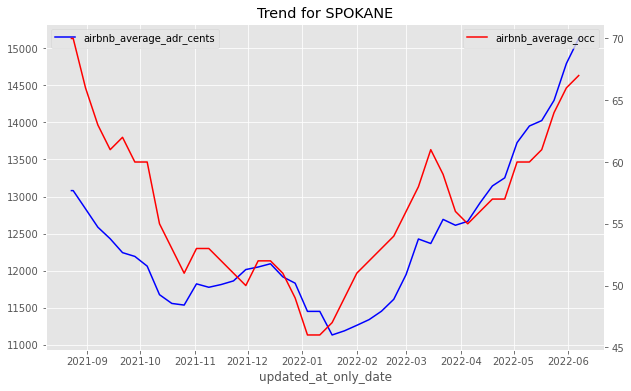

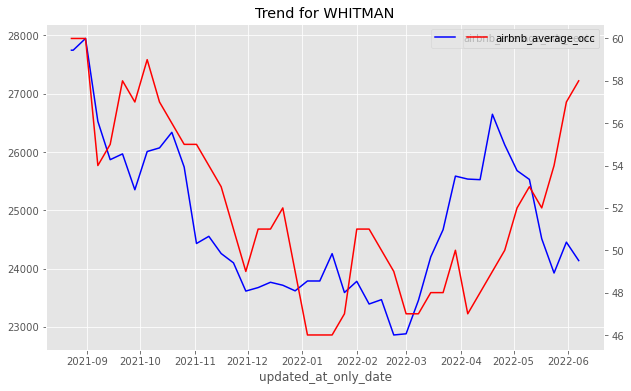

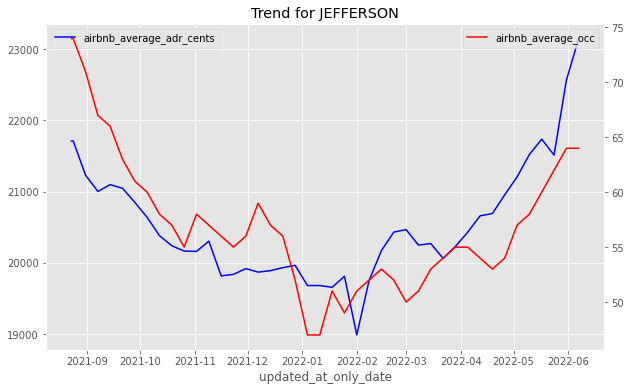

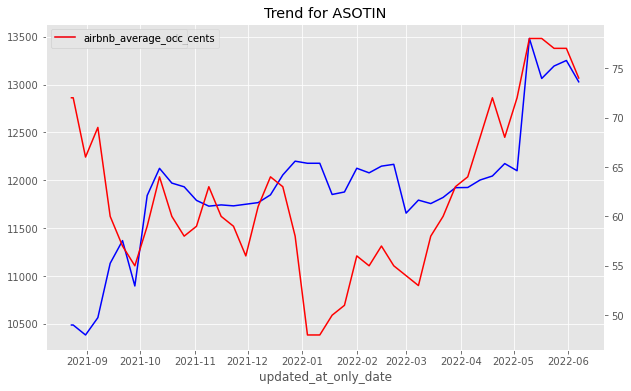

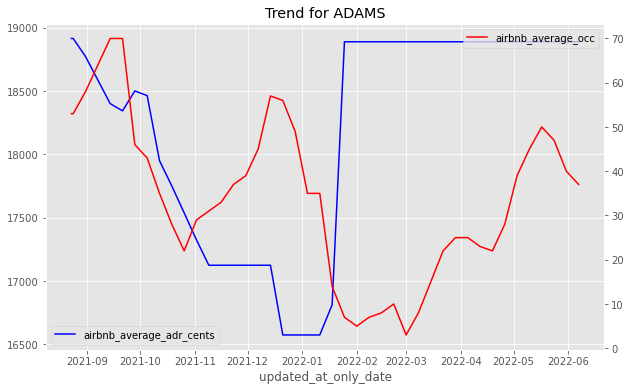

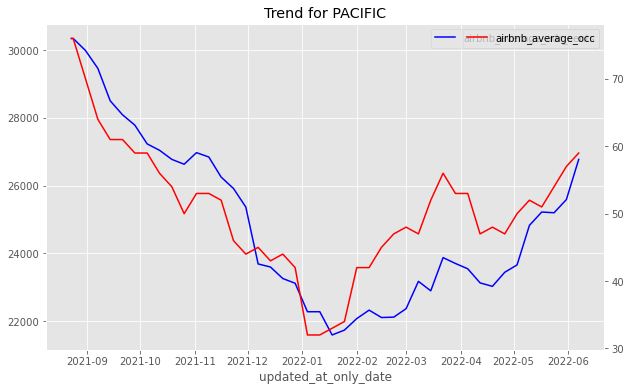

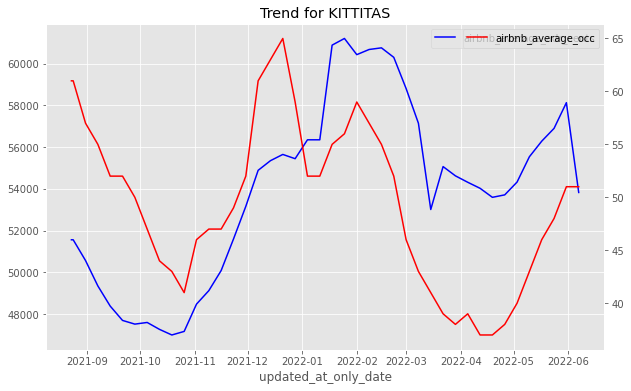

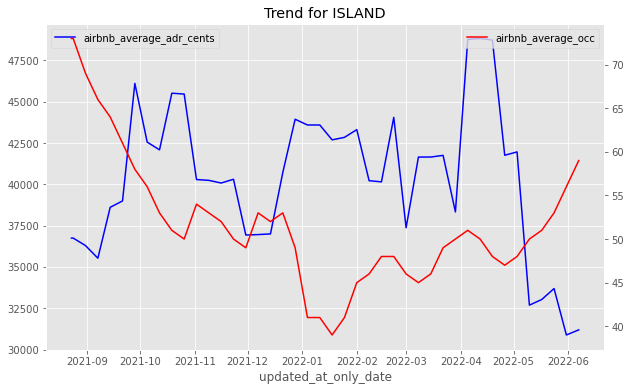

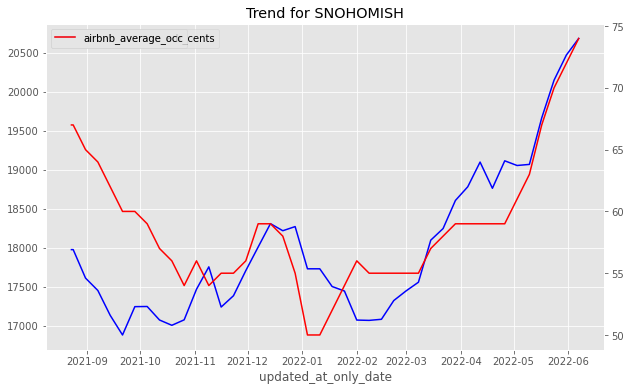

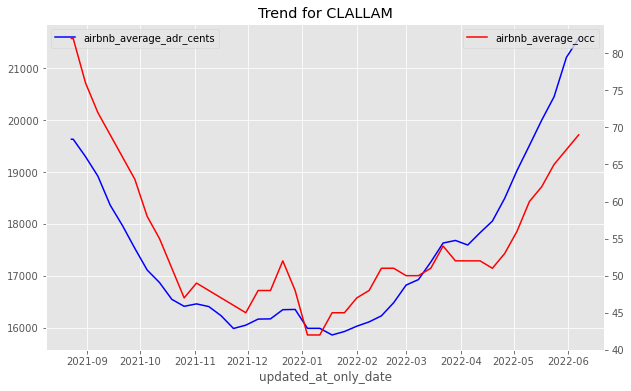

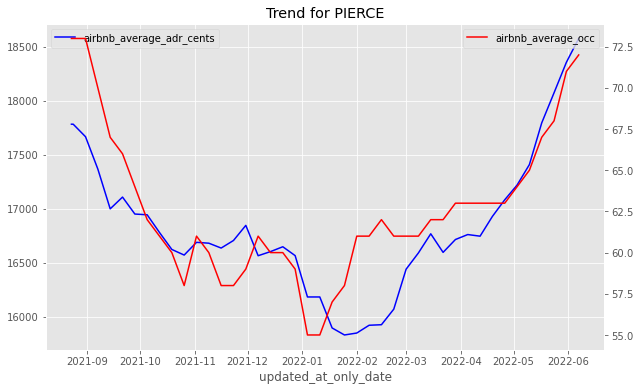

In [21]:
# fig, ax = plt.subplots()
# ax3 = ax.twinx()
# rspine = ax3.spines['right']
# rspine.set_position(('axes', 1.15))
# ax3.set_frame_on(True)
# ax3.patch.set_visible(False)
for county in tempdf_pd["name"].unique():
    fig, ax = plt.subplots()
    tempdf_pd.loc[tempdf_pd['name'] == county][['airbnb_average_adr_cents']].plot(ax=ax, style='b-', subplots=True)
    tempdf_pd.loc[tempdf_pd['name'] == county][['airbnb_average_occ']].plot(ax=ax, style='r-', secondary_y=True, subplots=True)
    plt.title("Trend for " + county)




In [51]:
#the above graphs provide the trends for each county occ and adr based on the updated values extracted from the historical log data(2021 September to Jun2 2022), as we can see mostly of the counties have
# a similar pattern of reducing from 2021 September to Decemeber random over the perios from January to March and constand increase from March to June and the 
# adr and occ are foloow the same trend across most of the counties except a few like SAN JUAN, YAKIMA


# These trends are import in analyzing the time series analysis to project how the occ and adr of a county changes over a time we need to this get a projection of the 
#   date on which we are tryint to get the rev calculated



Text(0.5, 1.0, 'Train/Test split for BTC Data')

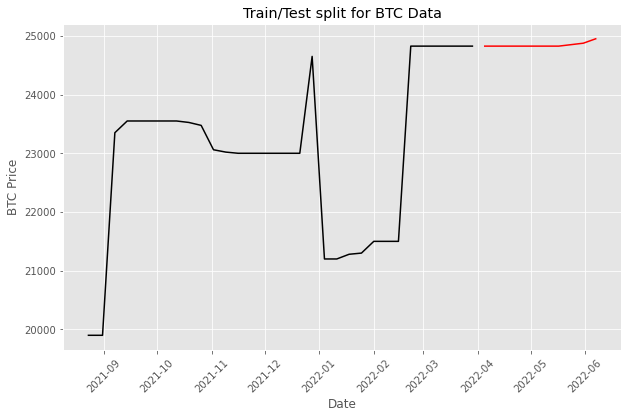

In [24]:
# Building seperate models of occ and adr as the scale for both of them is differnt and also I will be building seperate models for each county as each has its own 
# specific value 

# for columbia:
tempdf_pd_columbia = tempdf_pd[tempdf_pd["name"] == "COLUMBIA"]
train = tempdf_pd_columbia[tempdf_pd_columbia.index < pd.to_datetime("2022-04-01", format='%Y-%m-%d')]
test = tempdf_pd_columbia[tempdf_pd_columbia.index >= pd.to_datetime("2022-04-01", format='%Y-%m-%d')]

# train[['airbnb_average_adr_cents']].plot(color = "black")
# test[['airbnb_average_adr_cents']].plot(color = "red")
# plt.title("Trend for " + "county")
# # plt.ylabel('Adr Cents')
# # plt.xlabel('Date')
# # plt.title("Train/Test split for BTC Data")
# plt.show()


plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
# plt.show()



43

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
y = train['airbnb_average_adr_cents']
ARMAmodel = SARIMAX(y, order = (2, 2, 2))
ARMAmodel = ARMAmodel.fit()

# 2, 2, 2


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.53454D+00    |proj g|=  1.23049D+00

At iterate    5    f=  8.09245D+00    |proj g|=  2.01968D-01

At iterate   10    f=  8.08280D+00    |proj g|=  1.56120D-02

At iterate   15    f=  8.08271D+00    |proj g|=  2.66285D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     18      1     0     0   2.663D-04   8.083D+00
  F =   8.0827072205950401     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


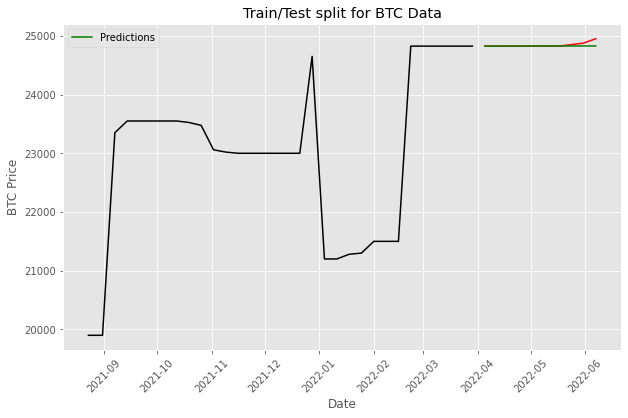

In [43]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.legend()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.53454D+00    |proj g|=  1.23049D+00

At iterate    5    f=  8.09245D+00    |proj g|=  2.01968D-01

At iterate   10    f=  8.08280D+00    |proj g|=  1.56120D-02

At iterate   15    f=  8.08271D+00    |proj g|=  2.66285D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     18      1     0     0   2.663D-04   8.083D+00
  F =   8.0827072205950401     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
The root

 This problem is unconstrained.


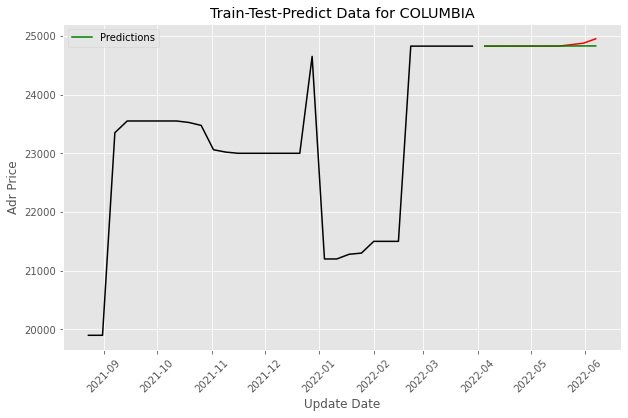

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39509D+00    |proj g|=  3.93018D-01

At iterate    5    f=  6.29965D+00    |proj g|=  9.11119D-02

At iterate   10    f=  6.27255D+00    |proj g|=  1.75003D-03

At iterate   15    f=  6.27198D+00    |proj g|=  4.11873D-03

At iterate   20    f=  6.26556D+00    |proj g|=  2.96165D-02

At iterate   25    f=  6.25770D+00    |proj g|=  5.81008D-03

At iterate   30    f=  6.25579D+00    |proj g|=  1.14040D-02

At iterate   35    f=  6.25396D+00    |proj g|=  2.39441D-03

At iterate   40    f=  6.25387D+00    |proj g|=  2.89356D-03

At iterate   45    f=  6.25248D+00    |proj g|=  2.90404D-03

At iterate   50    f=  6.25217D+00    |proj g|=  1.00330D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

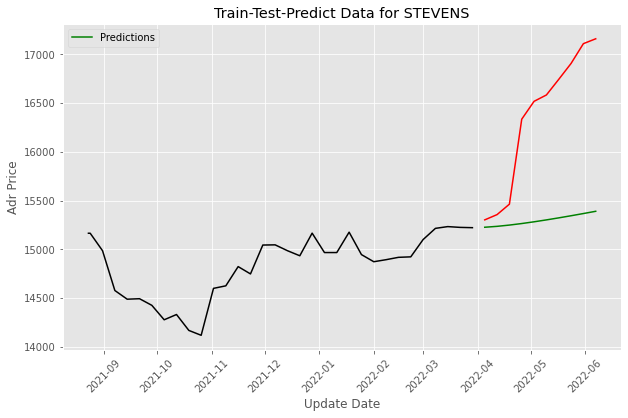

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.72929D+00    |proj g|=  2.42255D+00

At iterate    5    f=  7.41293D+00    |proj g|=  7.23163D-02

At iterate   10    f=  7.37132D+00    |proj g|=  2.79549D-02

At iterate   15    f=  7.34618D+00    |proj g|=  3.59906D-02

At iterate   20    f=  7.34095D+00    |proj g|=  4.93601D-02

At iterate   25    f=  7.33545D+00    |proj g|=  3.52136D-02

At iterate   30    f=  7.33372D+00    |proj g|=  5.79763D-03

At iterate   35    f=  7.30528D+00    |proj g|=  1.21810D-01

At iterate   40    f=  7.30255D+00    |proj g|=  1.12724D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


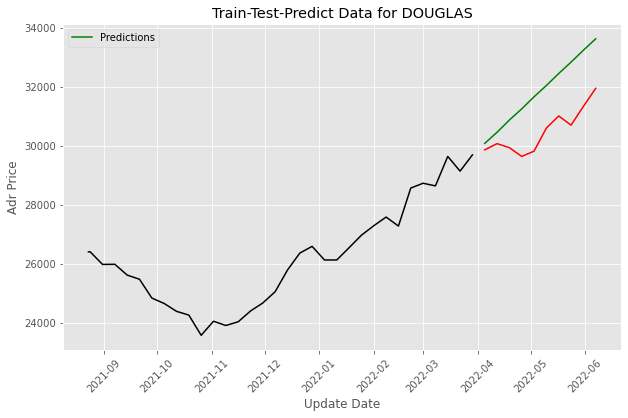

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.60993D+00    |proj g|=  6.55146D-01

At iterate    5    f=  6.48286D+00    |proj g|=  1.40729D-01

At iterate   10    f=  6.46011D+00    |proj g|=  6.06441D-02

At iterate   15    f=  6.41619D+00    |proj g|=  3.68044D-02

At iterate   20    f=  6.41068D+00    |proj g|=  1.16293D-01

At iterate   25    f=  6.39776D+00    |proj g|=  1.66465D-01

At iterate   30    f=  6.39533D+00    |proj g|=  9.40994D-03

At iterate   35    f=  6.39531D+00    |proj g|=  1.08250D-03

At iterate   40    f=  6.39525D+00    |proj g|=  4.53203D-03

At iterate   45    f=  6.39011D+00    |proj g|=  4.15990D-02

At iterate   50    f=  6.38820D+00    |proj g|=  1.22196D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


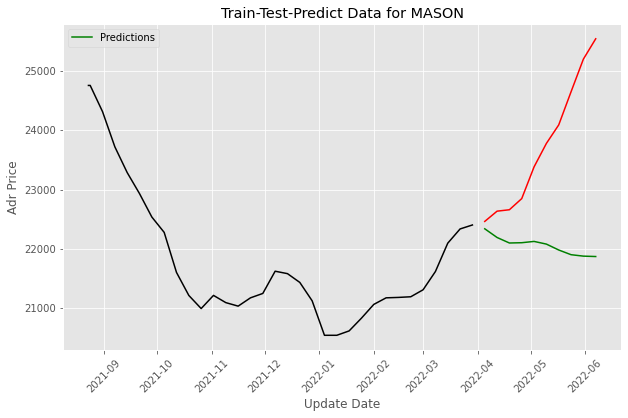

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98196D+00    |proj g|=  7.63238D-01

At iterate    5    f=  6.81804D+00    |proj g|=  1.98272D-01

At iterate   10    f=  6.75214D+00    |proj g|=  2.75178D-02

At iterate   15    f=  6.74364D+00    |proj g|=  1.67062D-03

At iterate   20    f=  6.74362D+00    |proj g|=  7.28372D-04

At iterate   25    f=  6.74356D+00    |proj g|=  1.99181D-03

At iterate   30    f=  6.74310D+00    |proj g|=  7.48225D-03

At iterate   35    f=  6.74277D+00    |proj g|=  1.87183D-03

At iterate   40    f=  6.74271D+00    |proj g|=  6.50181D-04

At iterate   45    f=  6.74270D+00    |proj g|=  1.64119D-04

At iterate   50    f=  6.74270D+00    |proj g|=  9.00865D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

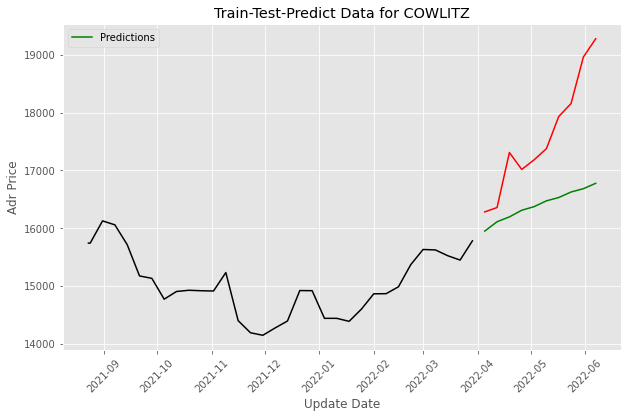

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.84130D+00    |proj g|=  3.22041D-01

At iterate    5    f=  6.76369D+00    |proj g|=  3.25426D-02

At iterate   10    f=  6.76122D+00    |proj g|=  5.82769D-03

At iterate   15    f=  6.76050D+00    |proj g|=  2.78281D-02

At iterate   20    f=  6.73971D+00    |proj g|=  1.14003D-01

At iterate   25    f=  6.71249D+00    |proj g|=  1.99362D-02

At iterate   30    f=  6.70527D+00    |proj g|=  1.62458D-01

At iterate   35    f=  6.68505D+00    |proj g|=  7.85817D-02

At iterate   40    f=  6.66897D+00    |proj g|=  7.10901D-02

At iterate   45    f=  6.66660D+00    |proj g|=  7.03461D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


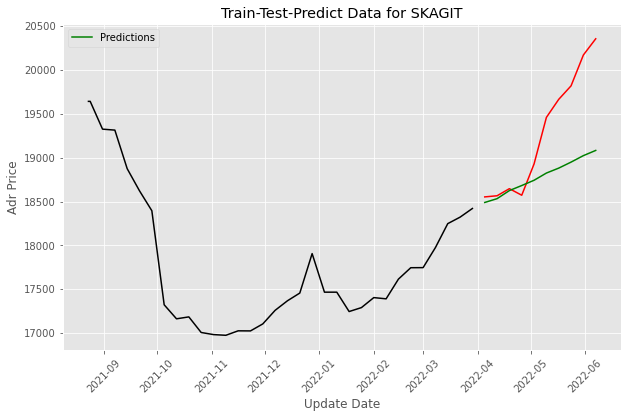

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.42403D+00    |proj g|=  2.60588D-01

At iterate    5    f=  9.36668D+00    |proj g|=  3.98449D-02

At iterate   10    f=  9.36512D+00    |proj g|=  2.83931D-02

At iterate   15    f=  9.35752D+00    |proj g|=  3.92146D-03

At iterate   20    f=  9.35735D+00    |proj g|=  2.96190D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   2.962D-06   9.357D+00
  F =   9.3573452148397731     

CONVERG

 This problem is unconstrained.


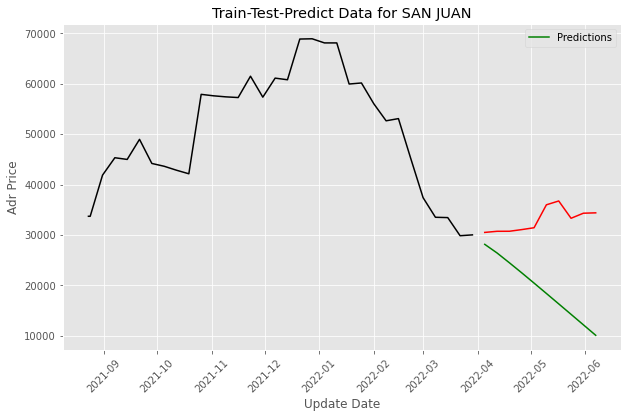

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.87222D+00    |proj g|=  1.11315D-01

At iterate    5    f=  6.83274D+00    |proj g|=  6.76915D-02

At iterate   10    f=  6.82953D+00    |proj g|=  6.61801D-03

At iterate   15    f=  6.81843D+00    |proj g|=  3.98471D-02

At iterate   20    f=  6.81325D+00    |proj g|=  2.00634D-03

At iterate   25    f=  6.81309D+00    |proj g|=  1.13598D-02

At iterate   30    f=  6.80600D+00    |proj g|=  3.79033D-02

At iterate   35    f=  6.80486D+00    |proj g|=  1.35549D-03

At iterate   40    f=  6.80086D+00    |proj g|=  2.48871D-02

At iterate   45    f=  6.78959D+00    |proj g|=  5.37687D-03

At iterate   50    f=  6.78784D+00    |proj g|=  1.47275D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

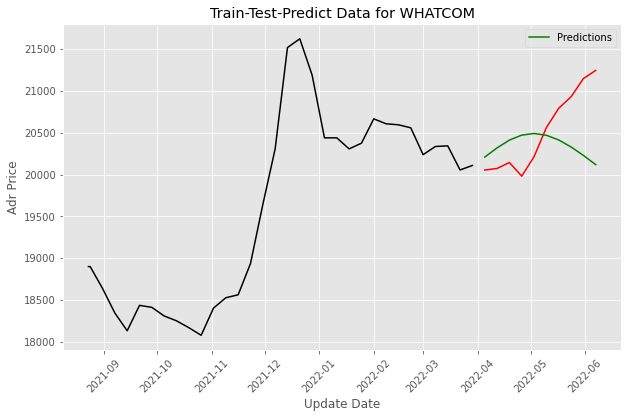

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07190D+01    |proj g|=  1.98240D+00

At iterate    5    f=  9.35259D+00    |proj g|=  1.20530D-01

At iterate   10    f=  9.25793D+00    |proj g|=  1.83645D-01

At iterate   15    f=  9.21887D+00    |proj g|=  1.55738D-02

At iterate   20    f=  9.20951D+00    |proj g|=  8.00978D-03

At iterate   25    f=  9.20550D+00    |proj g|=  3.25367D-03

At iterate   30    f=  9.20282D+00    |proj g|=  4.82434D-03

At iterate   35    f=  9.19716D+00    |proj g|=  4.75497D-03
  ys=-1.848E+01  -gs= 4.452E-01 BFGS update SKIPPED

At iterate   40    f=  9.10231D+00    |proj g|=  4.06705D-02

At iterate   45    f=  9.02808D+00    |proj g|=  1.84898D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

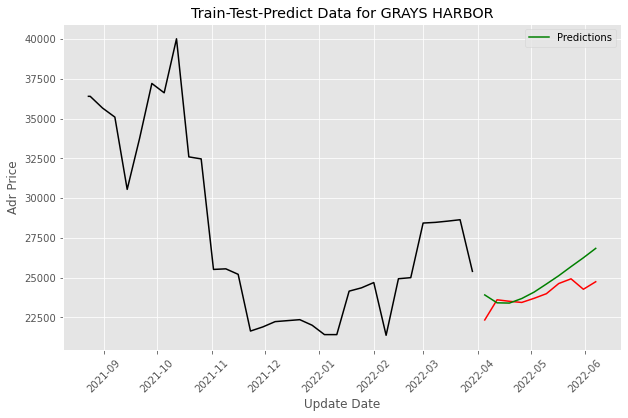

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07019D+00    |proj g|=  2.28927D-01

At iterate    5    f=  7.02595D+00    |proj g|=  3.77301D-02

At iterate   10    f=  7.02322D+00    |proj g|=  1.21892D-03

At iterate   15    f=  7.02298D+00    |proj g|=  1.95333D-03

At iterate   20    f=  7.01804D+00    |proj g|=  5.07837D-03

At iterate   25    f=  6.98788D+00    |proj g|=  9.46958D-02

At iterate   30    f=  6.97786D+00    |proj g|=  2.07043D-03
  ys=-1.068E-03  -gs= 1.490E-03 BFGS update SKIPPED

At iterate   35    f=  6.96953D+00    |proj g|=  1.16877D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

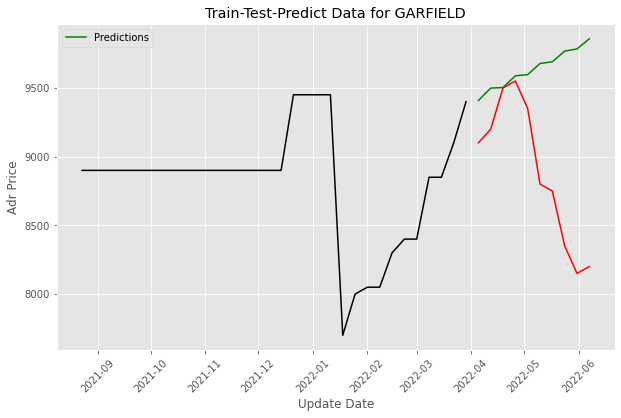

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.90372D+00    |proj g|=  3.24293D-01

At iterate    5    f=  6.84861D+00    |proj g|=  1.98335D-02

At iterate   10    f=  6.83394D+00    |proj g|=  1.69390D-02

At iterate   15    f=  6.83247D+00    |proj g|=  1.79032D-02

At iterate   20    f=  6.83182D+00    |proj g|=  6.16119D-04

At iterate   25    f=  6.83181D+00    |proj g|=  2.15104D-03

At iterate   30    f=  6.83070D+00    |proj g|=  2.84131D-02

At iterate   35    f=  6.82603D+00    |proj g|=  1.10464D-02

At iterate   40    f=  6.82582D+00    |proj g|=  1.09133D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

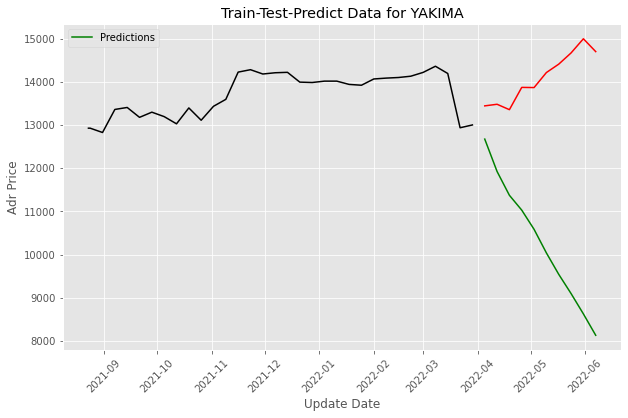

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05830D+00    |proj g|=  1.61105D+00

At iterate    5    f=  7.25774D+00    |proj g|=  4.70452D-02

At iterate   10    f=  7.24364D+00    |proj g|=  1.20358D-02

At iterate   15    f=  7.24341D+00    |proj g|=  6.25519D-03

At iterate   20    f=  7.24337D+00    |proj g|=  1.34985D-04

At iterate   25    f=  7.24336D+00    |proj g|=  2.41165D-03

At iterate   30    f=  7.24264D+00    |proj g|=  2.94176D-02

At iterate   35    f=  7.24139D+00    |proj g|=  1.69108D-03

At iterate   40    f=  7.24133D+00    |proj g|=  1.52927D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

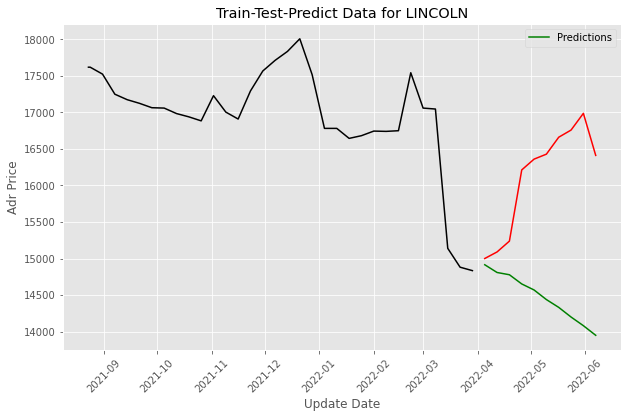

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99879D+00    |proj g|=  7.33918D-01

At iterate    5    f=  6.84195D+00    |proj g|=  1.43323D-02

At iterate   10    f=  6.82855D+00    |proj g|=  8.87765D-03

At iterate   15    f=  6.82839D+00    |proj g|=  6.20760D-03

At iterate   20    f=  6.82811D+00    |proj g|=  1.46003D-03

At iterate   25    f=  6.82807D+00    |proj g|=  4.04830D-04

At iterate   30    f=  6.82805D+00    |proj g|=  1.10410D-03

At iterate   35    f=  6.82669D+00    |proj g|=  2.75874D-02

At iterate   40    f=  6.82611D+00    |proj g|=  1.60664D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


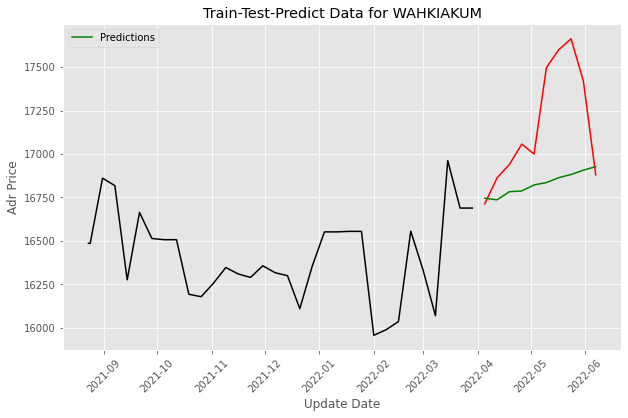

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42835D+00    |proj g|=  8.19285D-01

At iterate    5    f=  5.92834D+00    |proj g|=  3.23052D-02

At iterate   10    f=  5.91785D+00    |proj g|=  1.63369D-02

At iterate   15    f=  5.91413D+00    |proj g|=  9.34736D-03

At iterate   20    f=  5.91175D+00    |proj g|=  1.75505D-03

At iterate   25    f=  5.91150D+00    |proj g|=  1.25648D-02

At iterate   30    f=  5.91131D+00    |proj g|=  1.32718D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

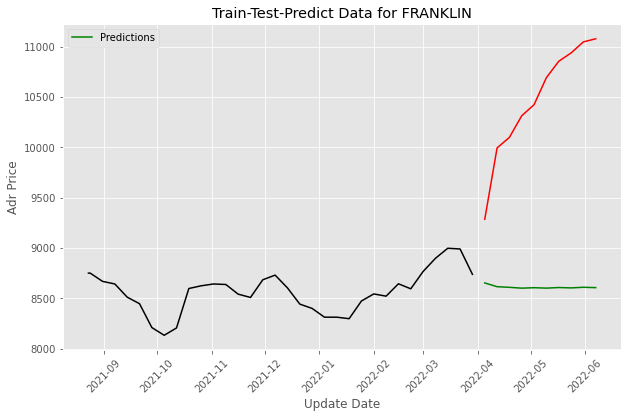

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41255D+00    |proj g|=  1.19115D-01

At iterate    5    f=  7.38322D+00    |proj g|=  5.58128D-03

At iterate   10    f=  7.38304D+00    |proj g|=  9.60754D-04

At iterate   15    f=  7.38277D+00    |proj g|=  6.82004D-03

At iterate   20    f=  7.38229D+00    |proj g|=  1.03005D-02

At iterate   25    f=  7.38186D+00    |proj g|=  3.73087D-04

At iterate   30    f=  7.38147D+00    |proj g|=  7.37949D-03

At iterate   35    f=  7.35527D+00    |proj g|=  2.14267D-02

At iterate   40    f=  7.34427D+00    |proj g|=  6.80935D-03

At iterate   45    f=  7.34281D+00    |proj g|=  1.61291D-03

At iterate   50    f=  7.34262D+00    |proj g|=  3.50245D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


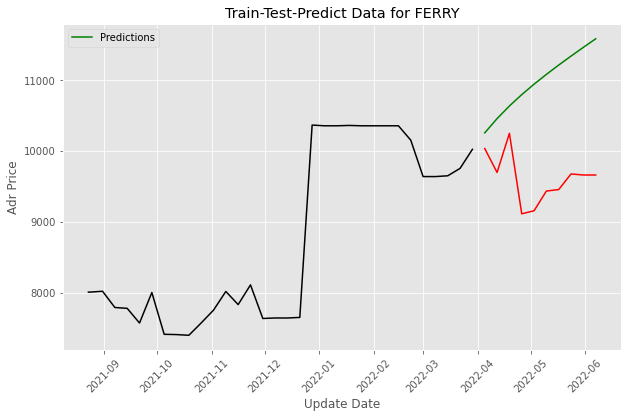

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72802D+00    |proj g|=  7.59671D-01

At iterate    5    f=  6.59260D+00    |proj g|=  1.81699D-02

At iterate   10    f=  6.58094D+00    |proj g|=  5.15108D-02

At iterate   15    f=  6.55480D+00    |proj g|=  2.54576D-01

At iterate   20    f=  6.45120D+00    |proj g|=  2.17987D-02

At iterate   25    f=  6.45042D+00    |proj g|=  2.65983D-02

At iterate   30    f=  6.44812D+00    |proj g|=  6.66512D-02

At iterate   35    f=  6.44798D+00    |proj g|=  9.74577D-03

At iterate   40    f=  6.44796D+00    |proj g|=  1.09108D-03

At iterate   45    f=  6.44779D+00    |proj g|=  1.69158D-02

At iterate   50    f=  6.44365D+00    |proj g|=  1.09108D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


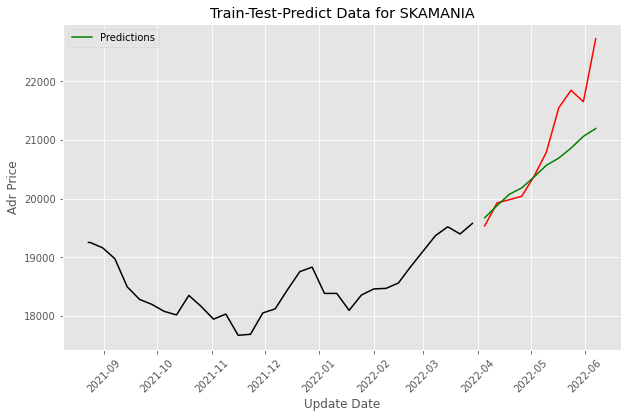

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57167D+00    |proj g|=  5.48218D-01

At iterate    5    f=  6.25091D+00    |proj g|=  1.34020D-02

At iterate   10    f=  6.24941D+00    |proj g|=  1.92471D-03

At iterate   15    f=  6.23039D+00    |proj g|=  8.53080D-02

At iterate   20    f=  6.21885D+00    |proj g|=  2.86635D-03

At iterate   25    f=  6.20312D+00    |proj g|=  3.92188D-03
  ys=-1.084E-02  -gs= 4.238E-03 BFGS update SKIPPED

At iterate   30    f=  6.19687D+00    |proj g|=  6.53318D-04

At iterate   35    f=  6.19686D+00    |proj g|=  7.71515D-04

At iterate   40    f=  6.19655D+00    |proj g|=  1.01385D-02

At iterate   45    f=  6.19639D+00    |proj g|=  3.59121D-03

At iterate   50    f=  6.19629D+00    |proj g|=  9.33401D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.


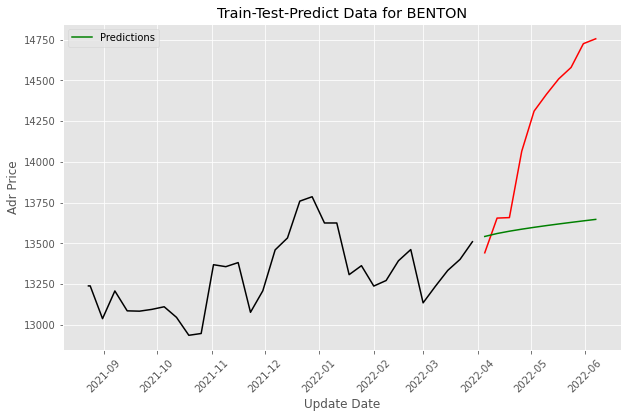

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.78223D+00    |proj g|=  3.67748D-01

At iterate    5    f=  6.69666D+00    |proj g|=  7.98381D-02

At iterate   10    f=  6.68093D+00    |proj g|=  2.31711D-02

At iterate   15    f=  6.68037D+00    |proj g|=  8.45902D-04

At iterate   20    f=  6.67989D+00    |proj g|=  8.42426D-03

At iterate   25    f=  6.67346D+00    |proj g|=  4.04381D-02

At iterate   30    f=  6.65986D+00    |proj g|=  1.17202D-02

At iterate   35    f=  6.65890D+00    |proj g|=  2.19282D-03

At iterate   40    f=  6.65876D+00    |proj g|=  1.41356D-03

At iterate   45    f=  6.65874D+00    |proj g|=  5.29302D-04

At iterate   50    f=  6.65873D+00    |proj g|=  1.04938D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


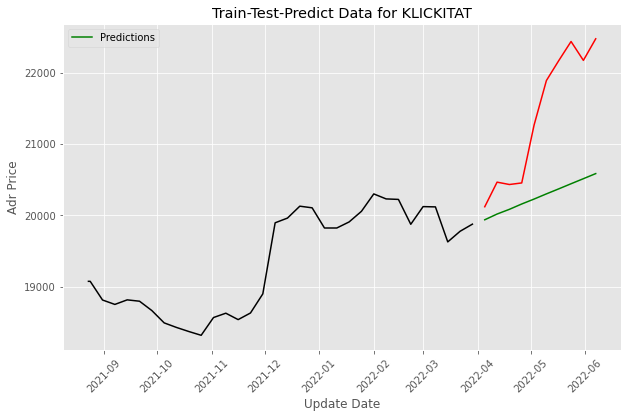

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.77094D+00    |proj g|=  1.02197D+00

At iterate    5    f=  6.25995D+00    |proj g|=  8.35609D-02

At iterate   10    f=  6.25080D+00    |proj g|=  6.12558D-03

At iterate   15    f=  6.24912D+00    |proj g|=  1.21349D-03

At iterate   20    f=  6.24328D+00    |proj g|=  1.28821D-01

At iterate   25    f=  6.23017D+00    |proj g|=  1.39138D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     33      1     0     0   

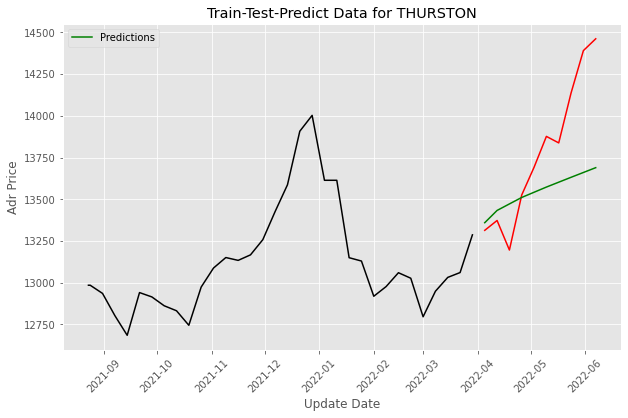

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.66955D+00    |proj g|=  3.93735D-01

At iterate    5    f=  6.59331D+00    |proj g|=  8.29837D-02

At iterate   10    f=  6.58436D+00    |proj g|=  7.79316D-02

At iterate   15    f=  6.57636D+00    |proj g|=  1.07358D-02

At iterate   20    f=  6.57630D+00    |proj g|=  1.18235D-03

At iterate   25    f=  6.57608D+00    |proj g|=  1.66932D-02

At iterate   30    f=  6.57200D+00    |proj g|=  2.18674D-02

At iterate   35    f=  6.57169D+00    |proj g|=  1.31288D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

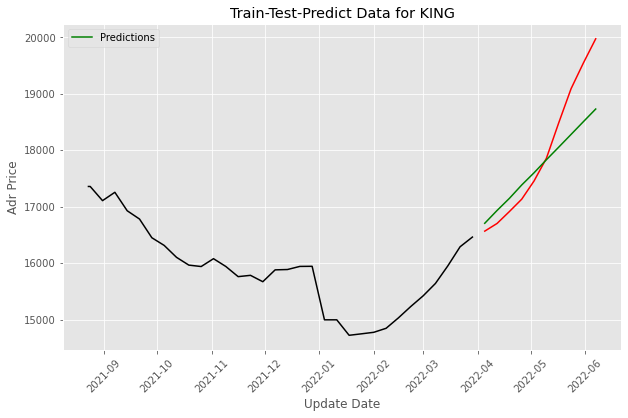

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56605D+00    |proj g|=  9.57910D-02

At iterate    5    f=  7.56297D+00    |proj g|=  2.38476D-01

At iterate   10    f=  7.51942D+00    |proj g|=  9.23224D-02

At iterate   15    f=  7.47782D+00    |proj g|=  2.15956D-01

At iterate   20    f=  7.41530D+00    |proj g|=  4.08211D-01

At iterate   25    f=  7.39388D+00    |proj g|=  1.05516D-01

At iterate   30    f=  7.39141D+00    |proj g|=  3.23426D-02

At iterate   35    f=  7.39093D+00    |proj g|=  2.09292D-02

At iterate   40    f=  7.39048D+00    |proj g|=  2.66218D-02

At iterate   45    f=  7.38952D+00    |proj g|=  7.39213D-03

At iterate   50    f=  7.38951D+00    |proj g|=  8.92770D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


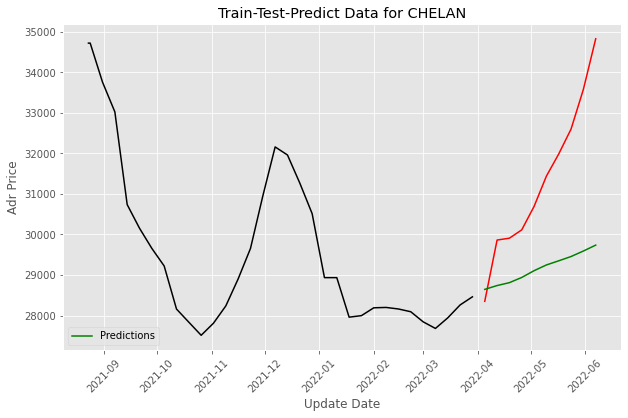

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.96944D+00    |proj g|=  4.45308D-01

At iterate    5    f=  6.86956D+00    |proj g|=  1.88705D-02

At iterate   10    f=  6.86750D+00    |proj g|=  3.70745D-03

At iterate   15    f=  6.86747D+00    |proj g|=  1.39073D-03

At iterate   20    f=  6.86647D+00    |proj g|=  1.44999D-02

At iterate   25    f=  6.85823D+00    |proj g|=  8.49803D-03

At iterate   30    f=  6.85771D+00    |proj g|=  7.18956D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

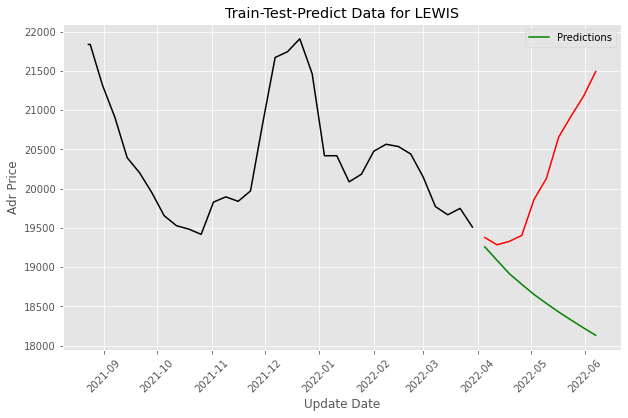

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.94432D+00    |proj g|=  2.51015D+00

At iterate    5    f=  7.16631D+00    |proj g|=  5.13775D-03

At iterate   10    f=  7.16534D+00    |proj g|=  3.74814D-02

At iterate   15    f=  7.16388D+00    |proj g|=  3.33014D-02

At iterate   20    f=  7.16039D+00    |proj g|=  2.30622D-02

At iterate   25    f=  7.15962D+00    |proj g|=  4.59834D-03

At iterate   30    f=  7.15958D+00    |proj g|=  5.78480D-03

At iterate   35    f=  7.15534D+00    |proj g|=  1.00439D-01

At iterate   40    f=  7.13758D+00    |proj g|=  1.94774D-02

At iterate   45    f=  7.13587D+00    |proj g|=  2.01029D-02

At iterate   50    f=  7.13505D+00    |proj g|=  3.01719D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


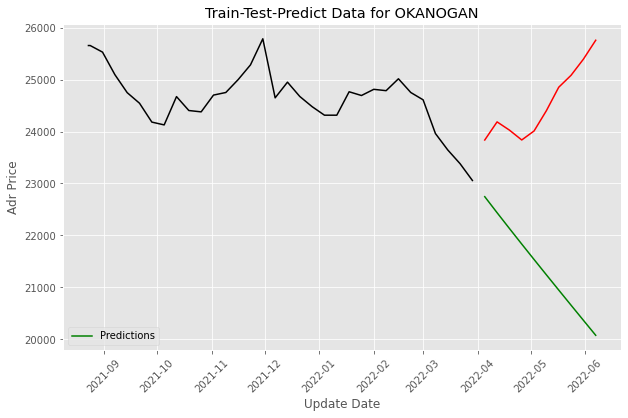

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81002D+00    |proj g|=  1.51685D+00

At iterate    5    f=  6.44839D+00    |proj g|=  1.20474D-02

At iterate   10    f=  6.42381D+00    |proj g|=  3.06335D-02

At iterate   15    f=  6.41287D+00    |proj g|=  2.80930D-02

At iterate   20    f=  6.40977D+00    |proj g|=  1.77742D-03

At iterate   25    f=  6.40961D+00    |proj g|=  5.20984D-03

At iterate   30    f=  6.38688D+00    |proj g|=  1.50725D-01

At iterate   35    f=  6.37045D+00    |proj g|=  1.66663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


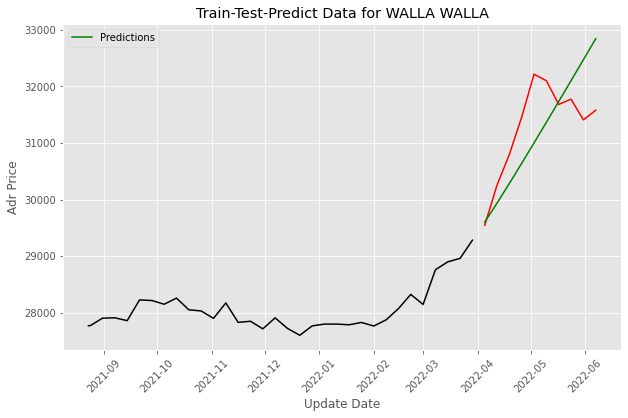

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31451D+00    |proj g|=  4.50810D-01

At iterate    5    f=  7.25836D+00    |proj g|=  2.62251D-03

At iterate   10    f=  7.25529D+00    |proj g|=  7.64562D-02

At iterate   15    f=  7.25139D+00    |proj g|=  3.38306D-03

At iterate   20    f=  7.25136D+00    |proj g|=  6.99933D-04

At iterate   25    f=  7.25119D+00    |proj g|=  9.93808D-03

At iterate   30    f=  7.24888D+00    |proj g|=  5.00300D-03

At iterate   35    f=  7.24885D+00    |proj g|=  1.96421D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


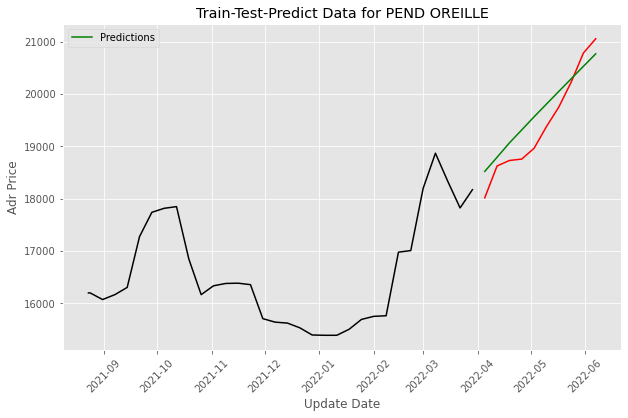

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71544D+00    |proj g|=  5.04604D+00

At iterate    5    f=  7.47214D+00    |proj g|=  2.26645D-02

At iterate   10    f=  7.43327D+00    |proj g|=  1.58570D-01

At iterate   15    f=  7.41980D+00    |proj g|=  3.43933D-03

At iterate   20    f=  7.41822D+00    |proj g|=  7.23002D-02

At iterate   25    f=  7.40054D+00    |proj g|=  4.57738D-01

At iterate   30    f=  7.36892D+00    |proj g|=  3.30874D-02

At iterate   35    f=  7.34245D+00    |proj g|=  1.45757D-01

At iterate   40    f=  7.33525D+00    |proj g|=  2.28872D-01

At iterate   45    f=  7.33012D+00    |proj g|=  9.60964D-02

At iterate   50    f=  7.30575D+00    |proj g|=  8.11080D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

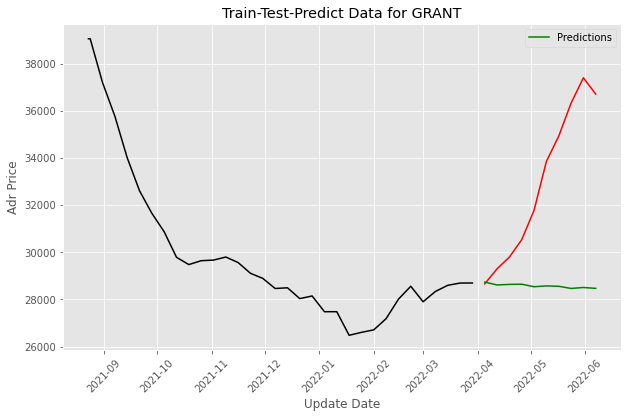

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.83554D+00    |proj g|=  8.68860D-01

At iterate    5    f=  6.62924D+00    |proj g|=  2.65773D-02

At iterate   10    f=  6.62568D+00    |proj g|=  2.36910D-02

At iterate   15    f=  6.61978D+00    |proj g|=  6.46974D-02

At iterate   20    f=  6.60938D+00    |proj g|=  1.31975D-01

At iterate   25    f=  6.55845D+00    |proj g|=  2.87248D-01

At iterate   30    f=  6.55348D+00    |proj g|=  7.21915D-02

At iterate   35    f=  6.55335D+00    |proj g|=  4.69628D-03

At iterate   40    f=  6.55335D+00    |proj g|=  4.53301D-02

At iterate   45    f=  6.55318D+00    |proj g|=  2.03151D-01

At iterate   50    f=  6.55219D+00    |proj g|=  1.82546D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


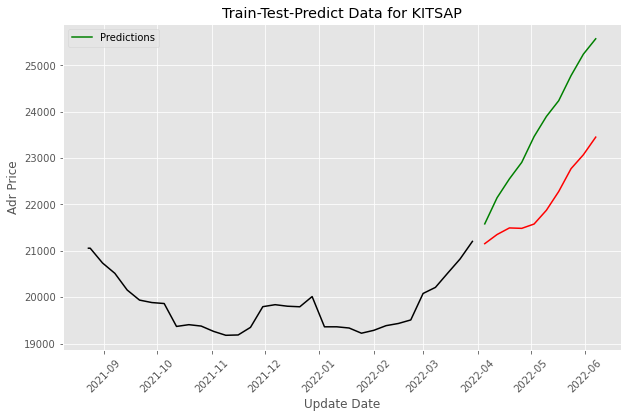

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.56796D+00    |proj g|=  5.06530D+00

At iterate    5    f=  6.23549D+00    |proj g|=  1.91627D-02

At iterate   10    f=  6.23502D+00    |proj g|=  5.10961D-03

At iterate   15    f=  6.23481D+00    |proj g|=  5.74293D-03

At iterate   20    f=  6.23352D+00    |proj g|=  9.16934D-03

At iterate   25    f=  6.22954D+00    |proj g|=  7.81216D-03

At iterate   30    f=  6.22479D+00    |proj g|=  2.93019D-03

At iterate   35    f=  6.22419D+00    |proj g|=  1.59892D-03

At iterate   40    f=  6.22412D+00    |proj g|=  1.41251D-03

At iterate   45    f=  6.22410D+00    |proj g|=  2.46167D-04

At iterate   50    f=  6.22410D+00    |proj g|=  1.46787D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


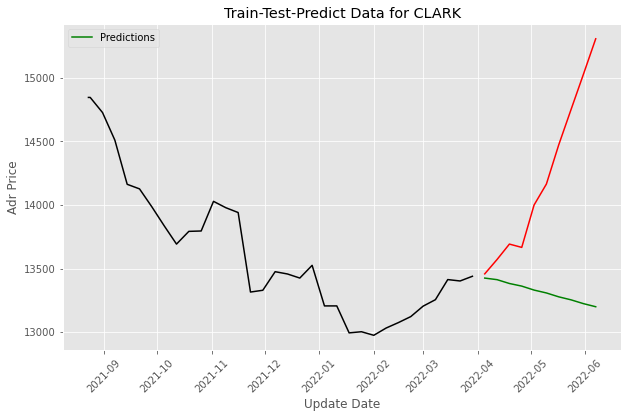

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.35611D+00    |proj g|=  2.69155D-01

At iterate    5    f=  6.29404D+00    |proj g|=  4.55232D-02

At iterate   10    f=  6.27004D+00    |proj g|=  1.16696D-02

At iterate   15    f=  6.26898D+00    |proj g|=  1.06322D-03

At iterate   20    f=  6.26355D+00    |proj g|=  2.37281D-02

At iterate   25    f=  6.25830D+00    |proj g|=  2.10220D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     31      1     0     0   

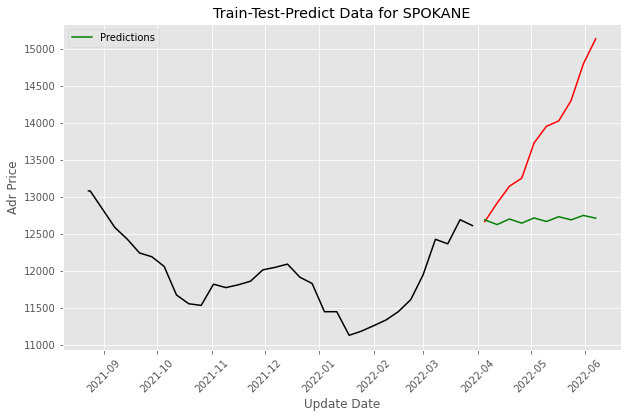

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.66900D+00    |proj g|=  1.26813D+00

At iterate    5    f=  7.43418D+00    |proj g|=  1.48771D-01

At iterate   10    f=  7.29188D+00    |proj g|=  5.29327D-01

At iterate   15    f=  7.19109D+00    |proj g|=  1.13891D-01

At iterate   20    f=  7.18506D+00    |proj g|=  2.81226D-02

At iterate   25    f=  7.18485D+00    |proj g|=  3.41202D-04

At iterate   30    f=  7.18485D+00    |proj g|=  3.91538D-03

At iterate   35    f=  7.18416D+00    |proj g|=  4.30079D-02

At iterate   40    f=  7.17931D+00    |proj g|=  1.62930D-02

At iterate   45    f=  7.17898D+00    |proj g|=  3.67460D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


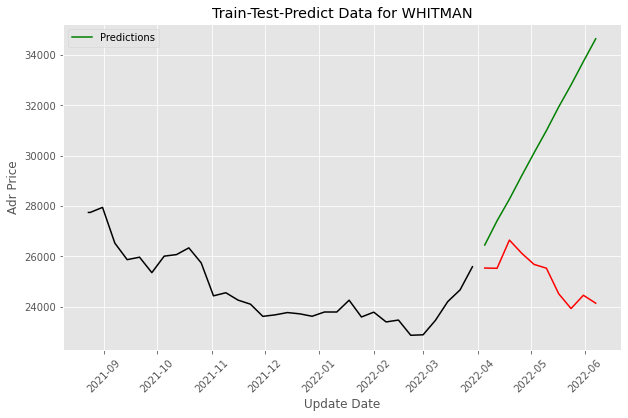

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10440D+00    |proj g|=  6.49952D-01

At iterate    5    f=  6.97201D+00    |proj g|=  1.36307D-01

At iterate   10    f=  6.95848D+00    |proj g|=  2.18968D-02

At iterate   15    f=  6.95750D+00    |proj g|=  3.87680D-03

At iterate   20    f=  6.95749D+00    |proj g|=  2.23148D-03

At iterate   25    f=  6.95739D+00    |proj g|=  5.33753D-03

At iterate   30    f=  6.95736D+00    |proj g|=  2.33084D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

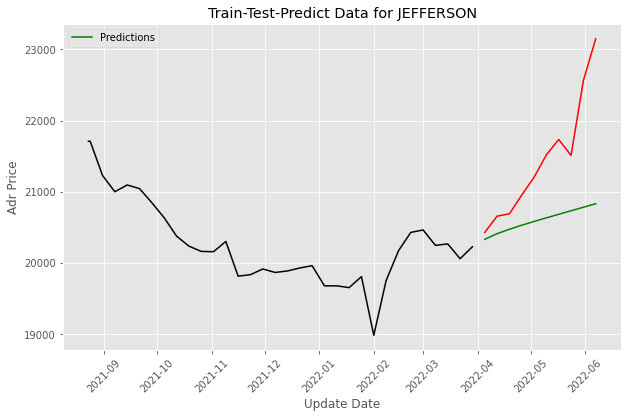

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.84101D+00    |proj g|=  2.85083D-01

At iterate    5    f=  6.72620D+00    |proj g|=  3.61940D-02

At iterate   10    f=  6.71481D+00    |proj g|=  1.33844D-02

At iterate   15    f=  6.71274D+00    |proj g|=  1.97014D-02

At iterate   20    f=  6.67919D+00    |proj g|=  1.77183D-01

At iterate   25    f=  6.64543D+00    |proj g|=  1.51864D-03

At iterate   30    f=  6.64540D+00    |proj g|=  1.15735D-03
  ys=-2.423E-03  -gs= 3.275E-04 BFGS update SKIPPED

At iterate   35    f=  6.63581D+00    |proj g|=  1.44630D-01

At iterate   40    f=  6.61523D+00    |proj g|=  1.90965D-02

At iterate   45    f=  6.61458D+00    |proj g|=  5.78479D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 This problem is unconstrained.


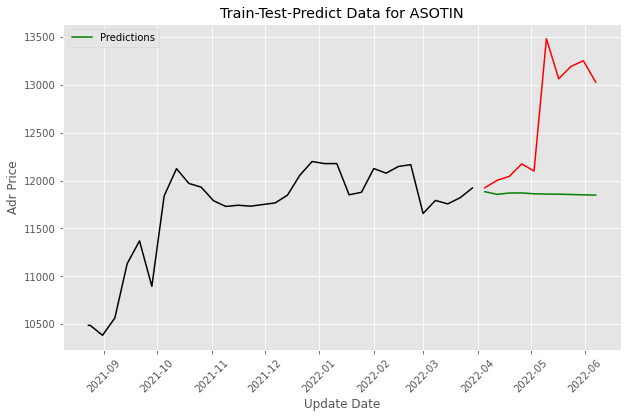

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24027D+00    |proj g|=  4.19720D-01

At iterate    5    f=  7.19238D+00    |proj g|=  4.07162D-02

At iterate   10    f=  7.18807D+00    |proj g|=  5.48073D-03

At iterate   15    f=  7.18805D+00    |proj g|=  1.64181D-03

At iterate   20    f=  7.18793D+00    |proj g|=  2.38829D-02

At iterate   25    f=  7.18737D+00    |proj g|=  6.69442D-03

At iterate   30    f=  7.18732D+00    |proj g|=  1.17786D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

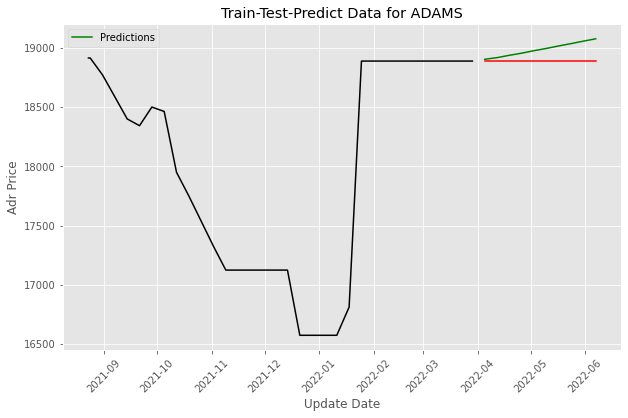

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.48374D+00    |proj g|=  7.02236D-01

At iterate    5    f=  7.43183D+00    |proj g|=  3.06125D-02

At iterate   10    f=  7.41986D+00    |proj g|=  1.50518D-01

At iterate   15    f=  7.37495D+00    |proj g|=  3.30215D-01

At iterate   20    f=  7.36736D+00    |proj g|=  2.18553D-02

At iterate   25    f=  7.36301D+00    |proj g|=  1.39176D-01

At iterate   30    f=  7.35914D+00    |proj g|=  1.39056D-01

At iterate   35    f=  7.35787D+00    |proj g|=  2.13711D-02

At iterate   40    f=  7.35709D+00    |proj g|=  6.63662D-03

At iterate   45    f=  7.35249D+00    |proj g|=  5.69409D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

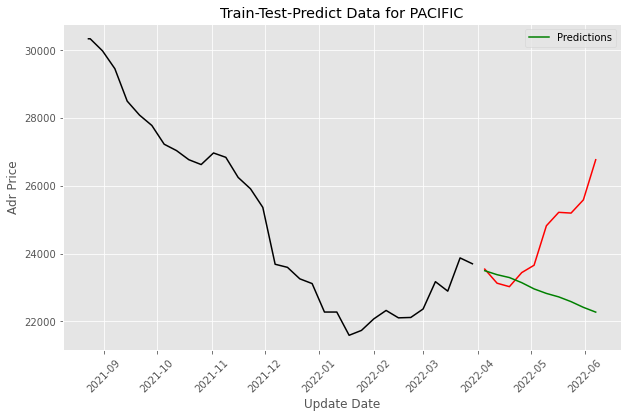

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05054D+01    |proj g|=  6.77624D+00

At iterate    5    f=  8.38434D+00    |proj g|=  3.05293D-01

At iterate   10    f=  8.36536D+00    |proj g|=  5.86387D-03

At iterate   15    f=  8.36323D+00    |proj g|=  2.03204D-01

At iterate   20    f=  8.35932D+00    |proj g|=  9.33036D-03

At iterate   25    f=  8.35756D+00    |proj g|=  5.69402D-02

At iterate   30    f=  8.35440D+00    |proj g|=  3.25742D-02

At iterate   35    f=  8.35066D+00    |proj g|=  1.35516D-02

At iterate   40    f=  8.34893D+00    |proj g|=  5.08102D-03

At iterate   45    f=  8.34733D+00    |proj g|=  1.66876D-03

At iterate   50    f=  8.34521D+00    |proj g|=  5.16606D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


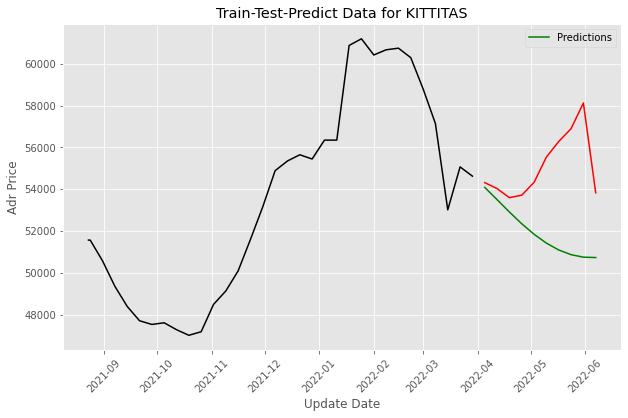

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.53623D+00    |proj g|=  1.77301D+00

At iterate    5    f=  9.14041D+00    |proj g|=  4.95665D-02

At iterate   10    f=  9.12401D+00    |proj g|=  5.95640D-02

At iterate   15    f=  9.09833D+00    |proj g|=  7.12631D-02

At iterate   20    f=  9.08330D+00    |proj g|=  1.11152D-01

At iterate   25    f=  9.05982D+00    |proj g|=  3.75304D-02

At iterate   30    f=  9.05658D+00    |proj g|=  8.84765D-03

At iterate   35    f=  9.05591D+00    |proj g|=  1.85206D-03

At iterate   40    f=  9.05564D+00    |proj g|=  1.16039D-03

At iterate   45    f=  9.03604D+00    |proj g|=  1.76926D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


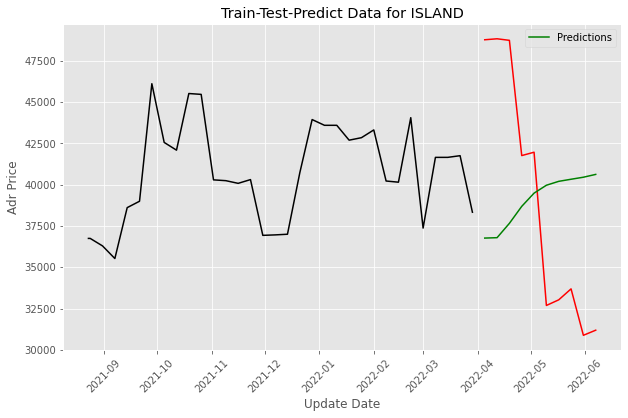

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.87791D+00    |proj g|=  6.36233D-01

At iterate    5    f=  6.74846D+00    |proj g|=  4.10948D-02

At iterate   10    f=  6.73711D+00    |proj g|=  5.39059D-03

At iterate   15    f=  6.73692D+00    |proj g|=  4.81498D-04

At iterate   20    f=  6.73680D+00    |proj g|=  3.31399D-03

At iterate   25    f=  6.72352D+00    |proj g|=  1.81757D-02

At iterate   30    f=  6.71414D+00    |proj g|=  4.06001D-03

At iterate   35    f=  6.71162D+00    |proj g|=  1.42479D-03

At iterate   40    f=  6.71126D+00    |proj g|=  6.81228D-04

At iterate   45    f=  6.71121D+00    |proj g|=  4.05258D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

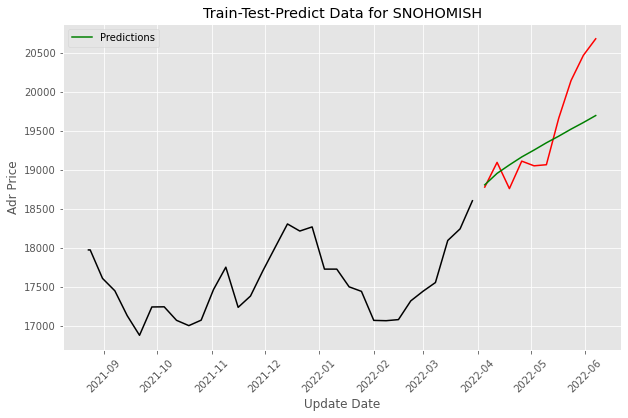

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.27885D+00    |proj g|=  4.15782D-01

At iterate    5    f=  6.18972D+00    |proj g|=  4.80299D-02

At iterate   10    f=  6.17674D+00    |proj g|=  1.61645D-02

At iterate   15    f=  6.17303D+00    |proj g|=  3.98795D-02

At iterate   20    f=  6.15831D+00    |proj g|=  3.61125D-03

At iterate   25    f=  6.15757D+00    |proj g|=  3.11169D-02

At iterate   30    f=  6.15635D+00    |proj g|=  3.36523D-03

At iterate   35    f=  6.15622D+00    |proj g|=  8.68992D-04

At iterate   40    f=  6.15604D+00    |proj g|=  1.22583D-02

At iterate   45    f=  6.15603D+00    |proj g|=  1.51843D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


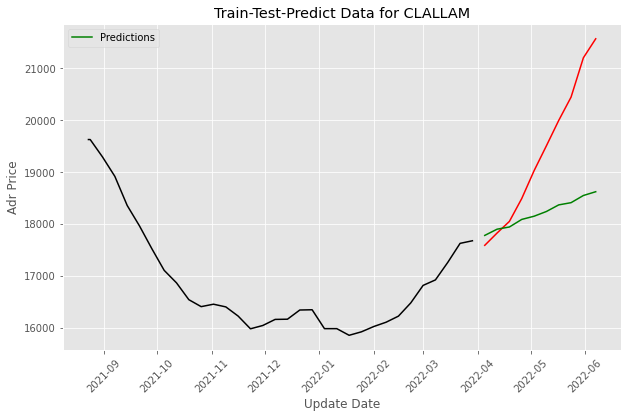

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.80494D+00    |proj g|=  2.91806D+00

At iterate    5    f=  6.29065D+00    |proj g|=  7.33033D-02

At iterate   10    f=  6.27201D+00    |proj g|=  9.22882D-03

At iterate   15    f=  6.27030D+00    |proj g|=  3.22088D-04

At iterate   20    f=  6.27002D+00    |proj g|=  4.92401D-04

At iterate   25    f=  6.26967D+00    |proj g|=  7.10240D-04

At iterate   30    f=  6.26935D+00    |proj g|=  6.79916D-04

At iterate   35    f=  6.26932D+00    |proj g|=  1.57261D-04

At iterate   40    f=  6.26931D+00    |proj g|=  2.71729D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

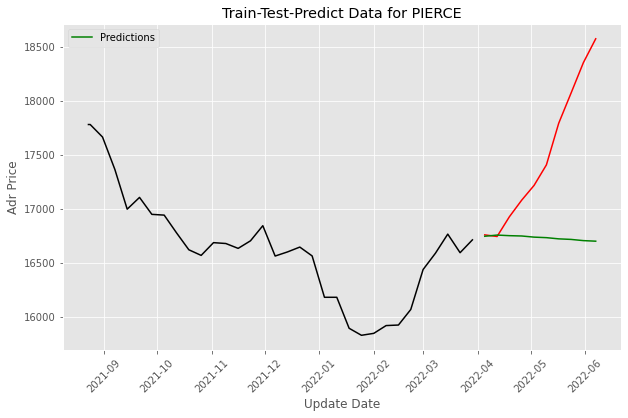

In [156]:
rmse_error = {}
for county in tempdf_pd["name"].unique():
    tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == county]
    train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-04-01", format='%Y-%m-%d')]
    test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-04-01", format='%Y-%m-%d')]
    y = train['airbnb_average_adr_cents']
    ARMAmodel = SARIMAX(y, order = (2, 2, 2))
    ARMAmodel = ARMAmodel.fit()
    y_pred = ARMAmodel.get_forecast(len(test.index))
    y_pred_df = y_pred.conf_int(alpha = 0.5)
    y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
    y_pred_df.index = test.index
    y_pred_out = y_pred_df["Predictions"] 
    print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))
    
    print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))
    
    rmse_error.update({county: math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())})
    
    

    plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
    plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
    plt.plot(y_pred_out, color='green', label = 'Predictions')
    plt.ylabel('Adr Price')
    plt.xlabel('Update Date')
    plt.xticks(rotation=45)
    plt.title("Train-Test-Predict Data for " + county)
    plt.legend()
    plt.show()




RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36741D+00    |proj g|=  6.27389D-01

At iterate    5    f=  5.22666D+00    |proj g|=  1.33638D-02

At iterate   10    f=  5.22180D+00    |proj g|=  5.75877D-02

At iterate   15    f=  5.21988D+00    |proj g|=  1.34625D-02


 This problem is unconstrained.



At iterate   20    f=  5.21363D+00    |proj g|=  6.31090D-01

At iterate   25    f=  5.19286D+00    |proj g|=  1.66367D-01

At iterate   30    f=  5.17154D+00    |proj g|=  2.45941D-01

At iterate   35    f=  5.16389D+00    |proj g|=  3.21895D-02

At iterate   40    f=  5.16096D+00    |proj g|=  1.32316D-02

At iterate   45    f=  5.15904D+00    |proj g|=  6.13711D-02

At iterate   50    f=  5.15405D+00    |proj g|=  2.68735D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61      1     0     0   2.687D-01   5.154D+00
  F =   5.1540533200645022     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

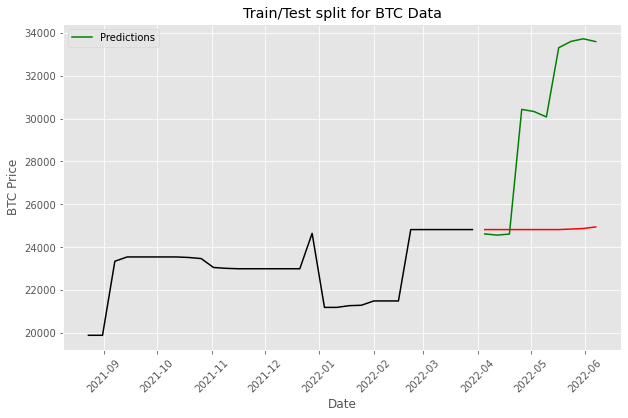

In [42]:
SARIMAXmodel = SARIMAX(y, order = (2, 1, 2), seasonal_order=(2,1,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.legend()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70387D+00    |proj g|=  8.89609D-01

At iterate    5    f=  6.42342D+00    |proj g|=  2.60345D-02

At iterate   10    f=  6.38441D+00    |proj g|=  7.51193D-03

At iterate   15    f=  6.38261D+00    |proj g|=  2.35509D-03

At iterate   20    f=  6.38165D+00    |proj g|=  6.16469D-04

At iterate   25    f=  6.37959D+00    |proj g|=  1.05111D-02

At iterate   30    f=  6.37816D+00    |proj g|=  2.22137D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

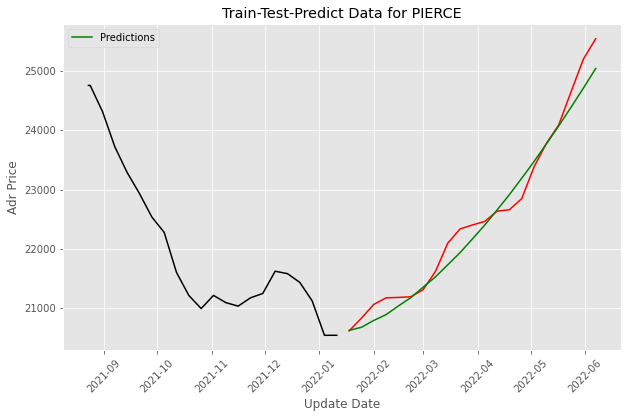

In [175]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "MASON"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-01-15", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-01-15", format='%Y-%m-%d')]
y = train['airbnb_average_adr_cents']
ARMAmodel = SARIMAX(y, order = (2, 2, 2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))


plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93236D+00    |proj g|=  7.33010D-02

At iterate    5    f=  6.92852D+00    |proj g|=  1.85711D-02

At iterate   10    f=  6.92795D+00    |proj g|=  1.25301D-04

At iterate   15    f=  6.92791D+00    |proj g|=  4.62575D-03

At iterate   20    f=  6.92755D+00    |proj g|=  2.47769D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   1.070D-06   6.928D+00
  F =   6.9275489422710832     

CONVERG

 This problem is unconstrained.


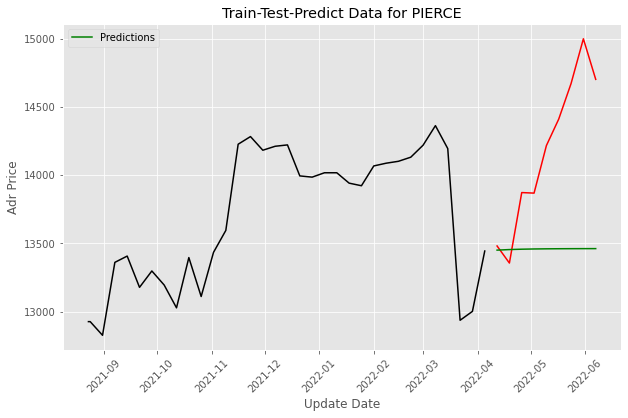

In [196]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "YAKIMA"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-04-06", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-04-06", format='%Y-%m-%d')]
y = train['airbnb_average_adr_cents']
ARMAmodel = SARIMAX(y, order = (1, 1, 1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))


plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

# 15577

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56021D+00    |proj g|=  8.80158D-02

At iterate    5    f=  7.53145D+00    |proj g|=  7.46155D-02

At iterate   10    f=  7.46180D+00    |proj g|=  9.51609D-01

At iterate   15    f=  7.40612D+00    |proj g|=  5.83014D-01

At iterate   20    f=  7.39490D+00    |proj g|=  4.14092D-02

At iterate   25    f=  7.39338D+00    |proj g|=  7.87757D-03

At iterate   30    f=  7.39311D+00    |proj g|=  1.10830D-03

At iterate   35    f=  7.39294D+00    |proj g|=  7.77606D-02

At iterate   40    f=  7.39269D+00    |proj g|=  5.56181D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

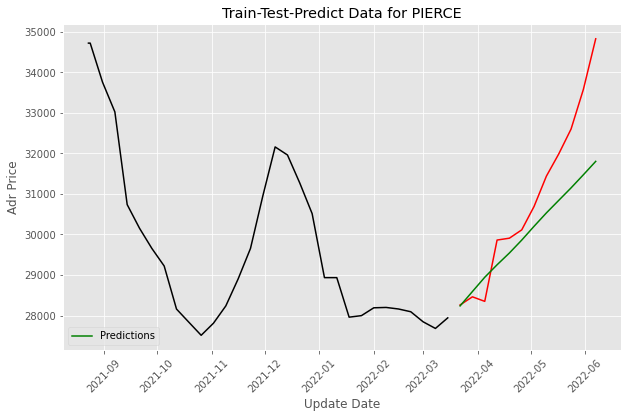

In [199]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "CHELAN"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-03-16", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-03-16", format='%Y-%m-%d')]
y = train['airbnb_average_adr_cents']
ARMAmodel = SARIMAX(y, order = (2, 2, 2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))


plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

# 15577

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32177D+00    |proj g|=  7.15852D-01

At iterate    5    f=  7.24688D+00    |proj g|=  1.90538D-02

At iterate   10    f=  7.24511D+00    |proj g|=  1.45870D-02

At iterate   15    f=  7.24036D+00    |proj g|=  2.71147D-02

At iterate   20    f=  7.23845D+00    |proj g|=  1.10241D-03

At iterate   25    f=  7.23844D+00    |proj g|=  4.82468D-03

At iterate   30    f=  7.23757D+00    |proj g|=  6.43374D-02

At iterate   35    f=  7.22986D+00    |proj g|=  2.34498D-02

At iterate   40    f=  7.22941D+00    |proj g|=  1.18498D-03

At iterate   45    f=  7.22940D+00    |proj g|=  1.28351D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

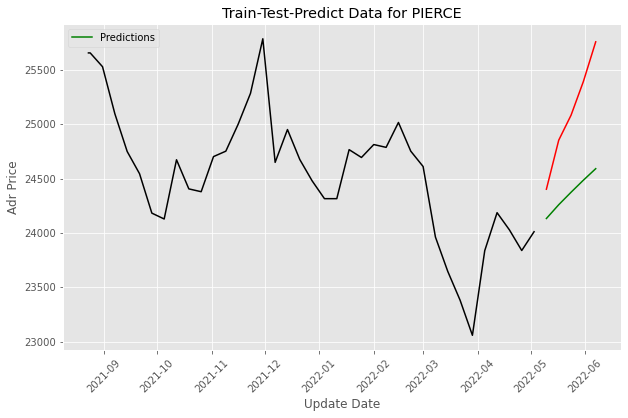

In [203]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "OKANOGAN"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-05-08", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-05-08", format='%Y-%m-%d')]
y = train['airbnb_average_adr_cents']
ARMAmodel = SARIMAX(y, order = (2, 2, 2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))


plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

# 15577

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.00128D+00    |proj g|=  3.84068D+00

At iterate    5    f=  7.45325D+00    |proj g|=  4.09745D-02

At iterate   10    f=  7.44309D+00    |proj g|=  1.14656D-02

At iterate   15    f=  7.44305D+00    |proj g|=  9.99505D-03

At iterate   20    f=  7.44003D+00    |proj g|=  1.16035D-01

At iterate   25    f=  7.42670D+00    |proj g|=  3.85264D-02

At iterate   30    f=  7.42019D+00    |proj g|=  3.81259D-02

At iterate   35    f=  7.41464D+00    |proj g|=  2.40684D-02

At iterate   40    f=  7.37046D+00    |proj g|=  1.58020D-01

At iterate   45    f=  7.36603D+00    |proj g|=  1.13103D-04
  ys=-4.180E-02  -gs= 2.929E-04 BFGS update SKIPPED

At iterate   50    f=  7.35820D+00    |proj g|=  6.89857D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


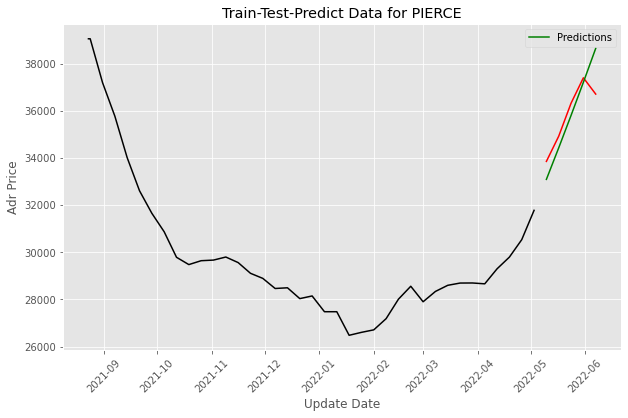

In [204]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "GRANT"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-05-08", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-05-08", format='%Y-%m-%d')]
y = train['airbnb_average_adr_cents']
ARMAmodel = SARIMAX(y, order = (2, 2, 2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))


plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

# 15577

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26024D+00    |proj g|=  2.30144D+00

At iterate    5    f=  7.64065D+00    |proj g|=  1.26267D-02

At iterate   10    f=  7.64007D+00    |proj g|=  6.70564D-03

At iterate   15    f=  7.63417D+00    |proj g|=  4.36254D-02

At iterate   20    f=  7.56277D+00    |proj g|=  2.68709D-01

At iterate   25    f=  7.54416D+00    |proj g|=  1.11624D-01

At iterate   30    f=  7.53733D+00    |proj g|=  2.53897D-04

At iterate   35    f=  7.53733D+00    |proj g|=  2.00654D-04

At iterate   40    f=  7.53702D+00    |proj g|=  2.29415D-02

At iterate   45    f=  7.53650D+00    |proj g|=  2.09363D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

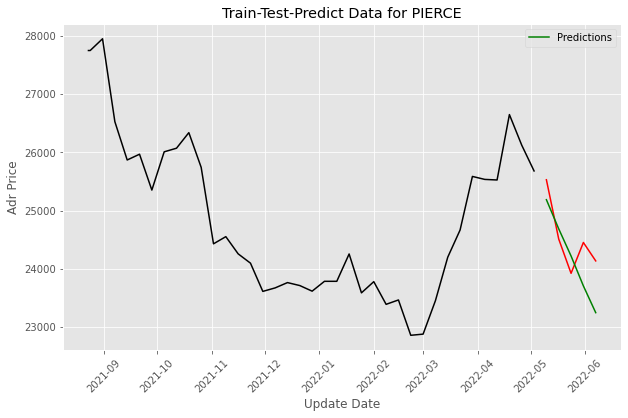

In [205]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "WHITMAN"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-05-08", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-05-08", format='%Y-%m-%d')]
y = train['airbnb_average_adr_cents']
ARMAmodel = SARIMAX(y, order = (2, 2, 2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))


plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

# 15577

In [ ]:
[('MASON', 2051.63690259208),
 ('SAN JUAN', 15577.679212095607),
 ('YAKIMA', 4264.372216397904),
 ('CHELAN', 2642.9132715816068),
 ('OKANOGAN', 3468.7135543425675),
 ('GRANT', 5418.81184086455),
 ('WHITMAN', 6303.791726645816),
 ('PACIFIC', 2191.3766583423408),
 ('KITTITAS', 3915.8820614957126),
 ('ISLAND', 8695.720403646097)]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45793D+00    |proj g|=  6.06263D-01

At iterate    5    f=  7.41552D+00    |proj g|=  1.35080D-02

At iterate   10    f=  7.41087D+00    |proj g|=  1.65915D-01

At iterate   15    f=  7.37947D+00    |proj g|=  2.45606D-01

At iterate   20    f=  7.37147D+00    |proj g|=  2.28060D-01

At iterate   25    f=  7.36463D+00    |proj g|=  1.14869D-02

At iterate   30    f=  7.36296D+00    |proj g|=  2.70470D-03

At iterate   35    f=  7.36234D+00    |proj g|=  1.21479D-02

At iterate   40    f=  7.35900D+00    |proj g|=  1.50376D-02

At iterate   45    f=  7.35888D+00    |proj g|=  4.63629D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


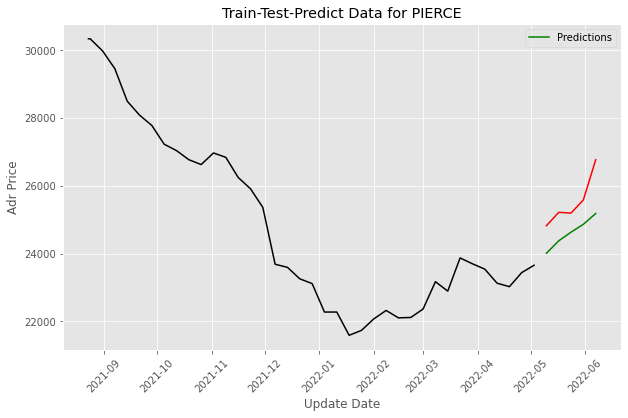

In [206]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "PACIFIC"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-05-08", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-05-08", format='%Y-%m-%d')]
y = train['airbnb_average_adr_cents']
ARMAmodel = SARIMAX(y, order = (2, 2, 2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))


plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

# 15577

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02826D+01    |proj g|=  5.92449D+00

At iterate    5    f=  8.37958D+00    |proj g|=  1.03890D-01

At iterate   10    f=  8.37191D+00    |proj g|=  3.11163D-04

At iterate   15    f=  8.37190D+00    |proj g|=  3.86346D-03

At iterate   20    f=  8.37158D+00    |proj g|=  2.84201D-03

At iterate   25    f=  8.37156D+00    |proj g|=  1.47035D-04

At iterate   30    f=  8.37153D+00    |proj g|=  8.22589D-04

At iterate   35    f=  8.37070D+00    |proj g|=  2.15142D-02

At iterate   40    f=  8.36178D+00    |proj g|=  4.09774D-03

At iterate   45    f=  8.35983D+00    |proj g|=  8.44118D-03

At iterate   50    f=  8.35858D+00    |proj g|=  2.62511D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


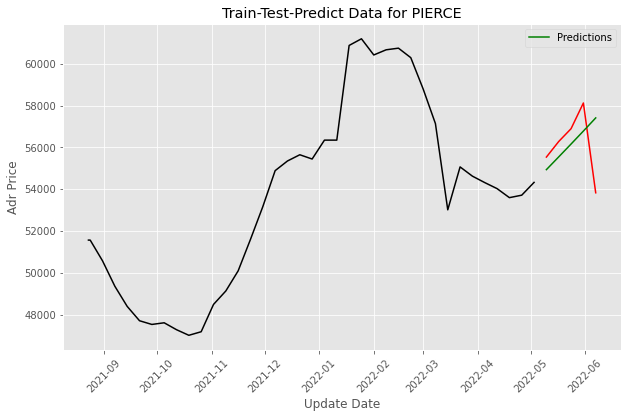

In [207]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "KITTITAS"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-05-08", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-05-08", format='%Y-%m-%d')]
y = train['airbnb_average_adr_cents']
ARMAmodel = SARIMAX(y, order = (2, 2, 2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))


plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

# 15577

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.00526D+00    |proj g|=  7.41273D-02

At iterate    5    f=  8.94379D+00    |proj g|=  7.56635D-02

At iterate   10    f=  8.93807D+00    |proj g|=  4.10054D-03

At iterate   15    f=  8.93476D+00    |proj g|=  6.73311D-03

At iterate   20    f=  8.93468D+00    |proj g|=  1.22641D-03

At iterate   25    f=  8.93468D+00    |proj g|=  8.24553D-05

At iterate   30    f=  8.93466D+00    |proj g|=  1.63389D-03

At iterate   35    f=  8.93280D+00    |proj g|=  1.68914D-02

At iterate   40    f=  8.91096D+00    |proj g|=  2.54500D-02

At iterate   45    f=  8.89705D+00    |proj g|=  1.13783D-02

At iterate   50    f=  8.89636D+00    |proj g|=  2.25462D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

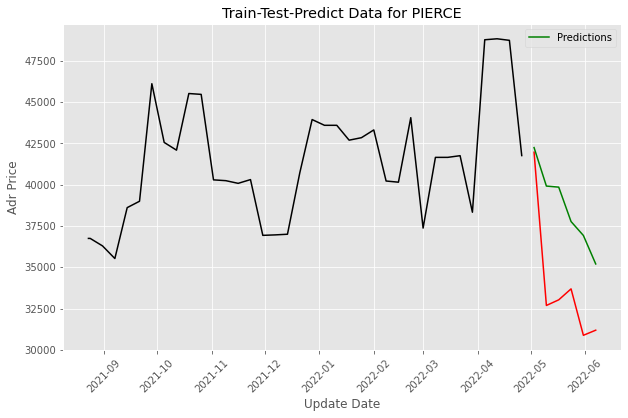

In [218]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "ISLAND"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-04-28", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-04-28", format='%Y-%m-%d')]
y = train['airbnb_average_adr_cents']
ARMAmodel = SARIMAX(y, order = (2, 3,4))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))


plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

# 15577

In [219]:
# rmse_error{'COLUMBIA': 41.89412260606148,
 'STEVENS': 1224.03043255738,
 'DOUGLAS': 1493.1095261686487,
 'MASON': 2051.63690259208,
 'COWLITZ': 1381.4106323344602,
 'SKAGIT': 690.5880676992291,
 'SAN JUAN': 15577.679212095607,
 'WHATCOM': 556.3620785376831,
 'GRAYS HARBOR': 1106.8801817870528,
 'GARFIELD': 965.7292456191614,
 'YAKIMA': 4264.372216397904,
 'LINCOLN': 1908.4809694587798,
 'WAHKIAKUM': 447.16321074182173,
 'FRANKLIN': 1942.0763717215452,
 'FERRY': 1492.0841224047417,
 'SKAMANIA': 670.1936278672446,
 'BENTON': 742.6384676809978,
 'KLICKITAT': 1326.193305718887,
 'THURSTON': 404.6640782368035,
 'KING': 606.6232484467312,
 'CHELAN': 2642.9132715816068,
 'LEWIS': 1905.5850167142883,
 'OKANOGAN': 3468.7135543425675,
 'WALLA WALLA': 767.0433705155101,
 'PEND OREILLE': 386.4408020031373,
 'GRANT': 5418.81184086455,
 'KITSAP': 1693.159925864202,
 'CLARK': 1128.9512409365925,
 'SPOKANE': 1326.2188338782742,
 'WHITMAN': 6303.791726645816,
 'JEFFERSON': 1081.3022112990982,
 'ASOTIN': 971.3408683494905,
 'ADAMS': 113.373914262549,
 'PACIFIC': 2191.3766583423408,
 'KITTITAS': 3915.8820614957126,
 'ISLAND': 8695.720403646097,
 'SNOHOMISH': 488.43044292909224,
 'CLALLAM': 1583.7410348021278,
 'PIERCE': 1001.8924464211319}

{'COLUMBIA': 41.89412260606148,
 'STEVENS': 1224.03043255738,
 'DOUGLAS': 1493.1095261686487,
 'MASON': 2051.63690259208,
 'COWLITZ': 1381.4106323344602,
 'SKAGIT': 690.5880676992291,
 'SAN JUAN': 15577.679212095607,
 'WHATCOM': 556.3620785376831,
 'GRAYS HARBOR': 1106.8801817870528,
 'GARFIELD': 965.7292456191614,
 'YAKIMA': 4264.372216397904,
 'LINCOLN': 1908.4809694587798,
 'WAHKIAKUM': 447.16321074182173,
 'FRANKLIN': 1942.0763717215452,
 'FERRY': 1492.0841224047417,
 'SKAMANIA': 670.1936278672446,
 'BENTON': 742.6384676809978,
 'KLICKITAT': 1326.193305718887,
 'THURSTON': 404.6640782368035,
 'KING': 606.6232484467312,
 'CHELAN': 2642.9132715816068,
 'LEWIS': 1905.5850167142883,
 'OKANOGAN': 3468.7135543425675,
 'WALLA WALLA': 767.0433705155101,
 'PEND OREILLE': 386.4408020031373,
 'GRANT': 5418.81184086455,
 'KITSAP': 1693.159925864202,
 'CLARK': 1128.9512409365925,
 'SPOKANE': 1326.2188338782742,
 'WHITMAN': 6303.791726645816,
 'JEFFERSON': 1081.3022112990982,
 'ASOTIN': 971.3408

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.52884D+00    |proj g|=  1.52160D-01

At iterate    5    f=  9.52238D+00    |proj g|=  3.32710D-02

At iterate   10    f=  9.52171D+00    |proj g|=  3.27675D-03

At iterate   15    f=  9.52168D+00    |proj g|=  3.93039D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   3.930D-05   9.522D+00
  F =   9.5216785961850974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
The root

 This problem is unconstrained.


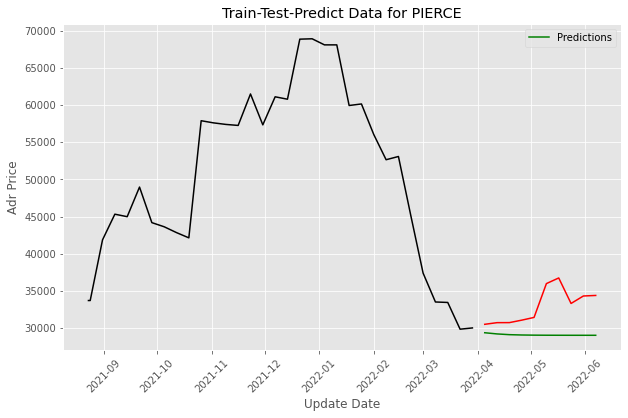

In [192]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "SAN JUAN"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-04-01", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-04-01", format='%Y-%m-%d')]
y = train['airbnb_average_adr_cents']
ARMAmodel = SARIMAX(y, order = (2, 1, 2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))


plt.plot(train[["airbnb_average_adr_cents"]], color = "black")
plt.plot(test[["airbnb_average_adr_cents"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

# 15577

In [182]:
[(i, value) for i, value in rmse_error.items() if value > 2000]

[('MASON', 2051.63690259208),
 ('SAN JUAN', 15577.679212095607),
 ('YAKIMA', 4264.372216397904),
 ('CHELAN', 2642.9132715816068),
 ('OKANOGAN', 3468.7135543425675),
 ('GRANT', 5418.81184086455),
 ('WHITMAN', 6303.791726645816),
 ('PACIFIC', 2191.3766583423408),
 ('KITTITAS', 3915.8820614957126),
 ('ISLAND', 8695.720403646097)]

Text(0.5, 1.0, 'Trend for PIERCE')

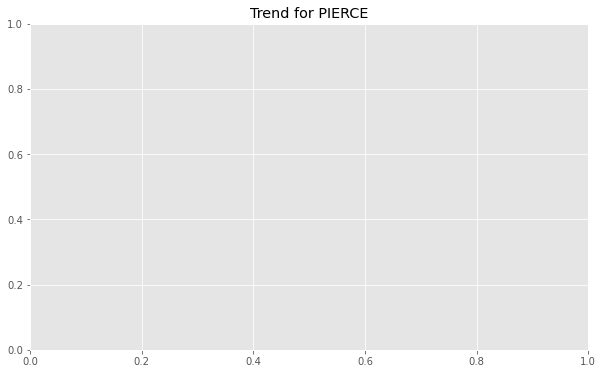

In [98]:
y_pred_out.plot(ax=ax, style='b-', subplots=True)
plt.title("Trend for " + county)

In [105]:
temp = pd.DataFrame({'date':y_pred_out.index, 'list':y_pred_out.values}).set_index('date')
temp

list
date                    
2022-04-05  24788.871689
2022-04-12  24755.945366
2022-04-19  24723.062778
2022-04-26  24690.223867
2022-05-03  24657.428575
...                  ...
2022-05-10  14859.967044
2022-05-17  14840.228991
2022-05-24  14820.517155
2022-05-31  14800.831502
2022-06-07  14781.171996

[390 rows x 1 columns]

Text(0.5, 1.0, 'Trend for PIERCE')

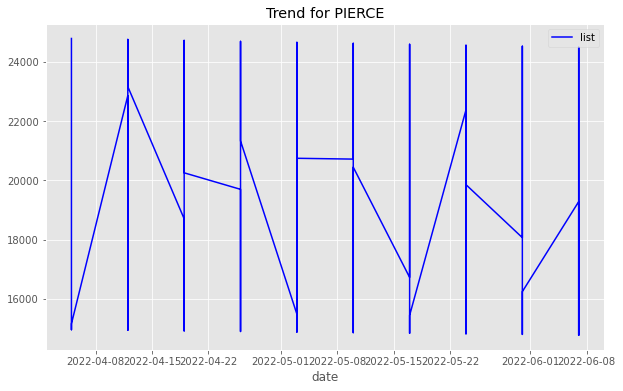

In [111]:
fig, ax = plt.subplots()
temp[['list']].plot(ax=ax, style='b-', subplots=True)

plt.title("Trend for " + county)

In [112]:
temp[['list']]

list
date                    
2022-04-05  24788.871689
2022-04-12  24755.945366
2022-04-19  24723.062778
2022-04-26  24690.223867
2022-05-03  24657.428575
...                  ...
2022-05-10  14859.967044
2022-05-17  14840.228991
2022-05-24  14820.517155
2022-05-31  14800.831502
2022-06-07  14781.171996

[390 rows x 1 columns]

In [141]:
for i in train[[]]:
    print(i)

airbnb_average_adr_cents
airbnb_average_occ
airbnb_last_updated_at
airbnb_listing_count
name
updated_at


In [147]:
tempdf.filter(F.col("name") == "COLUMBIA").sort(F.col("airbnb_last_updated_at")).show(11112, False)

22/07/20 13:38:47 WARN TaskSetManager: Stage 25 contains a task of very large size (13460 KiB). The maximum recommended task size is 1000 KiB.


+------------------------+------------------+--------------------------+--------------------+--------+--------------------------+--------------------+
|airbnb_average_adr_cents|airbnb_average_occ|airbnb_last_updated_at    |airbnb_listing_count|name    |updated_at                |updated_at_only_date|
+------------------------+------------------+--------------------------+--------------------+--------+--------------------------+--------------------+
|19900                   |85                |2021-08-23T18:18:11.166372|5                   |COLUMBIA|2021-08-23T18:18:11.180916|2021-08-23          |
|19900                   |85                |2021-08-23T18:18:11.166372|5                   |COLUMBIA|2021-08-23T18:18:11.180916|2021-08-23          |
|19900                   |85                |2021-08-23T18:18:11.166372|5                   |COLUMBIA|2021-08-23T18:18:11.180916|2021-08-23          |
|19900                   |85                |2021-08-23T18:18:11.166372|5                   |C

In [49]:
y_pred_out

updated_at_only_date
2022-04-05    16749.170779
2022-04-12    16760.213981
2022-04-19    16754.636522
2022-04-26    16751.642582
2022-05-03    16741.108336
2022-05-10    16736.237944
2022-05-17    16725.120439
2022-05-24    16719.949278
2022-05-31    16708.813461
2022-06-07    16703.546788
Name: Predictions, dtype: float64

In [53]:
import statsmodels.api as sm
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

In [58]:
seasonal_decompose(tempdf_pd_columbia[["airbnb_average_adr_cents"]])

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [90]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
#     fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    print("fcast2", fcast2)
#     fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is airbnb_average_adr_cents   NaN
36                         NaN
37                         NaN
38                         NaN
39                         NaN
40                         NaN
41                         NaN
42                         NaN
43                         NaN
44                         NaN
45                         NaN
46                         NaN
47                         NaN
48                         NaN
49                         NaN
50                         NaN
51                         NaN
52                         NaN
53                         NaN
54                         NaN
55                         NaN
56                         NaN
57                         NaN
58                         NaN
59                         NaN
60                         NaN
61                         NaN
62                         NaN
63                         NaN
64                       

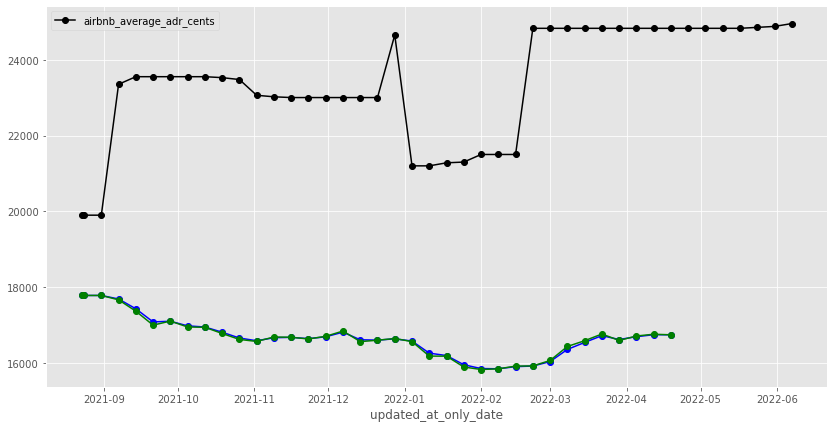

In [91]:
predict_date = len(tempdf_pd_columbia) - len(tempdf_pd_columbia[tempdf_pd_columbia.index >= pd.to_datetime("2022-04-01", format='%Y-%m-%d')])
ses(tempdf_pd_columbia[["airbnb_average_adr_cents"]], train[["airbnb_average_adr_cents"]], test[["airbnb_average_adr_cents"]], 0.8, predict_date)

In [112]:
from statsmodels.tsa.api import Holt

def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))
    
    
    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="o", color='blue')
#     fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
#     fcast2.plot(color='red', marker="o", legend=True)

    plt.show()

The Root Mean Squared Error of Holts Linear trend airbnb_average_adr_cents   NaN
36                         NaN
37                         NaN
38                         NaN
39                         NaN
40                         NaN
41                         NaN
42                         NaN
43                         NaN
44                         NaN
45                         NaN
46                         NaN
47                         NaN
48                         NaN
49                         NaN
50                         NaN
51                         NaN
52                         NaN
53                         NaN
54                         NaN
55                         NaN
56                         NaN
57                         NaN
58                         NaN
59                         NaN
60                         NaN
61                         NaN
62                         NaN
63                         NaN
64                         NaN
65                  

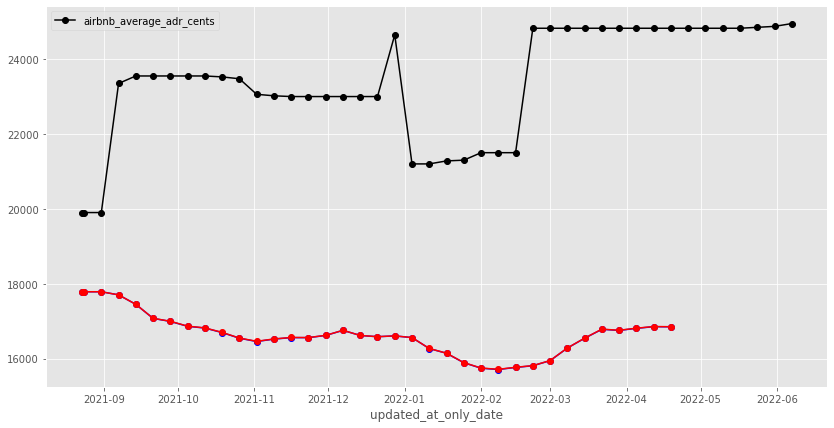

In [113]:
predict_date = len(tempdf_pd_columbia) - len(tempdf_pd_columbia[tempdf_pd_columbia.index >= pd.to_datetime("2022-04-01", format='%Y-%m-%d')])
holt(tempdf_pd_columbia[["airbnb_average_adr_cents"]], train[["airbnb_average_adr_cents"]], test[["airbnb_average_adr_cents"]], 0.6,0.2, predict_date)

In [93]:
predict_date

33

In [116]:
import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal
                    
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [117]:
sarima_grid_search(y,52)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08291D+01    |proj g|=  2.29683D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.297D-07   1.083D+01
  F =   10.829091041462318     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0         NaN  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.05306D+01    |proj g|=  3.19070D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     50     70      1     1     0   3.191D-03   1.053D+01
  F =   10.530646222341735     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.19469D+00    |proj g|=  3.35091D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      4      1     0     0   9.223D-07   6.194D+00
  F =   6.1939046377369245     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0         NaN  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.3

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0         NaN  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=          NaN


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0         NaN  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0         NaN  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=          NaN



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0         NaN  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.16932D+00    |proj g|=  1.38217D+00

At iterate    5    f=  6.16919D+00    |proj g|=  1.89270D-01

At iterate   10    f=  6.16896D+00    |proj g|=  9.48825D-01

At iterate   15    f=  6.16889D+00    |proj g|=  6.86536D-04

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.17129D+00    |proj g|=  4.78613D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.786D-06   6.171D+00
  F =   6.1712879393067714     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=          NaN



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0         NaN  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0         NaN  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=          NaN

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

In [122]:
# Lowest AIC values are SARIMA(0, 0, 0)x(0, 1, 0, 52)

def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
#     results.plot_diagnostics(figsize=(16, 8))
#     plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))
    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)


In [125]:
model = sarima_eva(tempdf_pd_columbia[["airbnb_average_adr_cents"]],(1, 1, 1),(1, 1, 0, 52),52,'2022-04-05',test[["airbnb_average_adr_cents"]])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0    

 This problem is unconstrained.


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [124]:
tempdf_pd_columbia

airbnb_average_adr_cents  airbnb_average_occ  \
updated_at_only_date                                                 
2021-08-23                               19900                  85   
2021-08-24                               19900                  85   
2021-08-31                               19900                  77   
2021-09-07                               23350                  65   
2021-09-14                               23550                  57   
2021-09-21                               23550                  64   
2021-09-28                               23550                  66   
2021-10-05                               23550                  68   
2021-10-12                               23550                  63   
2021-10-19                               23525                  75   
2021-10-26                               23475                  67   
2021-11-02                               23060                  54   
2021-11-09                               23020                  55   
2021-11-16                               23000                  55   
2021-11-23                               23000                  53   
2021-11-30                               23000                  53   
2021-12-07                               23000                  55   
2021-12-14                               23000                  50   
2021-12-21                               23000                  43   
2021-12-28                               24650                  35   
2022-01-04                               21200                  22   
2022-01-11                               21200                  22   
2022-01-18                               21280                  15   
2022-01-25                               21300                  31   
2022-02-01                               21500                  20   
2022-02-08                               21500                  16   
2022-02-15                               21500                  13   
2022-02-22                               24825                  15   
2022-03-01                               24825                  25   
2022-03-08                               24825                  26   
2022-03-15                               24825                  72   
2022-03-22                               24825                  76   
2022-03-29                               24825                  83   
2022-04-05                               24825                  90   
2022-04-12                               24825                  88   
2022-04-19                               24825                  90   
2022-04-26                               24825                  83   
2022-05-03                               24825                  77   
2022-05-10                               24825                  75   
2022-05-17                               24825                  72   
2022-05-24                               24850                  69   
2022-05-31                               24875                  69   
2022-06-07                               24950                  65   

                          airbnb_last_updated_at  airbnb_listing_count  \
updated_at_only_date                                                     
2021-08-23            2021-08-23T18:18:11.166372                     5   
2021-08-24            2021-08-24 02:00:37.713872                     5   
2021-08-31            2021-08-31 02:00:26.833371                     5   
2021-09-07            2021-09-07 02:00:33.409033                     4   
2021-09-14             2021-09-14 02:00:16.35856                     4   
2021-09-21            2021-09-21 02:01:06.104966                     4   
2021-09-28            2021-09-28 02:00:55.026118                     4   
2021-10-05            2021-10-05 02:01:10.724799                     4   
2021-10-12            2021-10-12 02:01:22.920643                     4   
2021-10-19            2021-10-19 02:01:15.057347         

In [135]:
test[["airbnb_average_adr_cents"]].squeeze(axis=0)

airbnb_average_adr_cents
updated_at_only_date                          
2022-04-05                               24825
2022-04-12                               24825
2022-04-19                               24825
2022-04-26                               24825
2022-05-03                               24825
2022-05-10                               24825
2022-05-17                               24825
2022-05-24                               24850
2022-05-31                               24875
2022-06-07                               24950

In [137]:
test.iloc[:,0] 

updated_at_only_date
2022-04-05    24825
2022-04-12    24825
2022-04-19    24825
2022-04-26    24825
2022-05-03    24825
2022-05-10    24825
2022-05-17    24825
2022-05-24    24850
2022-05-31    24875
2022-06-07    24950
Name: airbnb_average_adr_cents, dtype: int64

In [145]:
test_rmse = [[15303,  15227.346174],
[15357,  15236.670308],
[15464,  15249.638194],
[16335,  15265.368777],
[16518,  15283.225285],
[16583,  15302.727578],
[16743,  15323.507021],
[16906,  15345.278498],
[17109,  15367.820836],
[17159,  15390.962261]]

In [148]:
diff = []
for i in test_rmse:
    diff.append((i[0] - i[1])**2)

In [154]:
math.sqrt(sum(diff)/len(diff))

1224.0304324853114

In [153]:
import math

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10483D+00    |proj g|=  1.28351D+00

At iterate    5    f=  3.61237D+00    |proj g|=  2.25532D-02

At iterate   10    f=  3.60160D+00    |proj g|=  2.60499D-02

At iterate   15    f=  3.60032D+00    |proj g|=  1.67221D-03

At iterate   20    f=  3.60012D+00    |proj g|=  4.71167D-03

At iterate   25    f=  3.60003D+00    |proj g|=  7.40696D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     29      1     0     0   

 This problem is unconstrained.


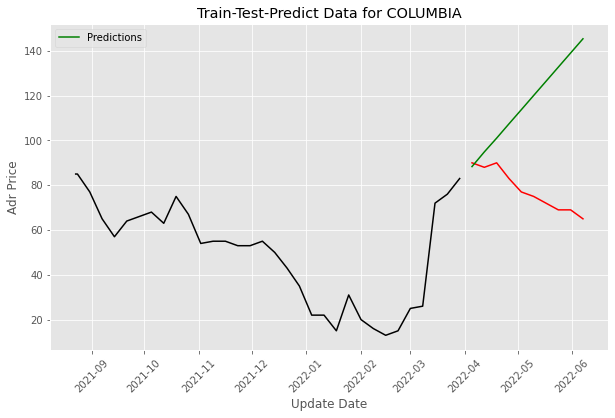

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77955D+00    |proj g|=  1.21106D+00

At iterate    5    f=  2.13663D+00    |proj g|=  1.09937D-01

At iterate   10    f=  2.10713D+00    |proj g|=  1.60624D-02

At iterate   15    f=  2.10456D+00    |proj g|=  3.58721D-03

At iterate   20    f=  2.10384D+00    |proj g|=  5.24446D-03

At iterate   25    f=  2.10359D+00    |proj g|=  1.50103D-03

At iterate   30    f=  2.10337D+00    |proj g|=  1.58346D-03

At iterate   35    f=  2.10332D+00    |proj g|=  4.41756D-04

At iterate   40    f=  2.10331D+00    |proj g|=  2.03136D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


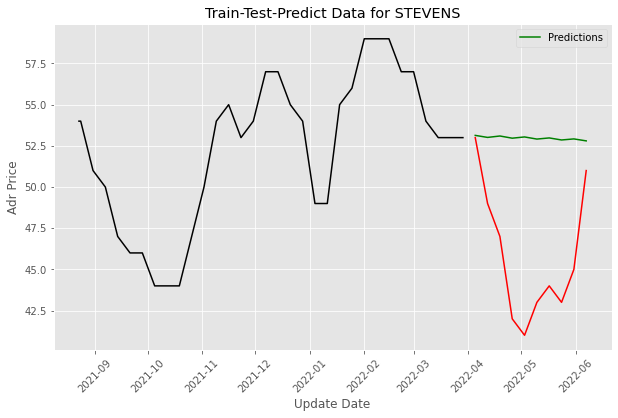

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56117D+00    |proj g|=  6.60960D-02

At iterate    5    f=  2.49172D+00    |proj g|=  1.12480D-02

At iterate   10    f=  2.48889D+00    |proj g|=  1.23720D-03

At iterate   15    f=  2.48838D+00    |proj g|=  1.53840D-03

At iterate   20    f=  2.48832D+00    |proj g|=  2.31819D-04

At iterate   25    f=  2.48831D+00    |proj g|=  8.94253D-05

At iterate   30    f=  2.48831D+00    |proj g|=  1.62642D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


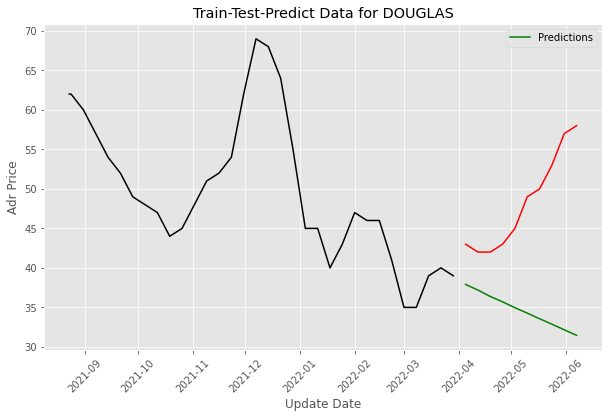

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22309D+00    |proj g|=  7.15613D-02

At iterate    5    f=  2.19708D+00    |proj g|=  8.91629D-02

At iterate   10    f=  2.18619D+00    |proj g|=  7.31809D-03

At iterate   15    f=  2.18614D+00    |proj g|=  1.34425D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   8.941D-06   2.186D+00
  F =   2.1861343380371019     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
The root

 This problem is unconstrained.


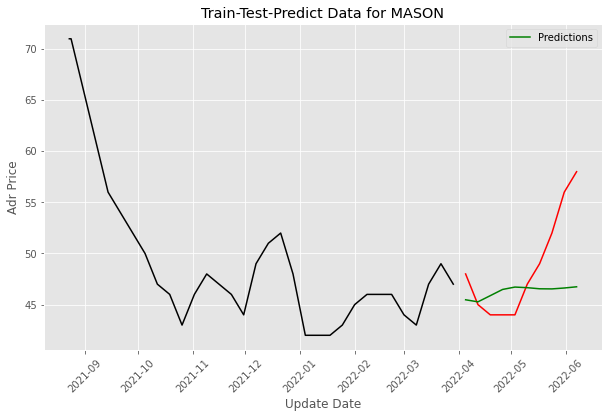

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17783D+00    |proj g|=  1.88662D-01


 This problem is unconstrained.



At iterate    5    f=  2.13740D+00    |proj g|=  8.41721D-02

At iterate   10    f=  2.10466D+00    |proj g|=  7.15162D-03

At iterate   15    f=  2.10269D+00    |proj g|=  1.19980D-02

At iterate   20    f=  2.10223D+00    |proj g|=  2.38378D-04

At iterate   25    f=  2.10220D+00    |proj g|=  3.15953D-04

At iterate   30    f=  2.10219D+00    |proj g|=  3.85985D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     47      1     0     0   5.325D-05   2.102D+00
  F =   2.1021922577120118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
The root mean square error for theCOWLITZ is 12.984

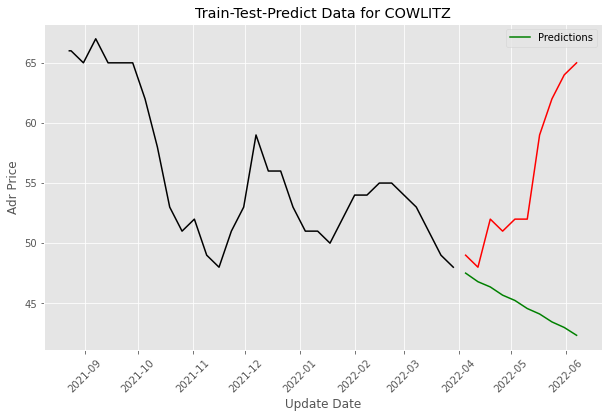

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.16189D+00    |proj g|=  1.57433D-01

At iterate    5    f=  2.13581D+00    |proj g|=  9.15354D-03

At iterate   10    f=  2.13162D+00    |proj g|=  1.59784D-02

At iterate   15    f=  2.11767D+00    |proj g|=  2.62549D-02

At iterate   20    f=  2.10650D+00    |proj g|=  4.79706D-03

At iterate   25    f=  2.10360D+00    |proj g|=  4.01071D-03

At iterate   30    f=  2.10278D+00    |proj g|=  2.17299D-03

At iterate   35    f=  2.10262D+00    |proj g|=  6.00109D-04

At iterate   40    f=  2.10257D+00    |proj g|=  1.80182D-04

At iterate   45    f=  2.10255D+00    |proj g|=  1.05061D-04

At iterate   50    f=  2.10255D+00    |proj g|=  4.79220D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

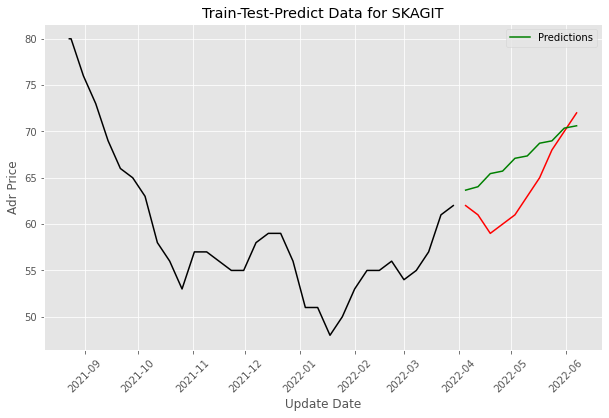

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.04483D+00    |proj g|=  7.58437D-02

At iterate    5    f=  1.99660D+00    |proj g|=  4.74383D-02

At iterate   10    f=  1.98634D+00    |proj g|=  4.20256D-03

At iterate   15    f=  1.98543D+00    |proj g|=  2.08707D-03

At iterate   20    f=  1.98534D+00    |proj g|=  7.37122D-04

At iterate   25    f=  1.98533D+00    |proj g|=  2.87249D-04

At iterate   30    f=  1.98533D+00    |proj g|=  1.07524D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

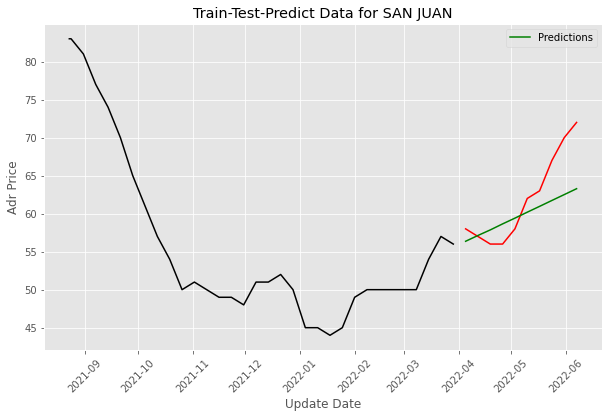

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30407D+00    |proj g|=  7.46305D-02

At iterate    5    f=  2.24944D+00    |proj g|=  2.89625D-02

At iterate   10    f=  2.24126D+00    |proj g|=  1.07335D-02

At iterate   15    f=  2.23532D+00    |proj g|=  1.35272D-02

At iterate   20    f=  2.23432D+00    |proj g|=  1.96126D-03

At iterate   25    f=  2.23419D+00    |proj g|=  1.59803D-04

At iterate   30    f=  2.23418D+00    |proj g|=  2.36183D-04

At iterate   35    f=  2.23418D+00    |proj g|=  1.79354D-04

At iterate   40    f=  2.23418D+00    |proj g|=  8.50364D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


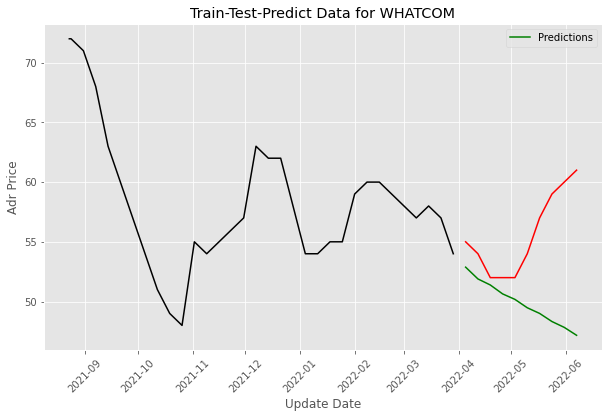

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26975D+00    |proj g|=  9.31151D-02

At iterate    5    f=  2.23872D+00    |proj g|=  3.94436D-02

At iterate   10    f=  2.22762D+00    |proj g|=  1.13593D-02

At iterate   15    f=  2.22473D+00    |proj g|=  7.21843D-04

At iterate   20    f=  2.22462D+00    |proj g|=  3.64834D-04

At iterate   25    f=  2.22460D+00    |proj g|=  2.32372D-04

At iterate   30    f=  2.22460D+00    |proj g|=  2.02949D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


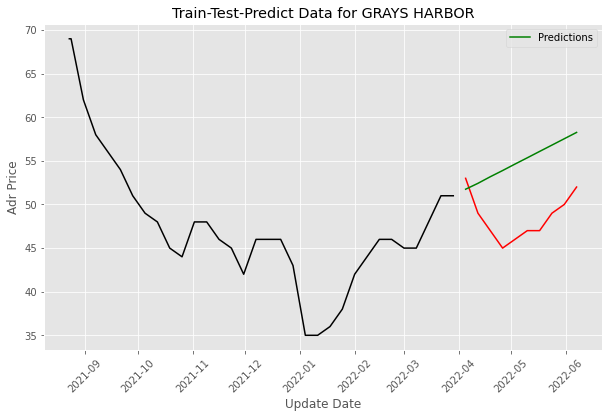

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05078D+00    |proj g|=  9.19280D-01

At iterate    5    f=  3.60632D+00    |proj g|=  3.74903D-02

At iterate   10    f=  3.59828D+00    |proj g|=  2.29027D-03

At iterate   15    f=  3.59596D+00    |proj g|=  7.38630D-03

At iterate   20    f=  3.59234D+00    |proj g|=  2.61083D-03

At iterate   25    f=  3.59120D+00    |proj g|=  3.04964D-04

At iterate   30    f=  3.59104D+00    |proj g|=  2.05119D-04

At iterate   35    f=  3.59103D+00    |proj g|=  4.73555D-04

At iterate   40    f=  3.59103D+00    |proj g|=  1.90475D-05

At iterate   45    f=  3.59103D+00    |proj g|=  7.21612D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

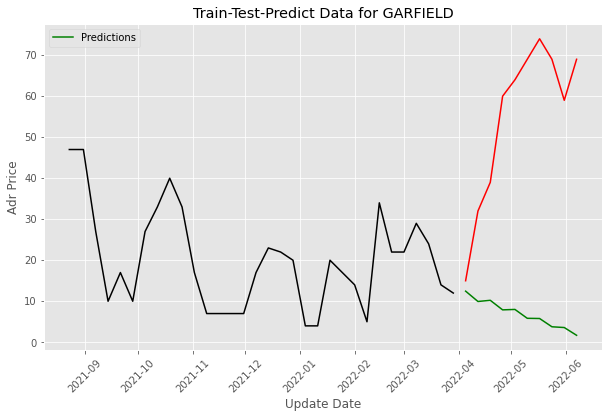

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28322D+00    |proj g|=  2.30570D-01

At iterate    5    f=  2.21257D+00    |proj g|=  2.13509D-02

At iterate   10    f=  2.21190D+00    |proj g|=  2.04942D-03

At iterate   15    f=  2.21142D+00    |proj g|=  2.33296D-03

At iterate   20    f=  2.21140D+00    |proj g|=  8.98711D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   2.210D-07   2.211D+00
  F =   2.2113993495446351     

CONVERG

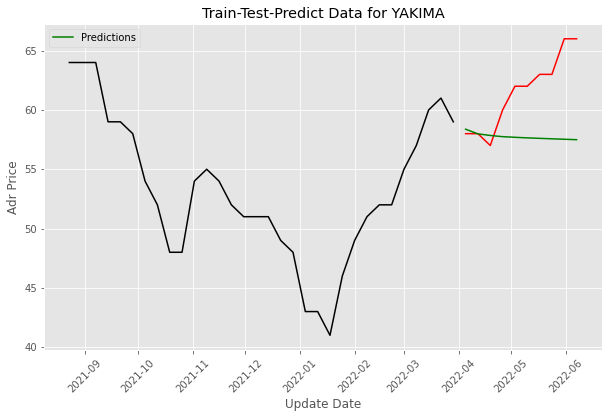

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.75685D+00    |proj g|=  6.68419D-02

At iterate    5    f=  2.75341D+00    |proj g|=  2.36792D-02

At iterate   10    f=  2.75302D+00    |proj g|=  5.73827D-04

At iterate   15    f=  2.75302D+00    |proj g|=  4.86726D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   4.867D-06   2.753D+00
  F =   2.7530239473200937     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
The root

 This problem is unconstrained.


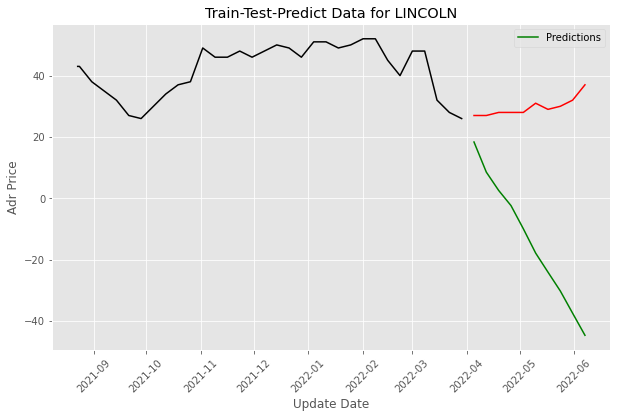

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17671D+00    |proj g|=  5.49034D-01

At iterate    5    f=  2.71663D+00    |proj g|=  2.03976D-02

At iterate   10    f=  2.71157D+00    |proj g|=  2.04805D-03

At iterate   15    f=  2.71124D+00    |proj g|=  5.21861D-04

At iterate   20    f=  2.71092D+00    |proj g|=  1.47947D-03

At iterate   25    f=  2.71089D+00    |proj g|=  2.94804D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   

 This problem is unconstrained.


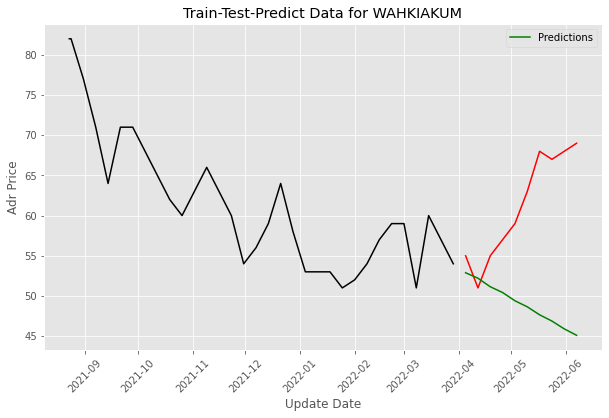

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84814D+00    |proj g|=  3.98774D-01

At iterate    5    f=  2.60464D+00    |proj g|=  3.01071D-02

At iterate   10    f=  2.58929D+00    |proj g|=  3.33995D-02

At iterate   15    f=  2.57879D+00    |proj g|=  1.34905D-02

At iterate   20    f=  2.57695D+00    |proj g|=  1.54861D-03

At iterate   25    f=  2.57673D+00    |proj g|=  3.21962D-04

At iterate   30    f=  2.57670D+00    |proj g|=  4.72713D-04

At iterate   35    f=  2.57670D+00    |proj g|=  3.40556D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


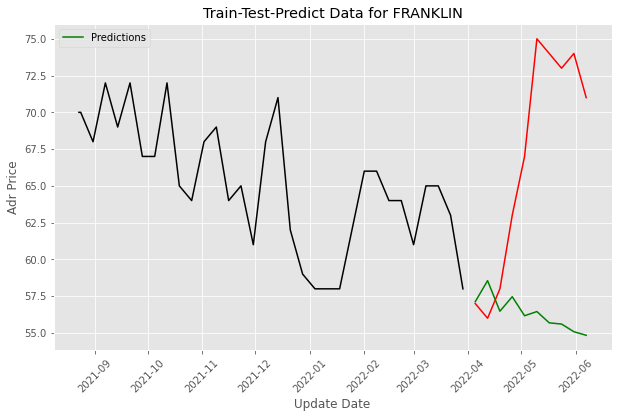

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02221D+00    |proj g|=  4.58332D-01

At iterate    5    f=  2.82833D+00    |proj g|=  1.44681D-01

At iterate   10    f=  2.76605D+00    |proj g|=  3.07039D-02

At iterate   15    f=  2.75875D+00    |proj g|=  1.38959D-03

At iterate   20    f=  2.75845D+00    |proj g|=  1.32931D-03

At iterate   25    f=  2.75840D+00    |proj g|=  1.39738D-04

At iterate   30    f=  2.75840D+00    |proj g|=  1.09471D-04

At iterate   35    f=  2.75840D+00    |proj g|=  3.62911D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


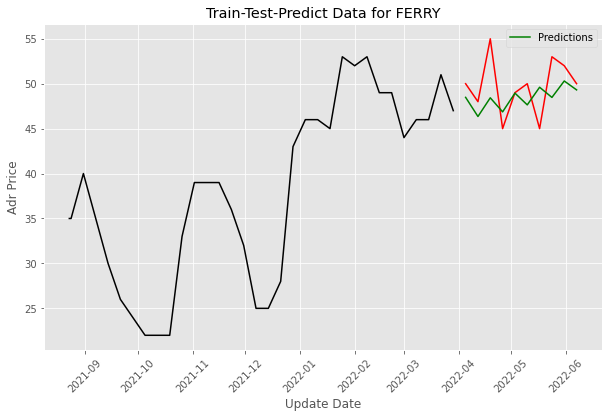

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36422D+00    |proj g|=  7.97864D-02

At iterate    5    f=  2.32421D+00    |proj g|=  1.72771D-02

At iterate   10    f=  2.31121D+00    |proj g|=  1.50991D-02

At iterate   15    f=  2.30754D+00    |proj g|=  1.81430D-03

At iterate   20    f=  2.30724D+00    |proj g|=  1.72956D-03

At iterate   25    f=  2.30720D+00    |proj g|=  1.47437D-04

At iterate   30    f=  2.30719D+00    |proj g|=  1.81901D-05

At iterate   35    f=  2.30719D+00    |proj g|=  7.74848D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

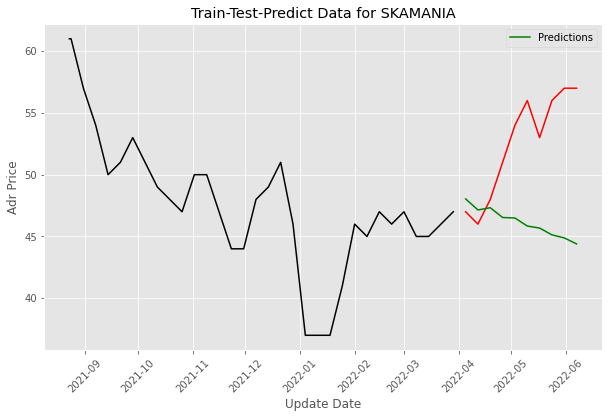

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83470D+00    |proj g|=  1.09499D-01

At iterate    5    f=  1.79810D+00    |proj g|=  6.97520D-02

At iterate   10    f=  1.79344D+00    |proj g|=  6.88652D-03

At iterate   15    f=  1.78962D+00    |proj g|=  2.58680D-03

At iterate   20    f=  1.78932D+00    |proj g|=  2.30287D-03

At iterate   25    f=  1.78922D+00    |proj g|=  1.42410D-03

At iterate   30    f=  1.78922D+00    |proj g|=  1.59784D-03

At iterate   35    f=  1.78921D+00    |proj g|=  3.02517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


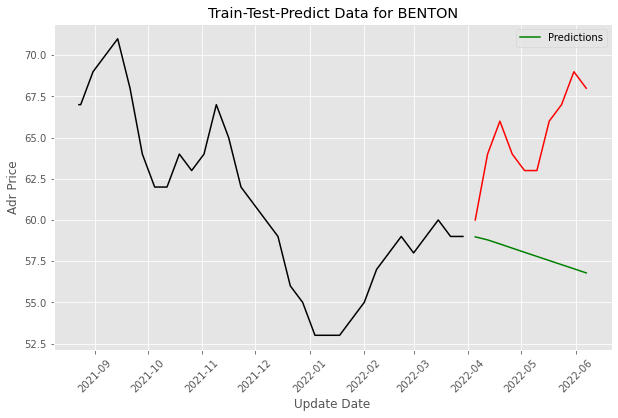

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97359D+00    |proj g|=  8.97899D-02

At iterate    5    f=  1.95558D+00    |proj g|=  1.13512D-02

At iterate   10    f=  1.95330D+00    |proj g|=  5.49225D-03

At iterate   15    f=  1.94779D+00    |proj g|=  2.39366D-02

At iterate   20    f=  1.94696D+00    |proj g|=  4.83891D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   2.418D-06   1.947D+00
  F =   1.9469591940803177     

CONVERG

 This problem is unconstrained.


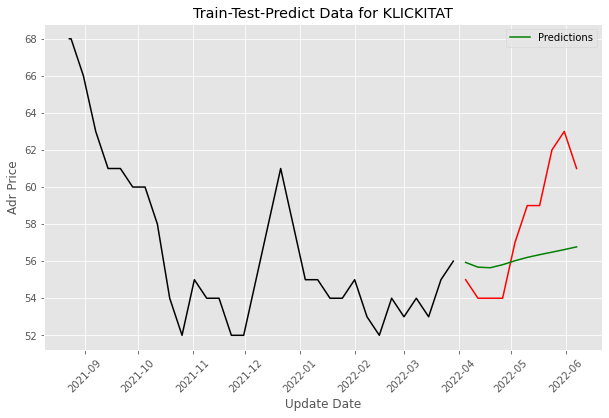

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91384D+00    |proj g|=  1.14909D-01

At iterate    5    f=  1.87353D+00    |proj g|=  8.22272D-03

At iterate   10    f=  1.87072D+00    |proj g|=  4.18172D-03

At iterate   15    f=  1.86460D+00    |proj g|=  1.23491D-02

At iterate   20    f=  1.86388D+00    |proj g|=  1.63219D-04

At iterate   25    f=  1.86387D+00    |proj g|=  3.61669D-04

At iterate   30    f=  1.86387D+00    |proj g|=  1.97715D-04

At iterate   35    f=  1.86387D+00    |proj g|=  1.98514D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

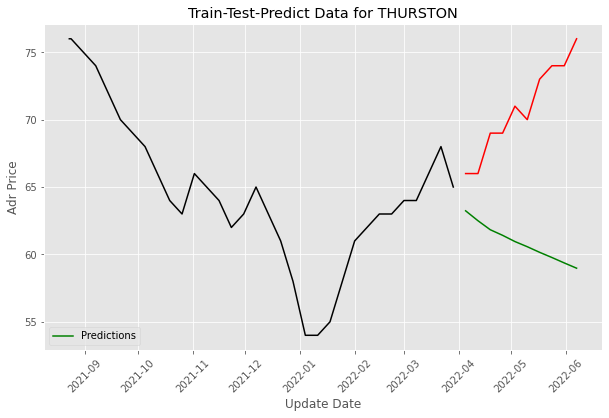

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84453D+00    |proj g|=  6.43054D-01

At iterate    5    f=  1.50820D+00    |proj g|=  4.75707D-02

At iterate   10    f=  1.47041D+00    |proj g|=  9.27334D-03

At iterate   15    f=  1.46826D+00    |proj g|=  1.68110D-03

At iterate   20    f=  1.46767D+00    |proj g|=  5.20886D-03

At iterate   25    f=  1.46756D+00    |proj g|=  3.36150D-04

At iterate   30    f=  1.46755D+00    |proj g|=  5.22398D-04

At iterate   35    f=  1.46755D+00    |proj g|=  1.77462D-04

At iterate   40    f=  1.46755D+00    |proj g|=  9.39630D-05

At iterate   45    f=  1.46755D+00    |proj g|=  4.44585D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

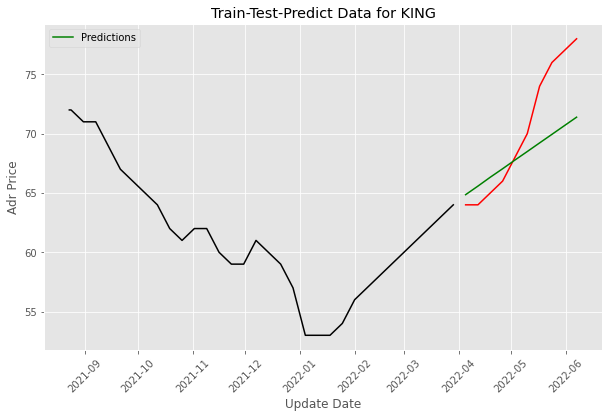

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28719D+00    |proj g|=  2.26953D-01

At iterate    5    f=  2.20364D+00    |proj g|=  6.92396D-03

At iterate   10    f=  2.19664D+00    |proj g|=  2.76447D-02

At iterate   15    f=  2.19072D+00    |proj g|=  2.88181D-03

At iterate   20    f=  2.18944D+00    |proj g|=  9.90447D-04

At iterate   25    f=  2.18923D+00    |proj g|=  1.19989D-03

At iterate   30    f=  2.18915D+00    |proj g|=  1.54872D-04

At iterate   35    f=  2.18913D+00    |proj g|=  2.81013D-04

At iterate   40    f=  2.18912D+00    |proj g|=  3.17369D-04

At iterate   45    f=  2.18912D+00    |proj g|=  1.16789D-04

At iterate   50    f=  2.18912D+00    |proj g|=  3.81909D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

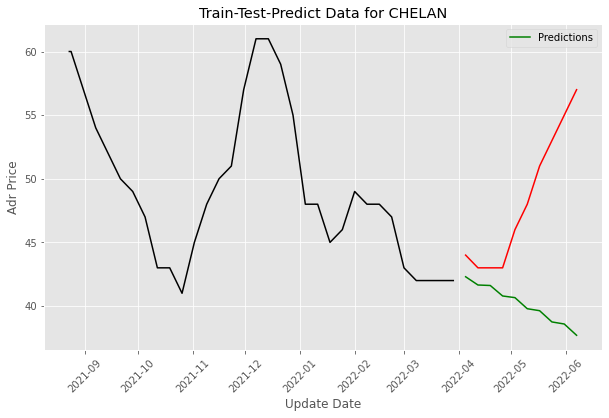

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.45774D+00    |proj g|=  7.17635D-02

At iterate    5    f=  2.42652D+00    |proj g|=  1.17953D-02

At iterate   10    f=  2.41557D+00    |proj g|=  3.75219D-03

At iterate   15    f=  2.41467D+00    |proj g|=  9.69455D-04

At iterate   20    f=  2.41455D+00    |proj g|=  7.10467D-04

At iterate   25    f=  2.41454D+00    |proj g|=  2.18381D-04

At iterate   30    f=  2.41454D+00    |proj g|=  1.11496D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

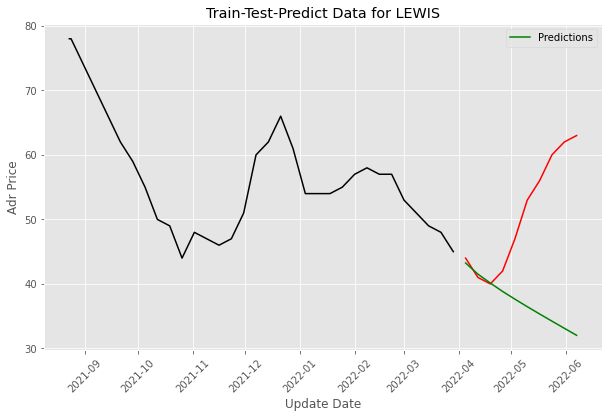

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.55447D+00    |proj g|=  3.55695D-01

At iterate    5    f=  2.44089D+00    |proj g|=  9.66394D-02

At iterate   10    f=  2.43148D+00    |proj g|=  6.74731D-02

At iterate   15    f=  2.42136D+00    |proj g|=  4.59842D-02

At iterate   20    f=  2.41494D+00    |proj g|=  2.46451D-02

At iterate   25    f=  2.41445D+00    |proj g|=  7.70468D-03

At iterate   30    f=  2.41440D+00    |proj g|=  7.61410D-04

At iterate   35    f=  2.41439D+00    |proj g|=  1.22164D-03

At iterate   40    f=  2.41439D+00    |proj g|=  3.24036D-04

At iterate   45    f=  2.41439D+00    |proj g|=  6.21472D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

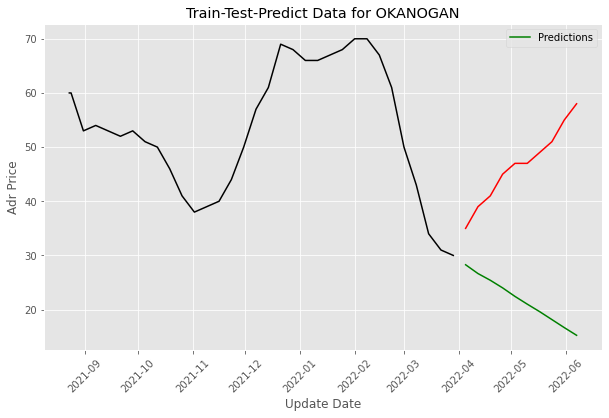

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05215D+00    |proj g|=  6.09551D-02

At iterate    5    f=  2.04402D+00    |proj g|=  2.29041D-03

At iterate   10    f=  2.04254D+00    |proj g|=  3.40103D-03

At iterate   15    f=  2.04249D+00    |proj g|=  5.62146D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   5.961D-06   2.042D+00
  F =   2.0424857595597352     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
The root

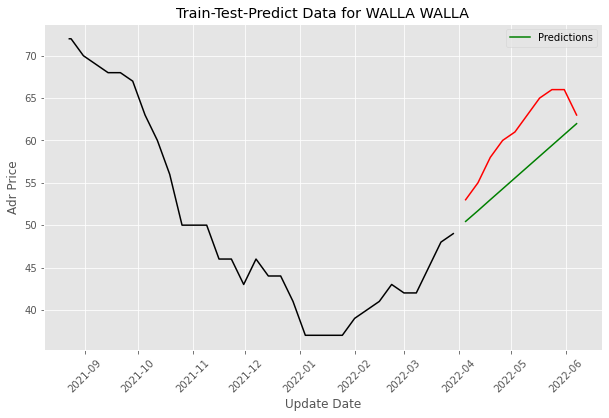

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87669D+00    |proj g|=  8.84546D-01

At iterate    5    f=  2.57133D+00    |proj g|=  2.11435D-02

At iterate   10    f=  2.56402D+00    |proj g|=  2.07427D-02

At iterate   15    f=  2.55897D+00    |proj g|=  3.33805D-03

At iterate   20    f=  2.55769D+00    |proj g|=  1.12947D-03

At iterate   25    f=  2.55743D+00    |proj g|=  3.94471D-04

At iterate   30    f=  2.55739D+00    |proj g|=  6.26668D-04

At iterate   35    f=  2.55737D+00    |proj g|=  6.01862D-04

At iterate   40    f=  2.55736D+00    |proj g|=  1.03571D-04

At iterate   45    f=  2.55736D+00    |proj g|=  1.08461D-04

At iterate   50    f=  2.55736D+00    |proj g|=  2.13991D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

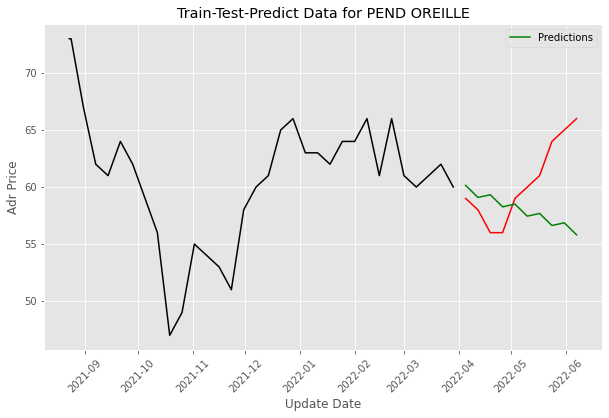

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.08940D+00    |proj g|=  3.41995D-01

At iterate    5    f=  2.00609D+00    |proj g|=  1.30939D-02

At iterate   10    f=  2.00502D+00    |proj g|=  7.57648D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   2.250D-06   2.005D+00
  F =   2.0050187649353051     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
The root mean square error for theGRANT is 6.145864044220995
         

 This problem is unconstrained.


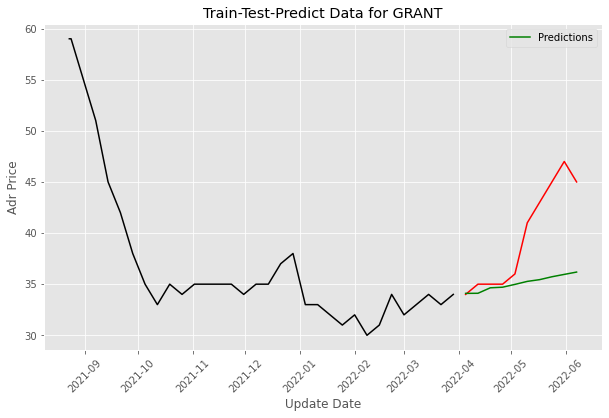

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05983D+00    |proj g|=  9.46150D-02

At iterate    5    f=  2.01422D+00    |proj g|=  5.31194D-03

At iterate   10    f=  2.01405D+00    |proj g|=  1.98770D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   6.165D-06   2.014D+00
  F =   2.0140537294861716     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
The root mean square error for theKITSAP is 3.938837206862656
        

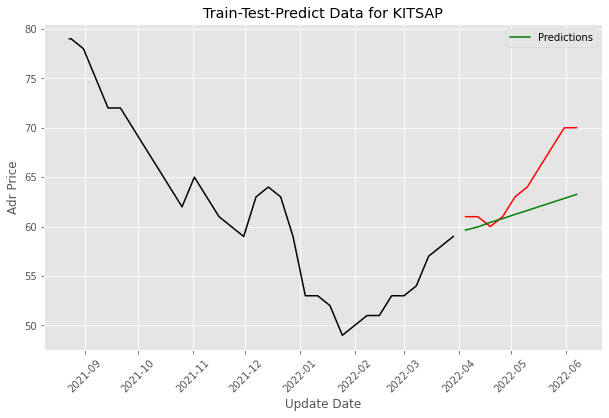

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94987D+00    |proj g|=  1.14376D-01

At iterate    5    f=  1.92380D+00    |proj g|=  1.10047D-02

At iterate   10    f=  1.92317D+00    |proj g|=  9.07669D-03

At iterate   15    f=  1.92261D+00    |proj g|=  3.28359D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   1.344D-05   1.923D+00
  F =   1.9226083320078169     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
The root

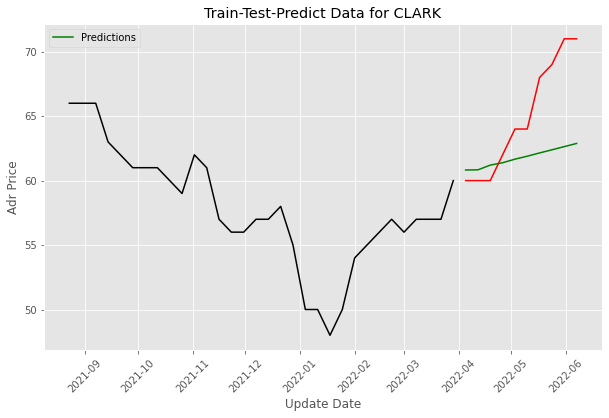

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25093D+00    |proj g|=  8.28097D-01

At iterate    5    f=  1.97475D+00    |proj g|=  1.36089D-01

At iterate   10    f=  1.92458D+00    |proj g|=  1.43038D-02

At iterate   15    f=  1.92146D+00    |proj g|=  5.54370D-03

At iterate   20    f=  1.92081D+00    |proj g|=  2.26511D-03

At iterate   25    f=  1.92068D+00    |proj g|=  1.40013D-03

At iterate   30    f=  1.92066D+00    |proj g|=  2.99224D-04

At iterate   35    f=  1.92066D+00    |proj g|=  1.16983D-04

At iterate   40    f=  1.92066D+00    |proj g|=  1.28155D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

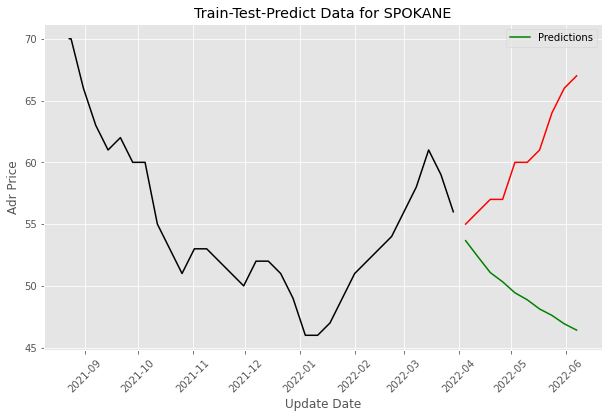

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64638D+00    |proj g|=  9.26018D-01

At iterate    5    f=  1.97923D+00    |proj g|=  3.08151D-02

At iterate   10    f=  1.96998D+00    |proj g|=  3.99771D-03

At iterate   15    f=  1.96989D+00    |proj g|=  1.21203D-04

At iterate   20    f=  1.96987D+00    |proj g|=  4.60213D-03

At iterate   25    f=  1.96984D+00    |proj g|=  5.81147D-04

At iterate   30    f=  1.96984D+00    |proj g|=  1.64744D-04

At iterate   35    f=  1.96984D+00    |proj g|=  1.63544D-04

At iterate   40    f=  1.96984D+00    |proj g|=  2.10268D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


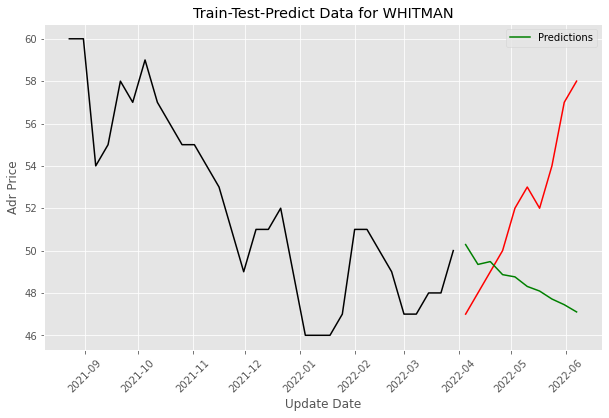

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27596D+00    |proj g|=  4.44319D-01

At iterate    5    f=  2.06543D+00    |proj g|=  1.93488D-02

At iterate   10    f=  2.06501D+00    |proj g|=  1.18433D-03

At iterate   15    f=  2.06169D+00    |proj g|=  3.41673D-02

At iterate   20    f=  2.05768D+00    |proj g|=  2.45586D-03

At iterate   25    f=  2.05733D+00    |proj g|=  3.24487D-04

At iterate   30    f=  2.05727D+00    |proj g|=  1.65951D-04

At iterate   35    f=  2.05727D+00    |proj g|=  2.05875D-04

At iterate   40    f=  2.05727D+00    |proj g|=  5.26467D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

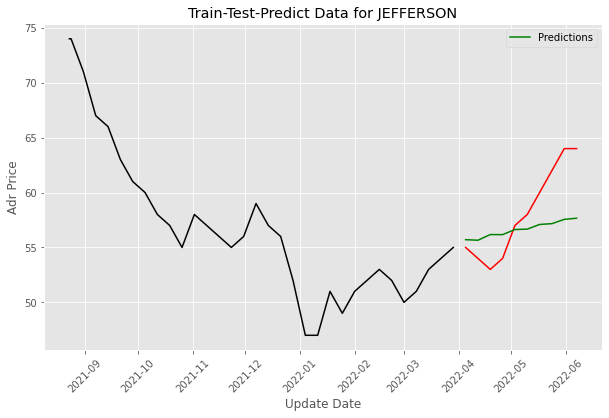

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71984D+00    |proj g|=  1.70945D-01

At iterate    5    f=  2.65232D+00    |proj g|=  2.15679D-02

At iterate   10    f=  2.65037D+00    |proj g|=  1.00339D-03

At iterate   15    f=  2.65005D+00    |proj g|=  3.43165D-03

At iterate   20    f=  2.64996D+00    |proj g|=  2.45597D-03

At iterate   25    f=  2.64993D+00    |proj g|=  5.29990D-04

At iterate   30    f=  2.64993D+00    |proj g|=  7.27088D-05

At iterate   35    f=  2.64993D+00    |proj g|=  5.77956D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


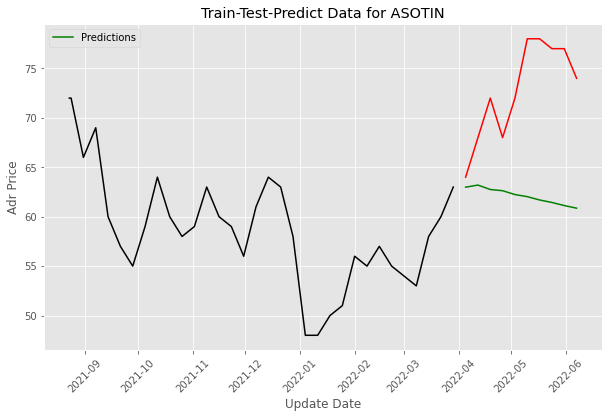

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52759D+00    |proj g|=  6.96886D-01

At iterate    5    f=  3.32017D+00    |proj g|=  1.51000D-01

At iterate   10    f=  3.26917D+00    |proj g|=  3.26972D-02

At iterate   15    f=  3.24549D+00    |proj g|=  5.29535D-03

At iterate   20    f=  3.24020D+00    |proj g|=  8.79664D-03

At iterate   25    f=  3.23851D+00    |proj g|=  3.25624D-03

At iterate   30    f=  3.23814D+00    |proj g|=  5.60064D-04

At iterate   35    f=  3.23809D+00    |proj g|=  1.39704D-03

At iterate   40    f=  3.23806D+00    |proj g|=  1.30606D-04

At iterate   45    f=  3.23805D+00    |proj g|=  5.58593D-04

At iterate   50    f=  3.23804D+00    |proj g|=  3.91467D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

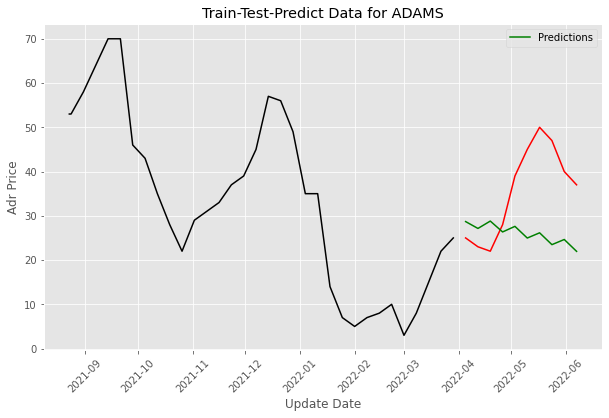

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54990D+00    |proj g|=  8.34852D-02

At iterate    5    f=  2.53847D+00    |proj g|=  7.24154D-04

At iterate   10    f=  2.53340D+00    |proj g|=  9.60266D-02

At iterate   15    f=  2.51423D+00    |proj g|=  1.77591D-03

At iterate   20    f=  2.51419D+00    |proj g|=  1.58324D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     37      1     0     0   3.132D-06   2.514D+00
  F =   2.5141863715101636     

CONVERG

 This problem is unconstrained.


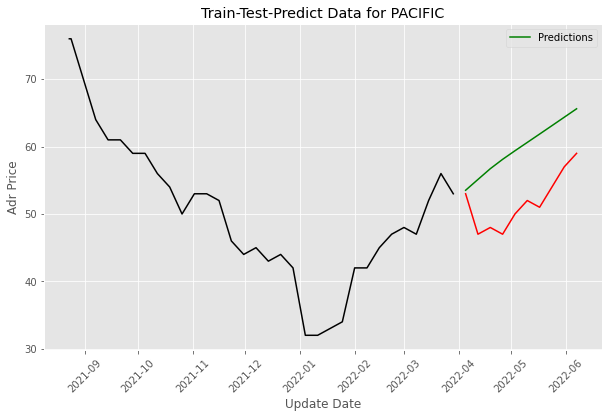

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.46616D+00    |proj g|=  2.55779D-01

At iterate    5    f=  2.39447D+00    |proj g|=  2.85459D-02

At iterate   10    f=  2.38955D+00    |proj g|=  2.37665D-03

At iterate   15    f=  2.38945D+00    |proj g|=  2.71651D-03

At iterate   20    f=  2.38881D+00    |proj g|=  4.67419D-03

At iterate   25    f=  2.38878D+00    |proj g|=  8.13931D-04

At iterate   30    f=  2.38875D+00    |proj g|=  1.63084D-04

At iterate   35    f=  2.38875D+00    |proj g|=  1.70044D-04

At iterate   40    f=  2.38875D+00    |proj g|=  3.14250D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


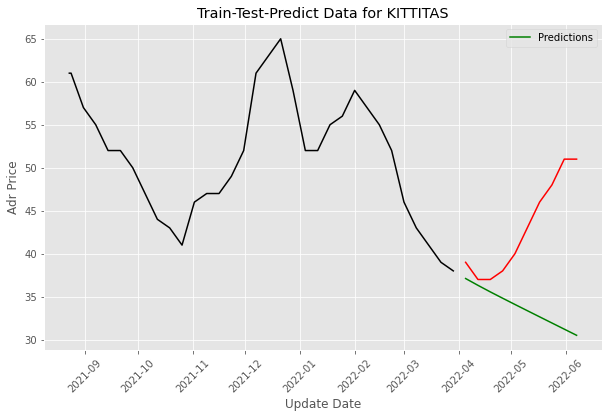

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27038D+00    |proj g|=  9.37900D-02

At iterate    5    f=  2.20708D+00    |proj g|=  6.20400D-03

At iterate   10    f=  2.20613D+00    |proj g|=  9.05037D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   9.394D-06   2.206D+00
  F =   2.2061261880420977     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
The root mean square error for theISLAND is 3.72589374469789
         

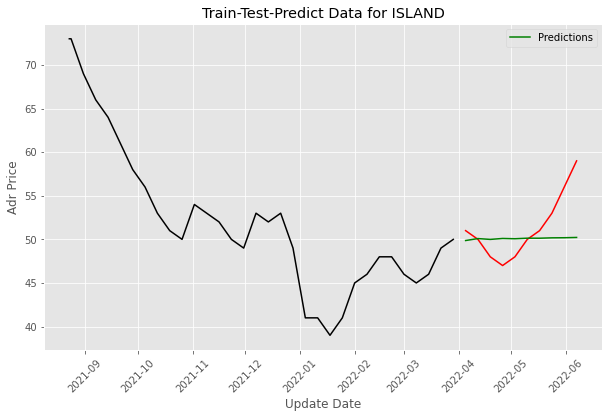

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90488D+00    |proj g|=  1.83051D-01

At iterate    5    f=  1.83499D+00    |proj g|=  5.32383D-03

At iterate   10    f=  1.83425D+00    |proj g|=  1.41560D-02

At iterate   15    f=  1.83267D+00    |proj g|=  1.64094D-03

At iterate   20    f=  1.83261D+00    |proj g|=  5.87195D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   3.564D-07   1.833D+00
  F =   1.8326074825193261     

CONVERG

 This problem is unconstrained.


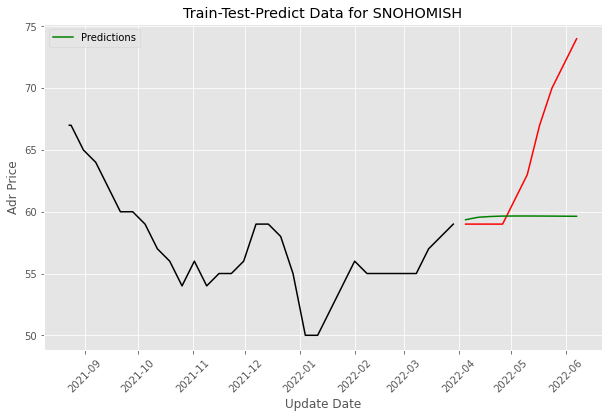

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25350D+00    |proj g|=  4.42796D-02

At iterate    5    f=  2.23527D+00    |proj g|=  3.75115D-03

At iterate   10    f=  2.22904D+00    |proj g|=  6.47684D-03

At iterate   15    f=  2.22744D+00    |proj g|=  2.30599D-03

At iterate   20    f=  2.22709D+00    |proj g|=  3.97254D-04

At iterate   25    f=  2.22704D+00    |proj g|=  7.90422D-04

At iterate   30    f=  2.22703D+00    |proj g|=  2.35376D-04

At iterate   35    f=  2.22703D+00    |proj g|=  2.48180D-04
  ys=-4.515E-09  -gs= 4.136E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.


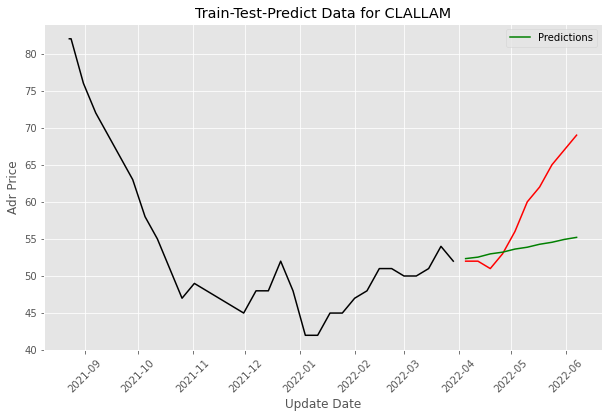

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81952D+00    |proj g|=  9.12273D-02

At iterate    5    f=  1.80454D+00    |proj g|=  9.59523D-04

At iterate   10    f=  1.80450D+00    |proj g|=  2.89357D-03

At iterate   15    f=  1.80447D+00    |proj g|=  3.29035D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   3.290D-06   1.804D+00
  F =   1.8044724619130881     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
The root

 This problem is unconstrained.


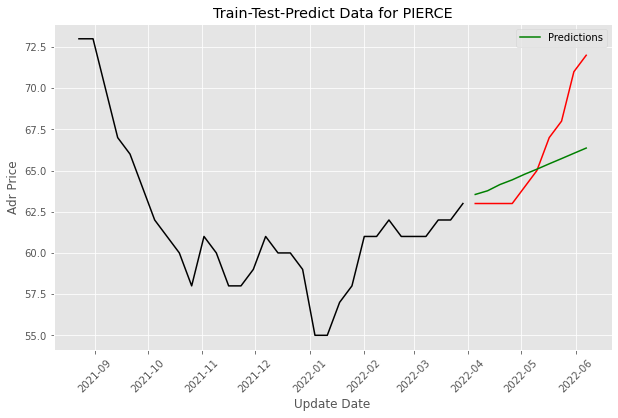

In [223]:
rmse_error = {}
for county in tempdf_pd["name"].unique():
    tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == county]
    train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-04-01", format='%Y-%m-%d')]
    test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-04-01", format='%Y-%m-%d')][["airbnb_average_occ"]]
    y = train['airbnb_average_occ']
    ARMAmodel = SARIMAX(y, order = (2, 2, 2))
    ARMAmodel = ARMAmodel.fit()
    y_pred = ARMAmodel.get_forecast(len(test.index))
    y_pred_df = y_pred.conf_int(alpha = 0.5)
    y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
    y_pred_df.index = test.index
    y_pred_out = y_pred_df["Predictions"] 
    print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))
    
    print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))
    
    rmse_error.update({county: math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())})
    
    

    plt.plot(train[["airbnb_average_occ"]], color = "black")
    plt.plot(test[["airbnb_average_occ"]], color = "red")
    plt.plot(y_pred_out, color='green', label = 'Predictions')
    plt.ylabel('Adr Price')
    plt.xlabel('Update Date')
    plt.xticks(rotation=45)
    plt.title("Train-Test-Predict Data for " + county)
    plt.legend()
    plt.show()





In [227]:
[(i, value) for i, value in rmse_error.items() if value > 6]

[('COLUMBIA', 47.46679998982789),
 ('STEVENS', 8.127805798149634),
 ('DOUGLAS', 15.645948214930057),
 ('COWLITZ', 12.984095482073437),
 ('WHATCOM', 7.430092220909524),
 ('GRAYS HARBOR', 7.1716141363304455),
 ('GARFIELD', 52.596744524154126),
 ('LINCOLN', 48.71163091562742),
 ('WAHKIAKUM', 14.969054686988883),
 ('FRANKLIN', 13.257188652575683),
 ('SKAMANIA', 8.122725855677421),
 ('BENTON', 7.7642890878295345),
 ('THURSTON', 10.907532644139003),
 ('CHELAN', 10.40130814921195),
 ('LEWIS', 18.04069638108096),
 ('OKANOGAN', 27.198020540215072),
 ('GRANT', 6.145864044220995),
 ('SPOKANE', 12.455722596334825),
 ('ASOTIN', 11.923107539365784),
 ('ADAMS', 14.811160957775975),
 ('PACIFIC', 8.52566262791855),
 ('KITTITAS', 11.792519842002337),
 ('SNOHOMISH', 7.311749605084012),
 ('CLALLAM', 7.430467811816268)]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93143D+00    |proj g|=  9.22290D-01

At iterate    5    f=  3.60013D+00    |proj g|=  2.22984D-02

At iterate   10    f=  3.58469D+00    |proj g|=  5.40526D-02

At iterate   15    f=  3.58170D+00    |proj g|=  9.99990D-03

At iterate   20    f=  3.58034D+00    |proj g|=  1.64530D-03

At iterate   25    f=  3.58022D+00    |proj g|=  4.36337D-03

At iterate   30    f=  3.58007D+00    |proj g|=  1.75077D-04

At iterate   35    f=  3.58005D+00    |proj g|=  2.56891D-04

At iterate   40    f=  3.58005D+00    |proj g|=  4.36680D-05

At iterate   45    f=  3.58005D+00    |proj g|=  1.62058D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


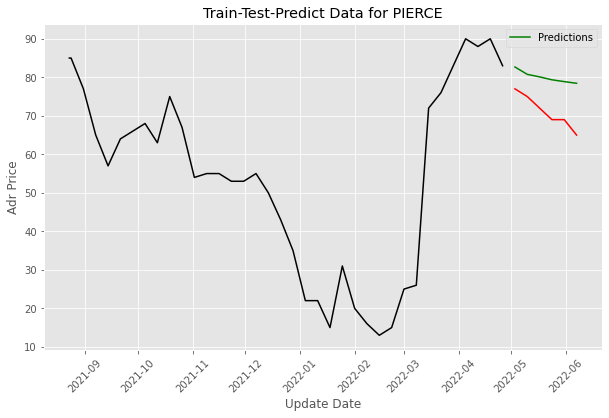

In [232]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "COLUMBIA"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-04-28", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-04-28", format='%Y-%m-%d')][["airbnb_average_occ"]]
y = train['airbnb_average_occ']
ARMAmodel = SARIMAX(y, order = (2, 2, 2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))

rmse_error.update({county: math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())})



plt.plot(train[["airbnb_average_occ"]], color = "black")
plt.plot(test[["airbnb_average_occ"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59722D+00    |proj g|=  7.57383D-01

At iterate    5    f=  2.14733D+00    |proj g|=  5.82177D-02

At iterate   10    f=  2.14242D+00    |proj g|=  1.64034D-02

At iterate   15    f=  2.13316D+00    |proj g|=  1.33897D-02

At iterate   20    f=  2.12885D+00    |proj g|=  5.14323D-03

At iterate   25    f=  2.12829D+00    |proj g|=  2.78742D-04

At iterate   30    f=  2.12822D+00    |proj g|=  9.73878D-04

At iterate   35    f=  2.12822D+00    |proj g|=  1.81167D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


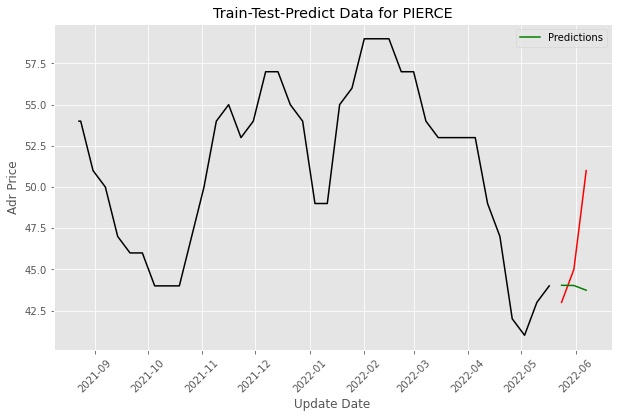

In [235]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "STEVENS"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-05-18", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-05-18", format='%Y-%m-%d')][["airbnb_average_occ"]]
y = train['airbnb_average_occ']
ARMAmodel = SARIMAX(y, order = (2, 2, 2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))

rmse_error.update({county: math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())})



plt.plot(train[["airbnb_average_occ"]], color = "black")
plt.plot(test[["airbnb_average_occ"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92628D+00    |proj g|=  3.72386D+00

At iterate    5    f=  3.74243D+00    |proj g|=  1.36310D-01

At iterate   10    f=  3.63219D+00    |proj g|=  5.83099D-02

At iterate   15    f=  3.60734D+00    |proj g|=  3.24109D-02

At iterate   20    f=  3.60514D+00    |proj g|=  4.24458D-03

At iterate   25    f=  3.60386D+00    |proj g|=  8.90181D-03

At iterate   30    f=  3.60237D+00    |proj g|=  3.76508D-02

At iterate   35    f=  3.60091D+00    |proj g|=  1.08595D-02

At iterate   40    f=  3.60078D+00    |proj g|=  5.01143D-04

At iterate   45    f=  3.60076D+00    |proj g|=  8.33926D-03

At iterate   50    f=  3.60065D+00    |proj g|=  4.11795D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


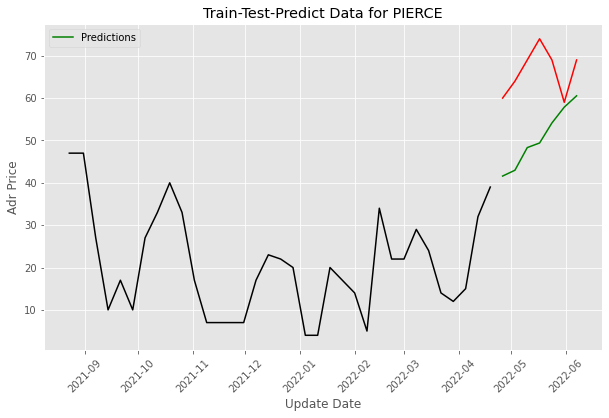

In [241]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "GARFIELD"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-04-25", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-04-25", format='%Y-%m-%d')][["airbnb_average_occ"]]
y = train['airbnb_average_occ']
ARMAmodel = SARIMAX(y, order = (2, 3, 4))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))

rmse_error.update({county: math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())})



plt.plot(train[["airbnb_average_occ"]], color = "black")
plt.plot(test[["airbnb_average_occ"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85338D+00    |proj g|=  2.02507D-01

At iterate    5    f=  2.82126D+00    |proj g|=  4.52422D-02

At iterate   10    f=  2.81748D+00    |proj g|=  1.36066D-02

At iterate   15    f=  2.81259D+00    |proj g|=  1.51712D-02

At iterate   20    f=  2.81101D+00    |proj g|=  7.91638D-03

At iterate   25    f=  2.80778D+00    |proj g|=  7.25482D-03

At iterate   30    f=  2.80341D+00    |proj g|=  1.25380D-02

At iterate   35    f=  2.80217D+00    |proj g|=  1.43832D-03

At iterate   40    f=  2.80198D+00    |proj g|=  1.45374D-03

At iterate   45    f=  2.80194D+00    |proj g|=  2.38832D-04

At iterate   50    f=  2.80194D+00    |proj g|=  1.67090D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


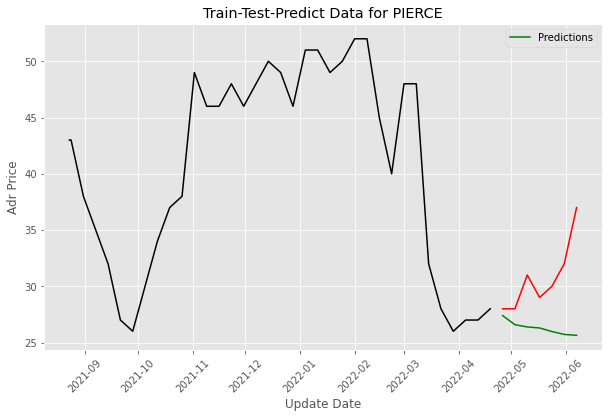

In [242]:
tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "LINCOLN"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-04-25", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-04-25", format='%Y-%m-%d')][["airbnb_average_occ"]]
y = train['airbnb_average_occ']
ARMAmodel = SARIMAX(y, order = (2, 3, 4))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))

rmse_error.update({county: math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())})



plt.plot(train[["airbnb_average_occ"]], color = "black")
plt.plot(test[["airbnb_average_occ"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66931D+00    |proj g|=  4.69915D-01

At iterate    5    f=  2.46485D+00    |proj g|=  3.61486D-02

At iterate   10    f=  2.44135D+00    |proj g|=  2.89717D-02

At iterate   15    f=  2.43954D+00    |proj g|=  1.55652D-03

At iterate   20    f=  2.43953D+00    |proj g|=  7.91275D-05

At iterate   25    f=  2.43953D+00    |proj g|=  9.14578D-04

At iterate   30    f=  2.43951D+00    |proj g|=  4.42912D-04

At iterate   35    f=  2.43950D+00    |proj g|=  2.61978D-04

At iterate   40    f=  2.43950D+00    |proj g|=  2.85289D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


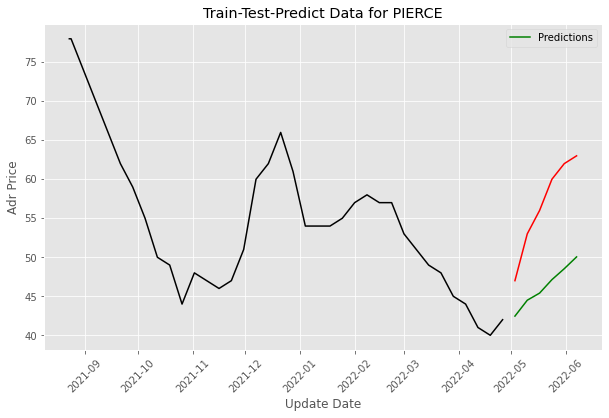

In [247]:
# LEWIS


tempdf_pd_county = tempdf_pd[tempdf_pd["name"] == "LEWIS"]
train = tempdf_pd_county[tempdf_pd_county.index < pd.to_datetime("2022-05-02", format='%Y-%m-%d')]
test = tempdf_pd_county[tempdf_pd_county.index >= pd.to_datetime("2022-05-02", format='%Y-%m-%d')][["airbnb_average_occ"]]
y = train['airbnb_average_occ']
ARMAmodel = SARIMAX(y, order = (2, 3, 4))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.5)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
print("The root mean square error for the" + county + " is " + str(math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())))

print(pd.concat([test.iloc[:,0], y_pred_out], axis=1))

rmse_error.update({county: math.sqrt(((y_pred_out - test.iloc[:,0]) ** 2).mean())})



plt.plot(train[["airbnb_average_occ"]], color = "black")
plt.plot(test[["airbnb_average_occ"]], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Adr Price')
plt.xlabel('Update Date')
plt.xticks(rotation=45)
plt.title("Train-Test-Predict Data for " + county)
plt.legend()
plt.show()
